In [1]:
from UtilDatasetPrepFromLORE import *
from Rankers import *
from PreferentialSampling import *
from UniformSampling import *
from StandardEval import *
from FairnessEval import *
from Explainers import *

22-Jan-25 19:36:51 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


# GERMAN

## Uniform Sampling

In [2]:
filename = 'german_credit.csv'
path_res = '/Users/Marta/FAccT/Res-GERMAN/'
path_data = 'datasets/'
sensitive = ['foreign_worker'] #OR personal_status_sex
discrete, df = prepare_german_dataset(filename, path_data, sensitive)
discrete

['credit_history',
 'telephone',
 'job',
 'people_under_maintenance',
 'personal_status_sex',
 'account_check_status',
 'installment_as_income_perc',
 'housing',
 'present_res_since',
 'other_debtors',
 'purpose',
 'credits_this_bank',
 'other_installment_plans',
 'property',
 'savings',
 'present_emp_since']

In [3]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['Good','Bad']
#There are two classes, 1 for good customers and 2 for bad customers
#in LORE 0 sta per 1 e 1 sta per 2, quindi 0 è good e 1 è bad  
adClass=0
disClass=1
protected = ['foreign_worker_no','foreign_worker_yes']
protected_feature='foreigners' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr=None
disAttr=None

In [4]:
discrete.append('foreign_worker_no')
discrete.append('foreign_worker_yes')
discrete.append('target')
df_Discrete = df.loc[:, df.columns.isin(discrete)]
df_Discrete

target  account_check_status  credit_history  purpose  savings  \
0         0                     1               1        4        4   
1         1                     0               3        4        1   
2         0                     3               1        0        1   
3         0                     1               3        7        1   
4         1                     1               2        2        1   
..      ...                   ...             ...      ...      ...   
995       0                     3               3        7        1   
996       0                     1               3        3        1   
997       0                     3               3        4        1   
998       1                     1               3        4        1   
999       0                     0               1        3        2   

     present_emp_since  installment_as_income_perc  personal_status_sex  \
0                    0                           3                    3   
1                    2                           1                    0   
2                    3                           1                    3   
3                    3                           1                    3   
4                    2                           2                    3   
..                 ...                         ...                  ...   
995                  3                           2                    0   
996                  2                           3                    1   
997                  0                           3                    3   
998                  2                           3                    3   
999                  4                           2                    3   

     other_debtors  present_res_since  property  other_installment_plans  \
0                2                  3         2                        1   
1                2                  1         2                        1   
2                2                  2         2                        1   
3                1                  3         0                        1   
4                2                  3         3                        1   
..             ...                ...       ...                      ...   
995              2                  3         2                        1   
996              2                  3         0                        1   
997              2                  3         1                        1   
998              2                  3         3                        1   
999              2                  3         1                        1   

     housing  credits_this_bank  job  people_under_maintenance  telephone  \
0          1                  1    1                         0          1   
1          1                  0    1                         0          0   
2          1                  0    3                         1          0   
3          0                  0    1                         1          0   
4          0                  1    1                         1          0   
..       ...                ...  ...                       ...        ...   
995        1                  0    3                         0          0   
996        1                  0    0                         0          1   
997        1                  0    1                         0          0   
998        0                  0    1                         0          1   
999        1                  0    1                         0          0   

     foreign_worker_no  foreign_worker_yes  
0                    0                   1  
1                    0                   1  
2                    0                   1  
3                    0                   1  
4                    0                   1  
..                 ...                 ...  
995                  0                   1  
996                  0                   1  
997     

In [5]:
from sklearn.preprocessing import StandardScaler

df_ToScale = df.loc[:, ~df.columns.isin(discrete)]
df_ToScale

scaler = StandardScaler()

df_ToScale = scaler.fit_transform(df_ToScale)
df_ToScale = pd.DataFrame(df_ToScale)
df_ToScale.columns = range(0, df_ToScale.columns.size)
df_ToScale.columns = ['duration_in_month','credit_amount','age']
df_ToScale

duration_in_month  credit_amount       age
0            -1.236478      -0.745131  2.766456
1             2.248194       0.949817 -1.191404
2            -0.738668      -0.416562  1.183312
3             1.750384       1.634247  0.831502
4             0.256953       0.566664  1.535122
..                 ...            ...       ...
995          -0.738668      -0.544162 -0.399832
996           0.754763       0.207612  0.391740
997          -0.738668      -0.874503  0.215835
998           1.999289      -0.505528 -1.103451
999           1.999289       0.462457 -0.751642

[1000 rows x 3 columns]

In [6]:
df = pd.concat([df_ToScale.reset_index(drop=True), df_Discrete.reset_index(drop=True)], axis= 1)
df

duration_in_month  credit_amount       age  target  account_check_status  \
0            -1.236478      -0.745131  2.766456       0                     1   
1             2.248194       0.949817 -1.191404       1                     0   
2            -0.738668      -0.416562  1.183312       0                     3   
3             1.750384       1.634247  0.831502       0                     1   
4             0.256953       0.566664  1.535122       1                     1   
..                 ...            ...       ...     ...                   ...   
995          -0.738668      -0.544162 -0.399832       0                     3   
996           0.754763       0.207612  0.391740       0                     1   
997          -0.738668      -0.874503  0.215835       0                     3   
998           1.999289      -0.505528 -1.103451       1                     1   
999           1.999289       0.462457 -0.751642       0                     0   

     credit_history  purpose  savings  present_emp_since  \
0                 1        4        4                  0   
1                 3        4        1                  2   
2                 1        0        1                  3   
3                 3        7        1                  3   
4                 2        2        1                  2   
..              ...      ...      ...                ...   
995               3        7        1                  3   
996               3        3        1                  2   
997               3        4        1                  0   
998               3        4        1                  2   
999               1        3        2                  4   

     installment_as_income_perc  ...  present_res_since  property  \
0                             3  ...                  3         2   
1                             1  ...                  1         2   
2                             1  ...                  2         2   
3                             1  ...                  3         0   
4                             2  ...                  3         3   
..                          ...  ...                ...       ...   
995                           2  ...                  3         2   
996                           3  ...                  3         0   
997                           3  ...                  3         1   
998                           3  ...                  3         3   
999                           2  ...                  3         1   

     other_installment_plans  housing  credits_this_bank  job  \
0                          1        1                  1    1   
1                          1        1                  0    1   
2                          1        1                  0    3   
3                          1        0                  0    1   
4                          1        0                  1    1   
..                       ...      ...                ...  ...   
995                        1        1                  0    3   
996                        1        1                  0    0   
997                        1        1                  0    1   
998                        1        0                  0    1   
999                        1        1                  0    1   

     people_under_maintenance  telephone  foreign_worker_no  \
0                           0          1                  0   
1                           0          0                  0   
2                           1          0                  0   
3                           1          0                  0   
4                           1          0                  0   
..                        ...        ...                ...   
995                         0          0                  0   
996                         0          1                  0   
997                         0          0                  0   
998                         0          1                  0   
999     

In [7]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [8]:
findFreq(target,protected,df)

({'foreign_worker_no': 22, 'foreign_worker_yes': 464},
 {'foreign_worker_no': 3, 'foreign_worker_yes': 211})

In [9]:
df_new=UniformSampling(target,protected,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'foreign_worker_no': 22, 'foreign_worker_yes': 464}
Counting labels = 1  {'foreign_worker_no': 3, 'foreign_worker_yes': 211}
DN  ('foreign_worker_yes', 211)
FP  ('foreign_worker_no', 22)
DP  ('foreign_worker_yes', 464)
FN  ('foreign_worker_no', 3)
Len DN_df  211
Len FP_df  22
Len DP_df  464
Len FN_df  3
Len restData 0
DN_expected  206
5 to be removed
Len DN_df after sampling  206
FP_expected  17
5 to be removed
Len FP_df after sampling  17
DP_expected  469
5 to add
Len DP_df after sampling  469
FN_expected  8
5 to add
Len FN_df after sampling  8


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [10]:
findFreq(target,protected,df_new)

({'foreign_worker_no': 17, 'foreign_worker_yes': 469},
 {'foreign_worker_no': 8, 'foreign_worker_yes': 206})

In [11]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,False)

### MLP

In [12]:
clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [13]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'US_MLP_Performances.csv')
res

Original Train Dimension = 700
Mitigated Train Dimension = 700
Test Dimension = 300


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

---> CLF Original: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 227 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 233 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 225 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 231 ]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.766667            0.740000       0.736667   
Precision           0.690505            0.626797       0.567460   
Recall              0.371242            0.301307       0.349020   
F1 Score            0.477547            0.395904       0.427830   
Discrimination      0.211806            0.218750       0.190972   

                CLF Mitigated Blind     Best Score  Delta O-OB  Delta M-MB  \
Accuracy                   0.756667   CLF Original    0.026667    0.020000   
Precision                  0.681905   CLF Original    0.063709    0.114444   
Recall                     0.347059   CLF Original    0.069935    0.001961   
F1 Score                   0.443961   CLF Original    0.081643    0.016132   
Discrimination             0.197917  CLF Mitigated    0.006944    0.006944   

                Delta O-M  Delta OB-MB  
Accuracy         0.030000     0.016667  
Precision        0.123045     0.055108  
Recall           0.022222     0.045752  
F1 Score         0.049717     0.048057  
Discrimination   0.020833     0.020833

In [14]:

PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [15]:
PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [16]:
res = pd.read_csv(path_res+'US_MLP_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'US_MLP_Performances.csv')
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy               0.767               0.740          0.737   
Precision              0.691               0.627          0.567   
Recall                 0.371               0.301          0.349   
F1 Score               0.478               0.396          0.428   
Discrimination         0.212               0.219          0.191   

                CLF Mitigated Blind     Best Score  Delta O-OB  Delta M-MB  \
Accuracy                      0.757   CLF Original       0.027       0.020   
Precision                     0.682   CLF Original       0.064       0.114   
Recall                        0.347   CLF Original       0.070       0.002   
F1 Score                      0.444   CLF Original       0.082       0.016   
Discrimination                0.198  CLF Mitigated       0.007       0.007   

                Delta O-M  Delta OB-MB  
Accuracy            0.030        0.017  
Precision           0.123        0.055  
Recall              0.022        0.046  
F1 Score            0.050        0.048  
Discrimination      0.021        0.021

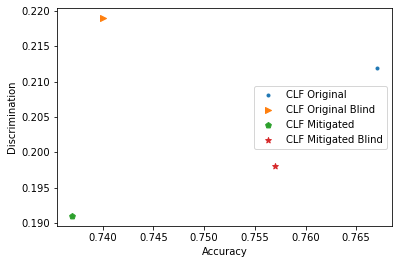

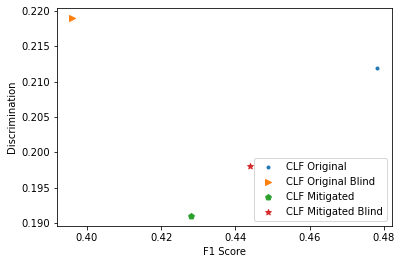

In [17]:
plotDisc(res)

In [18]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 12 instances.
    * "('foreign_worker_yes',)" grouping has 288 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 11 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 203 data points.
        - The class *Bad* has 85 data points.


In [19]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fair

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


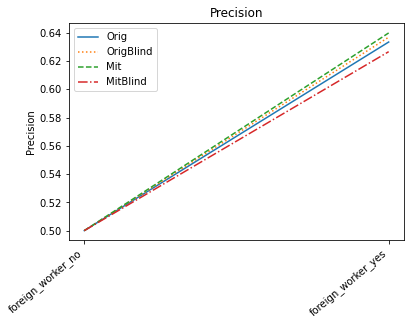

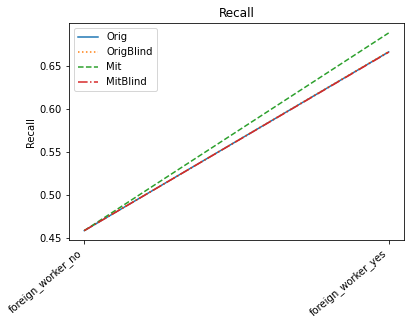

In [20]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [21]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [22]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [4]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [5]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -3.401958           -1.853397   
duration_in_month                      -4.754835           -6.792533   
credit_history                          5.440456            4.777883   
purpose                                -1.902816           -3.128658   
credit_amount                           2.336556            1.986464   
savings                                 0.531540            0.496755   
present_emp_since                       4.173177            3.972710   
installment_as_income_perc              0.115946            0.181555   
personal_status_sex                     0.482066            1.363181   
other_debtors                          -0.017575           -0.046241   
present_res_since                      -0.187673            0.183553   
property                               -0.330995           -0.023289   
age                                     0.907403            1.065061   
other_installment_plans                 0.352207            0.206743   
housing                                 0.185369            0.274167   
credits_this_bank                      -0.655242           -0.049036   
job                                     0.298273            0.937414   
people_under_maintenance                0.340232            0.105044   
telephone                               2.043352            1.313184   
foreign_worker_no                       0.203598           -0.154434   
foreign_worker_yes                      0.277787           -0.156484   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -2.514571                 -2.740784  
duration_in_month                -6.786836                 -4.760532  
credit_history                    5.992501                  4.225838  
purpose                          -2.606827                 -2.424648  
credit_amount                     2.348884                  1.974136  
savings                          -0.057800                  1.086095  
present_emp_since                 4.309563                  3.836324  
installment_as_income_perc        0.295565                  0.001936  
personal_status_sex               1.153683                  0.691563  
other_debtors                    -0.383655                  0.319839  
present_res_since                -0.176501                  0.172381  
property                         -0.233143                 -0.121141  
age                               0.688669                  1.283794  
other_installment_plans           0.203924                  0.355026  
housing                           0.223532                  0.236004  
credits_this_bank                -0.304476                 -0.399803  
job                               0.951905                  0.283783  
people_under_maintenance          0.230994                  0.214282  
telephone                         2.330983                  1.025553  
foreign_worker_no                 0.049164                  0.000000  
foreign_worker_yes                0.120472                  0.000830

In [6]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.009495            0.008271   
duration_in_month                       0.012276            0.008704   
credit_history                          0.006866            0.004134   
purpose                                 0.009659            0.016891   
credit_amount                           0.006551            0.010626   
savings                                 0.010867            0.013164   
present_emp_since                       0.008502            0.010350   
installment_as_income_perc              0.008488            0.010798   
personal_status_sex                     0.009141            0.007873   
other_debtors                           0.005948            0.007604   
present_res_since                       0.001703            0.004290   
property                                0.010446            0.005740   
age                                     0.004080            0.017236   
other_installment_plans                 0.002361            0.008015   
housing                                 0.007337            0.018429   
credits_this_bank                       0.004413            0.008095   
job                                     0.009679            0.006859   
people_under_maintenance                0.016056            0.009212   
telephone                               0.007229            0.019277   
foreign_worker_no                       0.000844            0.000663   
foreign_worker_yes                      0.001478            0.000697   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.018660                  0.019795  
duration_in_month                 0.007969                  0.022629  
credit_history                    0.005329                  0.005223  
purpose                           0.015478                  0.010270  
credit_amount                     0.007278                  0.008365  
savings                           0.012781                  0.009170  
present_emp_since                 0.009350                  0.008150  
installment_as_income_perc        0.011590                  0.007350  
personal_status_sex               0.005888                  0.016802  
other_debtors                     0.008194                  0.007934  
present_res_since                 0.007557                  0.002484  
property                          0.011989                  0.006294  
age                               0.011852                  0.008642  
other_installment_plans           0.002629                  0.004549  
housing                           0.006505                  0.005237  
credits_this_bank                 0.003913                  0.004602  
job                               0.005281                  0.012032  
people_under_maintenance          0.008260                  0.017007  
telephone                         0.005693                  0.020954  
foreign_worker_no                 0.001507                  0.000000  
foreign_worker_yes                0.002172                  0.000003

In [7]:
EValues = computeE(shap_v)
EValues 

{'clfOrig': 0.1688036454935814,
 'clfMit': 0.15459362739451218,
 'clfOrigBlind': 0.17286722906132904,
 'clfMitBlind': 0.16600236264969573}

In [26]:
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Fix.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.001               0.000           0.002   
SA-Mean                  0.000               0.000           0.000   
NSA-Sum                  0.749               0.081           0.609   
NSA-Mean                 0.003               0.001           0.004   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.002  
SA-Mean                      0.000  
NSA-Sum                      0.190  
NSA-Mean                     0.002

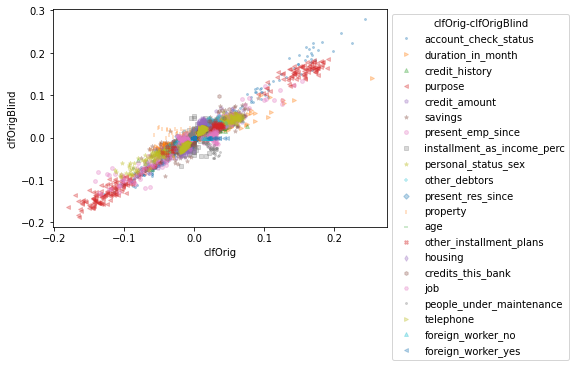

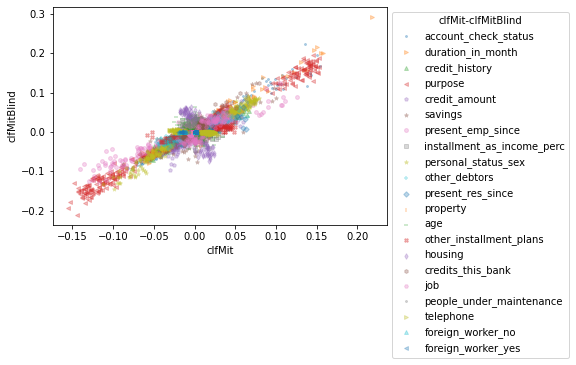

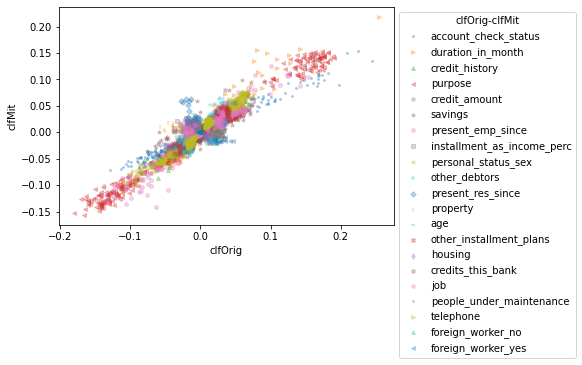

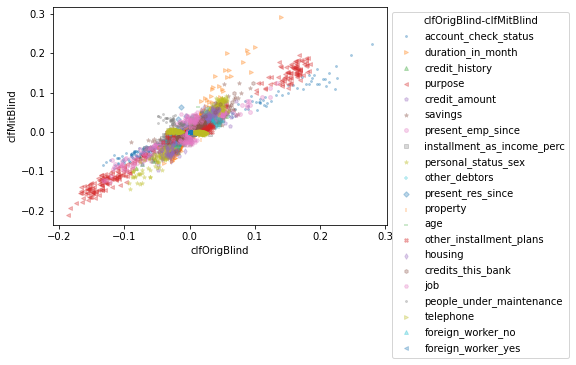

In [27]:
XAIPlots(shap_v,column_names,diffClfs=True)

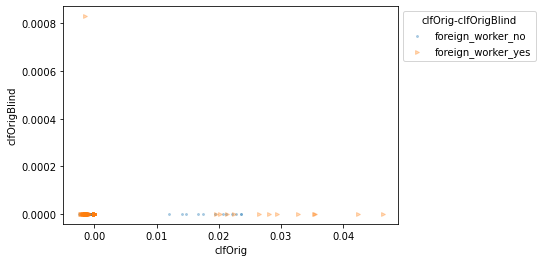

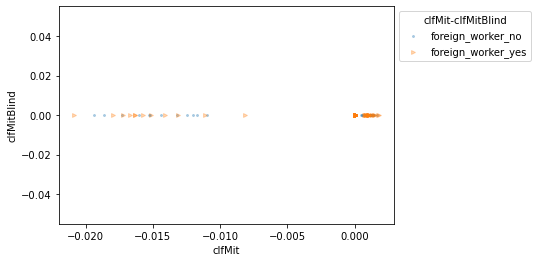

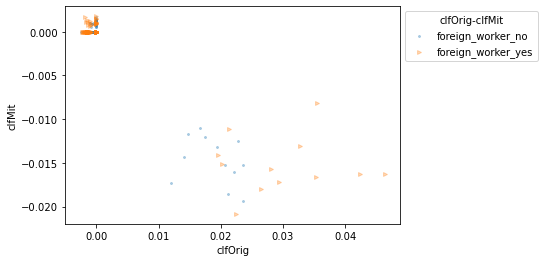

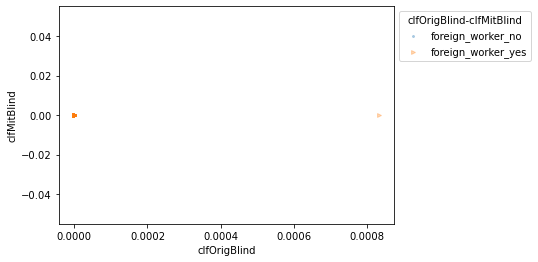

In [28]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [29]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [30]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [8]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [9]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -7.178127           -5.020288   
duration_in_month                      -4.373120           -9.671593   
credit_history                          4.722897            4.808420   
purpose                                -5.127288           -5.714286   
credit_amount                           1.845641            3.042765   
savings                                -0.158777            3.251581   
present_emp_since                      15.589853           14.201381   
installment_as_income_perc             -1.078036           -0.212912   
personal_status_sex                    -4.298396           -4.184623   
other_debtors                           0.278544           -3.005205   
present_res_since                       2.626866           -5.325850   
property                               -0.789751            0.128845   
age                                     0.338631           -0.043104   
other_installment_plans                -2.039995           -1.939442   
housing                                -4.309691           -6.543425   
credits_this_bank                      -0.823667           -0.981787   
job                                    -0.232398           -0.528232   
people_under_maintenance                0.248502           -1.538407   
telephone                               2.746657            1.322086   
foreign_worker_no                      -0.769098            0.608746   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -5.694816                 -6.503599  
duration_in_month                -6.860783                 -7.183930  
credit_history                    4.039850                  5.491467  
purpose                          -5.023690                 -5.817884  
credit_amount                     1.751664                  3.136743  
savings                           2.851569                  0.241235  
present_emp_since                15.749137                 14.042097  
installment_as_income_perc       -0.161210                 -1.129738  
personal_status_sex              -3.971997                 -4.511022  
other_debtors                    -1.586855                 -1.139805  
present_res_since                -1.907778                 -0.791206  
property                         -0.404787                 -0.256119  
age                              -0.005039                  0.300565  
other_installment_plans          -2.677286                 -1.302151  
housing                          -0.175458                -10.677658  
credits_this_bank                -0.550247                 -1.255206  
job                              -0.532902                 -0.227729  
people_under_maintenance         -1.394120                  0.104214  
telephone                         2.696685                  1.372058  
foreign_worker_no                -0.131805                 -0.028547  
foreign_worker_yes                0.000000                  0.000000

In [10]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.010934            0.017519   
duration_in_month                       0.028095            0.025864   
credit_history                          0.010836            0.007769   
purpose                                 0.006193            0.027287   
credit_amount                           0.007839            0.014386   
savings                                 0.014231            0.010611   
present_emp_since                       0.005338            0.016355   
installment_as_income_perc              0.008437            0.013267   
personal_status_sex                     0.016908            0.011192   
other_debtors                           0.005027            0.006255   
present_res_since                       0.006485            0.009694   
property                                0.010592            0.005597   
age                                     0.005346            0.017412   
other_installment_plans                 0.004665            0.008668   
housing                                 0.020280            0.037451   
credits_this_bank                       0.008335            0.012634   
job                                     0.009367            0.007901   
people_under_maintenance                0.021551            0.012014   
telephone                               0.008546            0.021382   
foreign_worker_no                       0.005670            0.005127   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.032663                  0.023270  
duration_in_month                 0.007215                  0.051175  
credit_history                    0.009326                  0.008025  
purpose                           0.021921                  0.010689  
credit_amount                     0.007034                  0.012898  
savings                           0.011756                  0.016610  
present_emp_since                 0.006609                  0.012950  
installment_as_income_perc        0.014691                  0.009624  
personal_status_sex               0.005377                  0.026544  
other_debtors                     0.013399                  0.009727  
present_res_since                 0.023255                  0.009562  
property                          0.017197                  0.006242  
age                               0.012627                  0.008468  
other_installment_plans           0.004746                  0.005620  
housing                           0.007686                  0.012345  
credits_this_bank                 0.004739                  0.007215  
job                               0.006244                  0.011478  
people_under_maintenance          0.011071                  0.022467  
telephone                         0.006786                  0.023381  
foreign_worker_no                 0.006557                  0.004466  
foreign_worker_yes                0.000000                  0.000000

In [11]:
EValues = computeE(lime_v)
EValues 

{'clfOrig': 0.21425889137262188,
 'clfMit': 0.1860696940762299,
 'clfOrigBlind': 0.20745019260330816,
 'clfMitBlind': 0.2226969128152419}

In [34]:
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Fix.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.001               0.005           0.002   
SA-Mean                  0.001               0.000           0.001   
NSA-Sum                  0.638               0.173           0.583   
NSA-Mean                 0.003               0.002           0.003   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.001  
SA-Mean                      0.000  
NSA-Sum                      0.188  
NSA-Mean                     0.002

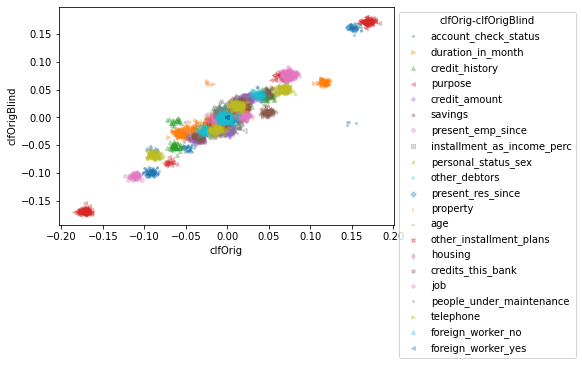

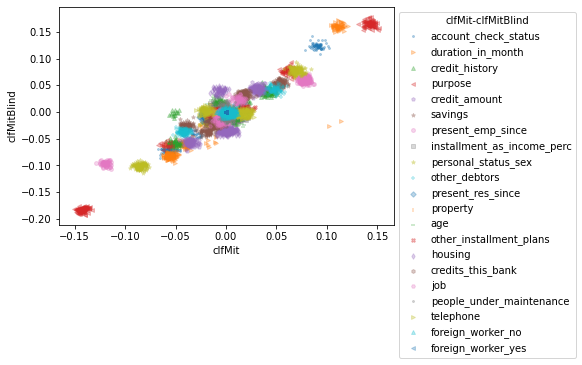

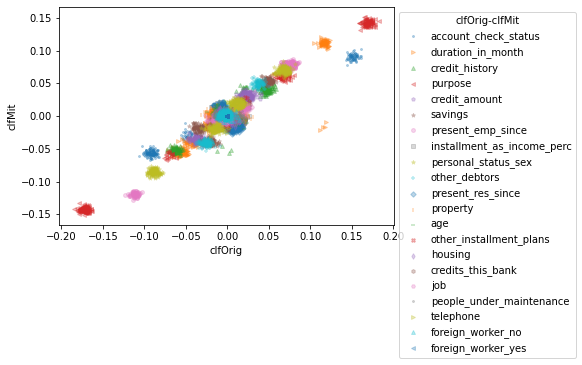

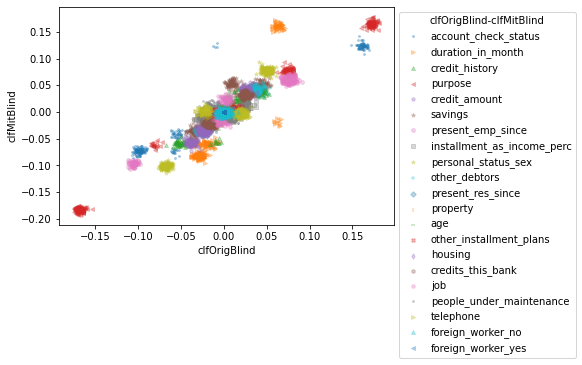

In [35]:
XAIPlots(lime_v,column_names,diffClfs=True)

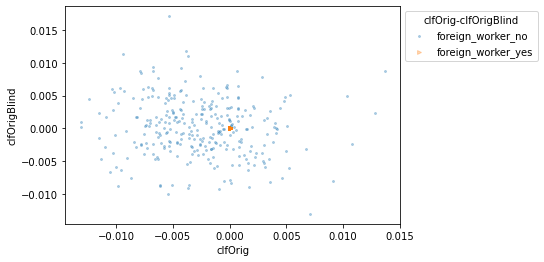

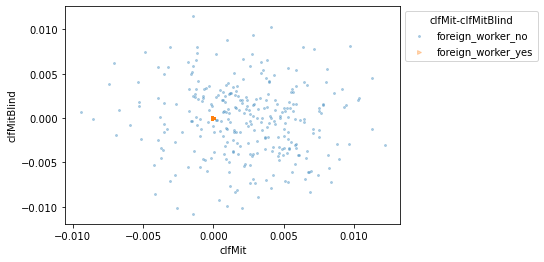

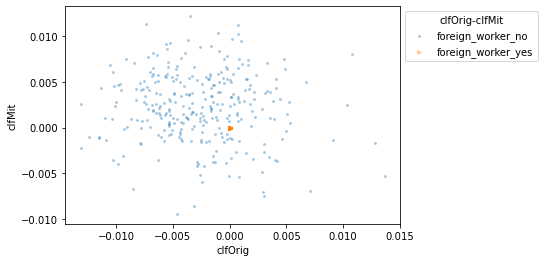

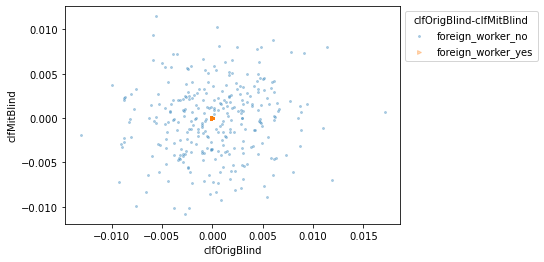

In [36]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [37]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [38]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [12]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [13]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -4.485600           -2.326963   
duration_in_month                      -5.325615           -5.922303   
credit_history                          5.282216            4.952128   
purpose                                -1.715416           -0.175782   
credit_amount                           2.075610            1.877808   
savings                                -0.197360            0.364909   
present_emp_since                       6.225673            2.818792   
installment_as_income_perc             -0.158711            0.186587   
personal_status_sex                     0.833186            2.405852   
other_debtors                           0.329009            0.626889   
present_res_since                      -0.204523            0.085444   
property                               -0.006262           -0.035608   
age                                     0.940095            0.505809   
other_installment_plans                 0.308002            0.451699   
housing                                 0.396355            0.217616   
credits_this_bank                      -0.464769           -0.481246   
job                                     0.354443            0.976694   
people_under_maintenance                0.059348           -0.042274   
telephone                               2.622670            1.141774   
foreign_worker_no                       0.200592           -0.140248   
foreign_worker_yes                      0.191700           -0.158014   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -2.351400                 -4.461163  
duration_in_month                -4.862033                 -6.385885  
credit_history                    5.870332                  4.364012  
purpose                          -0.971623                 -0.919575  
credit_amount                     1.902713                  2.050705  
savings                           0.262034                 -0.094486  
present_emp_since                 4.937136                  4.107329  
installment_as_income_perc        0.050440                 -0.022564  
personal_status_sex               0.675861                  2.563178  
other_debtors                     0.627065                  0.328833  
present_res_since                -0.167087                  0.048009  
property                          0.042622                 -0.084492  
age                               0.585008                  0.860896  
other_installment_plans           0.475815                  0.283886  
housing                           0.307594                  0.306378  
credits_this_bank                -0.302750                 -0.643266  
job                               1.170986                  0.160151  
people_under_maintenance          0.076950                 -0.059876  
telephone                         2.409393                  1.355050  
foreign_worker_no                 0.058861                  0.001483  
foreign_worker_yes                0.036499                 -0.002812

In [14]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.010260            0.009827   
duration_in_month                       0.011912            0.012193   
credit_history                          0.005911            0.004379   
purpose                                 0.010112            0.017972   
credit_amount                           0.006429            0.010571   
savings                                 0.010545            0.012148   
present_emp_since                       0.008370            0.009702   
installment_as_income_perc              0.008867            0.011177   
personal_status_sex                     0.009135            0.009676   
other_debtors                           0.005597            0.007698   
present_res_since                       0.001422            0.003626   
property                                0.010310            0.005864   
age                                     0.004310            0.017243   
other_installment_plans                 0.002322            0.007402   
housing                                 0.006857            0.018762   
credits_this_bank                       0.004337            0.008580   
job                                     0.009235            0.006865   
people_under_maintenance                0.015955            0.009625   
telephone                               0.007218            0.019197   
foreign_worker_no                       0.000819            0.000696   
foreign_worker_yes                      0.001699            0.000732   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.018811                  0.019371  
duration_in_month                 0.007533                  0.023603  
credit_history                    0.004912                  0.005211  
purpose                           0.014037                  0.012005  
credit_amount                     0.007072                  0.008425  
savings                           0.012168                  0.009114  
present_emp_since                 0.011105                  0.009374  
installment_as_income_perc        0.011580                  0.007376  
personal_status_sex               0.006257                  0.017326  
other_debtors                     0.008005                  0.008067  
present_res_since                 0.007150                  0.002977  
property                          0.011729                  0.006447  
age                               0.012349                  0.008424  
other_installment_plans           0.002488                  0.004599  
housing                           0.006345                  0.005750  
credits_this_bank                 0.003990                  0.004682  
job                               0.005164                  0.011787  
people_under_maintenance          0.008524                  0.017056  
telephone                         0.005511                  0.021053  
foreign_worker_no                 0.001511                  0.000005  
foreign_worker_yes                0.002426                  0.000009

In [15]:
EValues = computeE(shap_v)
EValues 

{'clfOrig': 0.16841832441257337,
 'clfMit': 0.153189717770442,
 'clfOrigBlind': 0.17299284735159265,
 'clfMitBlind': 0.16656970309865352}

In [42]:
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Change.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.004               0.000           0.004   
SA-Mean                  0.000               0.000           0.000   
NSA-Sum                  0.728               0.040           0.583   
NSA-Mean                 0.004               0.001           0.004   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.001  
SA-Mean                      0.000  
NSA-Sum                      0.160  
NSA-Mean                     0.002

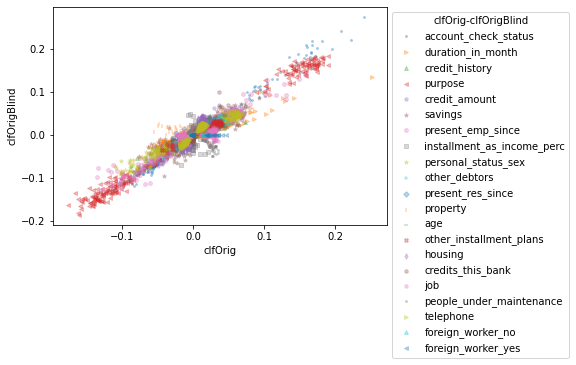

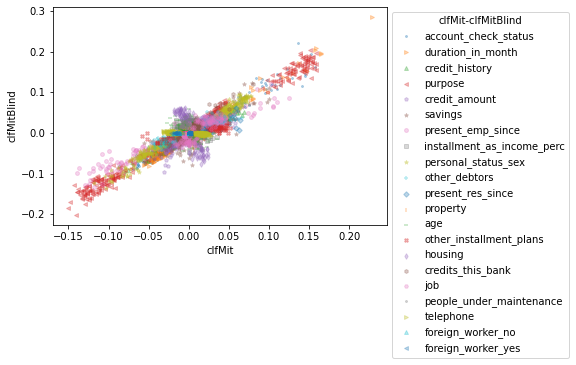

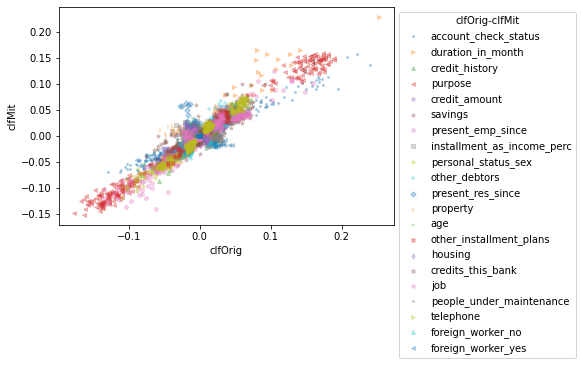

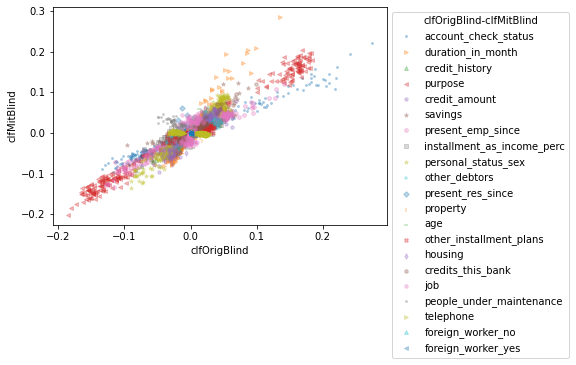

In [43]:
XAIPlots(shap_v,column_names,diffClfs=True)

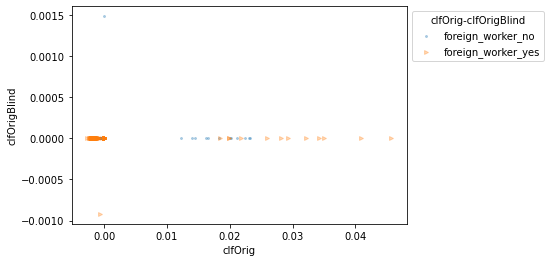

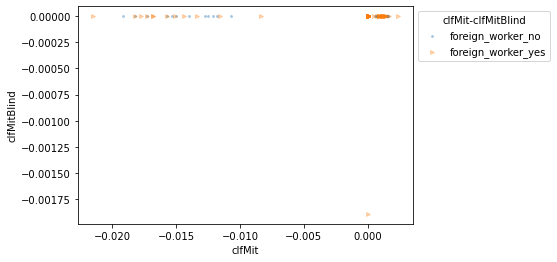

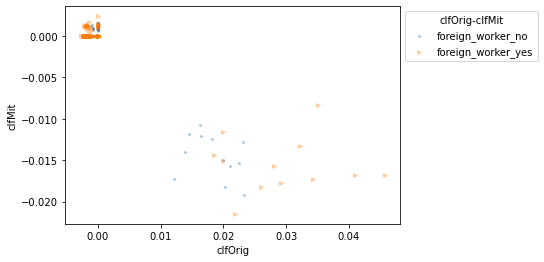

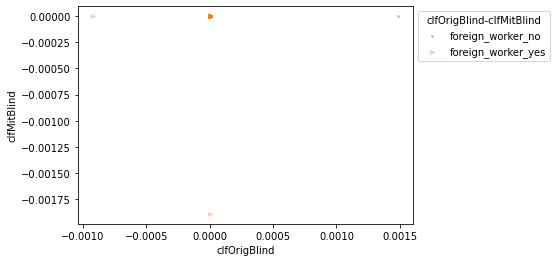

In [44]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [45]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [46]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [16]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [17]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -7.057006           -5.061778   
duration_in_month                      -4.392062           -6.904893   
credit_history                          4.549169            4.978039   
purpose                                -5.195921           -5.318527   
credit_amount                           1.697962            2.756377   
savings                                -0.110719           -3.601791   
present_emp_since                      15.475212           13.101501   
installment_as_income_perc             -1.050687           -0.326674   
personal_status_sex                    -4.235502            1.829799   
other_debtors                           0.288995           -2.591032   
present_res_since                       2.627215           -4.077644   
property                               -0.803013           -0.017307   
age                                     0.351015           -0.006281   
other_installment_plans                -1.893777           -2.114744   
housing                                -4.247454           -5.029745   
credits_this_bank                      -0.808954           -0.898354   
job                                    -0.187724           -0.826805   
people_under_maintenance                0.365428           -1.638607   
telephone                               2.747651            1.336885   
foreign_worker_no                      -0.752720            0.763235   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -5.065508                 -7.053275  
duration_in_month                -5.098253                 -6.198702  
credit_history                    3.782747                  5.744461  
purpose                          -4.648622                 -5.865826  
credit_amount                     0.938481                  3.515857  
savings                          -0.603325                 -3.109185  
present_emp_since                15.243849                 13.332864  
installment_as_income_perc       -0.401817                 -0.975544  
personal_status_sex              -3.773499                  1.367795  
other_debtors                    -1.494150                 -0.807887  
present_res_since                -0.911852                 -0.538577  
property                         -0.399155                 -0.421166  
age                               0.902664                 -0.557929  
other_installment_plans          -2.761556                 -1.246965  
housing                           1.213627                -10.490826  
credits_this_bank                -0.541828                 -1.165480  
job                              -0.578398                 -0.436131  
people_under_maintenance         -1.413295                  0.140116  
telephone                         2.765955                  1.318581  
foreign_worker_no                 0.045876                 -0.035361  
foreign_worker_yes                0.000000                  0.000000

In [18]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.010953            0.018953   
duration_in_month                       0.028474            0.026884   
credit_history                          0.011180            0.008981   
purpose                                 0.006031            0.035644   
credit_amount                           0.008047            0.019714   
savings                                 0.014371            0.012724   
present_emp_since                       0.005525            0.014719   
installment_as_income_perc              0.008452            0.014355   
personal_status_sex                     0.017229            0.022900   
other_debtors                           0.004921            0.006388   
present_res_since                       0.006221            0.006820   
property                                0.011192            0.005536   
age                                     0.005264            0.023394   
other_installment_plans                 0.004726            0.008433   
housing                                 0.019825            0.041191   
credits_this_bank                       0.008330            0.012797   
job                                     0.010064            0.008487   
people_under_maintenance                0.021815            0.013746   
telephone                               0.008296            0.023267   
foreign_worker_no                       0.005411            0.005514   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.033519                  0.022825  
duration_in_month                 0.008479                  0.050229  
credit_history                    0.008349                  0.007745  
purpose                           0.024274                  0.013807  
credit_amount                     0.004531                  0.012807  
savings                           0.021432                  0.005956  
present_emp_since                 0.004647                  0.013568  
installment_as_income_perc        0.016137                  0.009918  
personal_status_sex               0.007039                  0.033118  
other_debtors                     0.010544                  0.007663  
present_res_since                 0.018981                  0.009141  
property                          0.017822                  0.006430  
age                               0.014405                  0.011923  
other_installment_plans           0.004785                  0.005480  
housing                           0.010090                  0.011749  
credits_this_bank                 0.005051                  0.007167  
job                               0.006064                  0.013872  
people_under_maintenance          0.011473                  0.024115  
telephone                         0.007981                  0.023552  
foreign_worker_no                 0.007197                  0.005109  
foreign_worker_yes                0.000000                  0.000000

In [19]:
EValues = computeE(lime_v)
EValues 

{'clfOrig': 0.21425889137262188,
 'clfMit': 0.18438307100767917,
 'clfOrigBlind': 0.20750143794258363,
 'clfMitBlind': 0.2245635038239433}

In [50]:
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Change.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.005               0.019           0.009   
SA-Mean                  0.001               0.000           0.001   
NSA-Sum                  0.648               0.179           0.604   
NSA-Mean                 0.003               0.002           0.003   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.005  
SA-Mean                      0.000  
NSA-Sum                      0.170  
NSA-Mean                     0.002

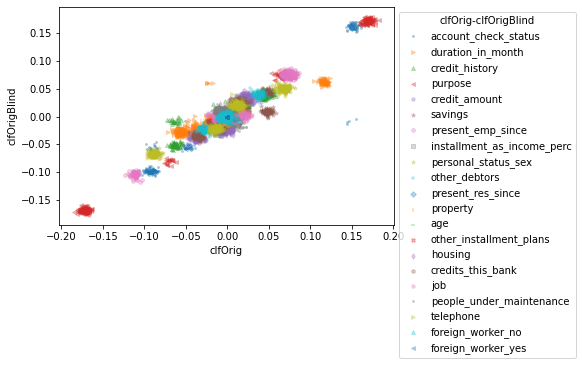

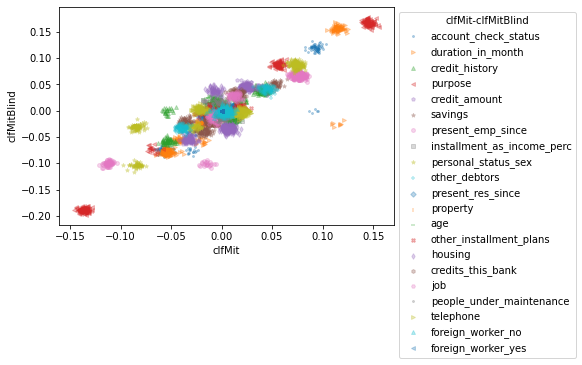

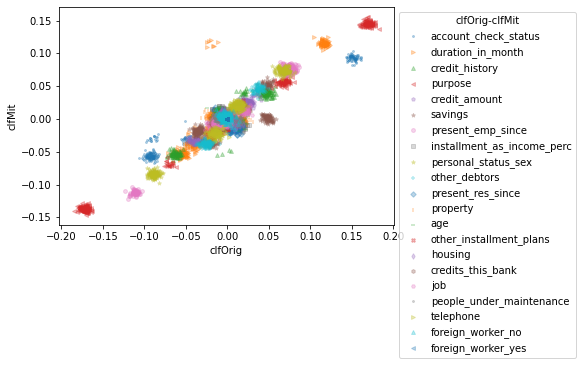

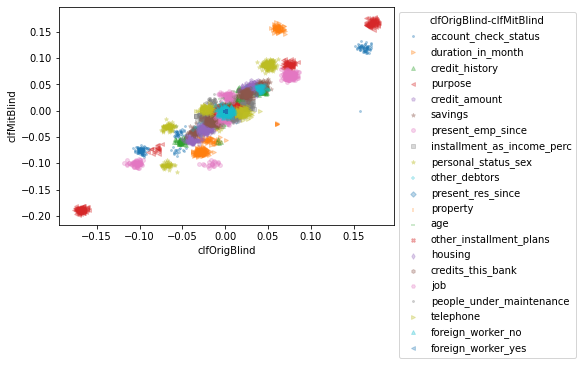

In [51]:
XAIPlots(lime_v,column_names,diffClfs=True)

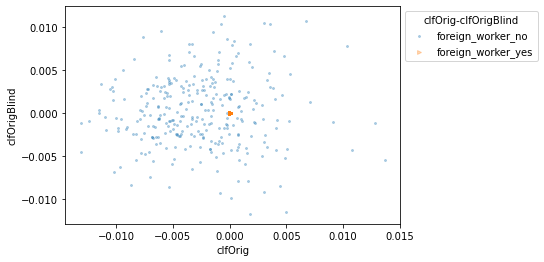

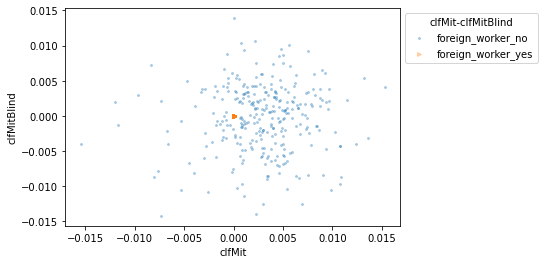

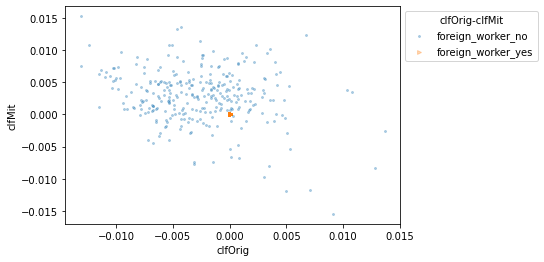

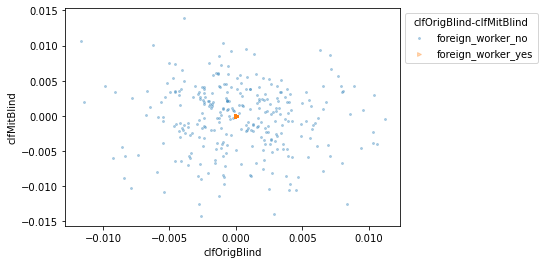

In [52]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [53]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [54]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [55]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -3.322236      -1.543736   
duration_in_month                 -5.989604      -5.659265   
credit_history                     6.500242       5.362592   
purpose                           -0.607644      -2.970806   
credit_amount                      2.282397       1.969201   
savings                            0.086026       0.118207   
present_emp_since                  6.219114       3.027586   
installment_as_income_perc        -0.025010       0.371015   
personal_status_sex                0.559653       1.269892   
other_debtors                     -0.100797       0.344207   
present_res_since                 -0.213666      -0.129922   
property                          -0.964111       0.773590   
age                                0.952401       0.321277   
other_installment_plans            0.310393       0.369347   
housing                            0.272501       0.258624   
credits_this_bank                 -0.534083      -0.073142   
job                                0.529414       1.593477   
people_under_maintenance           0.485853      -0.177908   
telephone                          1.938274       2.802102   
foreign_worker_no                  0.402706      -0.294682   
foreign_worker_yes                 0.469576      -0.312605   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -4.565322                -2.636625  
duration_in_month                           -4.090846                -7.055572  
credit_history                               4.222430                 4.367420  
purpose                                     -3.010588                -0.333635  
credit_amount                                2.129769                 1.895071  
savings                                      0.248154                 0.743456  
present_emp_since                            4.179737                 3.763916  
installment_as_income_perc                  -0.017755                -0.002873  
personal_status_sex                          0.755599                 2.499142  
other_debtors                                0.412231                 0.236442  
present_res_since                           -0.178530                 0.398920  
property                                     0.626854                -0.832487  
age                                          0.895097                 1.249593  
other_installment_plans                      0.349816                 0.289096  
housing                                      0.309223                 0.233159  
credits_this_bank                           -0.585929                -0.457140  
job                                          0.123303                 0.320631  
people_under_maintenance                    -0.086273                 0.240679  
telephone                                    2.727747                -0.347144  
foreign_worker_no                            0.001483                 0.000000  
foreign_worker_yes                          -0.000089                -0.001893

In [56]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.000992       0.001354   
duration_in_month                  0.000726       0.006643   
credit_history                     0.001056       0.000543   
purpose                            0.001288       0.004639   
credit_amount                      0.000707       0.001008   
savings                            0.000519       0.001615   
present_emp_since                  0.003037       0.001361   
installment_as_income_perc         0.000853       0.000436   
personal_status_sex                0.000878       0.002231   
other_debtors                      0.002308       0.001178   
present_res_since                  0.000321       0.000498   
property                           0.000640       0.000610   
age                                0.000540       0.000478   
other_installment_plans            0.000514       0.000980   
housing                            0.000264       0.000165   
credits_this_bank                  0.000403       0.000468   
job                                0.000391       0.000891   
people_under_maintenance           0.000727       0.000205   
telephone                          0.000675       0.000462   
foreign_worker_no                  0.000119       0.000130   
foreign_worker_yes                 0.000414       0.000125   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.002810                 0.002925  
duration_in_month                            0.001685                 0.003743  
credit_history                               0.000465                 0.000566  
purpose                                      0.000828                 0.005204  
credit_amount                                0.000526                 0.000624  
savings                                      0.002193                 0.001838  
present_emp_since                            0.003807                 0.002902  
installment_as_income_perc                   0.000514                 0.000528  
personal_status_sex                          0.000794                 0.005690  
other_debtors                                0.001214                 0.001359  
present_res_since                            0.000308                 0.000634  
property                                     0.000679                 0.000594  
age                                          0.000549                 0.001831  
other_installment_plans                      0.000579                 0.000348  
housing                                      0.000714                 0.000570  
credits_this_bank                            0.000774                 0.001488  
job                                          0.000681                 0.000596  
people_under_maintenance                     0.000621                 0.000638  
telephone                                    0.001328                 0.000403  
foreign_worker_no                            0.000005                 0.000000  
foreign_worker_yes                           0.000006                 0.000006

In [57]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.436          0.304                      0.001   
SA-Mean             0.000          0.000                      0.000   
NSA-Sum             1.679          1.533                      1.553   
NSA-Mean            0.001          0.001                      0.001   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.001  
SA-Mean                     0.000  
NSA-Sum                     1.469  
NSA-Mean                    0.002

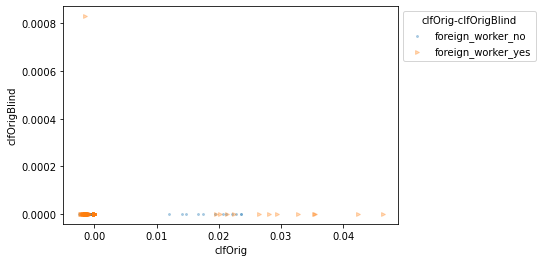

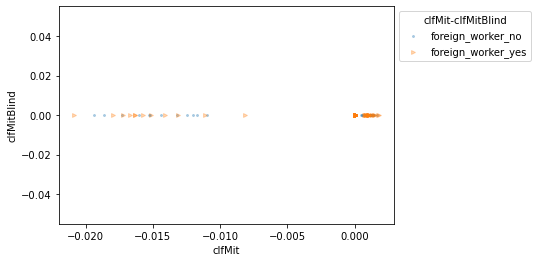

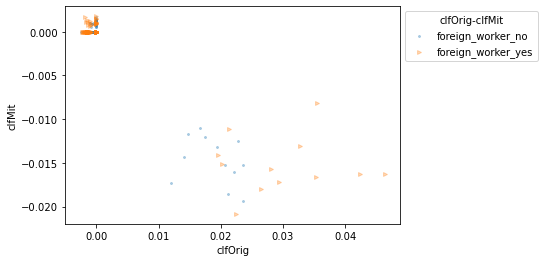

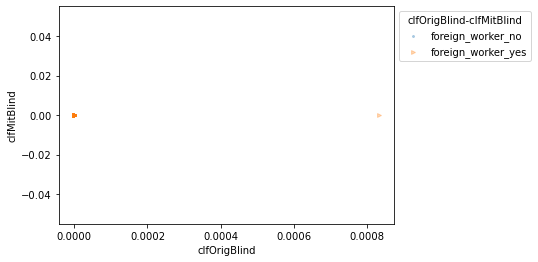

In [58]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [59]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [60]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [61]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -6.831458      -3.928867   
duration_in_month                 -6.324257      -5.634779   
credit_history                     3.667697       4.154900   
purpose                           -6.192668      -3.479644   
credit_amount                      0.338110       2.352036   
savings                            2.386252      -0.138008   
present_emp_since                 14.904339      16.088647   
installment_as_income_perc        -0.650447       0.087419   
personal_status_sex               -4.671142      -3.074353   
other_debtors                     -0.109530      -2.971475   
present_res_since                  3.729591      -6.549221   
property                          -1.409461       0.605520   
age                                0.613598       0.284027   
other_installment_plans           -2.256019      -3.182823   
housing                           -0.082574       1.120742   
credits_this_bank                 -0.619285      -0.472790   
job                               -0.515317      -0.595982   
people_under_maintenance          -3.316934       0.509519   
telephone                          2.238661       3.223979   
foreign_worker_no                 -1.632854       1.546925   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -7.403675                -6.153199  
duration_in_month                           -2.440926               -10.941706  
credit_history                               5.604369                 5.631559  
purpose                                     -4.130541                -7.553168  
credit_amount                                3.205493                 3.447106  
savings                                     -2.655748                -0.212202  
present_emp_since                           16.160727                11.214235  
installment_as_income_perc                  -1.478276                -0.627005  
personal_status_sex                         -3.862755                 0.719529  
other_debtors                                0.677070                -2.624762  
present_res_since                            1.524490                -2.854273  
property                                    -0.183303                -0.493982  
age                                          0.076048                -0.333412  
other_installment_plans                     -1.677753                -0.871364  
housing                                     -8.474572               -12.693913  
credits_this_bank                           -1.013335                -1.407351  
job                                          0.095195                -0.759055  
people_under_maintenance                     3.930864                -3.686534  
telephone                                    3.255647                -0.565008  
foreign_worker_no                            0.111036                -0.174944  
foreign_worker_yes                           0.000000                 0.000000

In [62]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status                    0.0       0.005996   
duration_in_month                       0.0       0.010271   
credit_history                          0.0       0.005129   
purpose                                 0.0       0.005953   
credit_amount                           0.0       0.006398   
savings                                 0.0       0.016453   
present_emp_since                       0.0       0.006158   
installment_as_income_perc              0.0       0.004771   
personal_status_sex                     0.0       0.005702   
other_debtors                           0.0       0.005172   
present_res_since                       0.0       0.005675   
property                                0.0       0.004400   
age                                     0.0       0.005639   
other_installment_plans                 0.0       0.004031   
housing                                 0.0       0.006474   
credits_this_bank                       0.0       0.004336   
job                                     0.0       0.004477   
people_under_maintenance                0.0       0.004040   
telephone                               0.0       0.004568   
foreign_worker_no                       0.0       0.004337   
foreign_worker_yes                      0.0       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.004519                 0.008520  
duration_in_month                            0.004591                 0.010188  
credit_history                               0.004943                 0.006193  
purpose                                      0.003944                 0.007471  
credit_amount                                0.004805                 0.005563  
savings                                      0.004457                 0.016436  
present_emp_since                            0.004613                 0.012764  
installment_as_income_perc                   0.004913                 0.005367  
personal_status_sex                          0.004869                 0.024224  
other_debtors                                0.004621                 0.005791  
present_res_since                            0.004656                 0.005283  
property                                     0.004808                 0.005261  
age                                          0.004644                 0.007496  
other_installment_plans                      0.003980                 0.004999  
housing                                      0.004210                 0.004998  
credits_this_bank                            0.004196                 0.005406  
job                                          0.004501                 0.005926  
people_under_maintenance                     0.004216                 0.004722  
telephone                                    0.004777                 0.004976  
foreign_worker_no                            0.004738                 0.004862  
foreign_worker_yes                           0.000000                 0.000000

In [63]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.816          0.773                      0.056   
SA-Mean             0.000          0.002                      0.002   
NSA-Sum             3.203          3.077                      3.571   
NSA-Mean            0.000          0.006                      0.005   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.087  
SA-Mean                     0.002  
NSA-Sum                     3.831  
NSA-Mean                    0.008

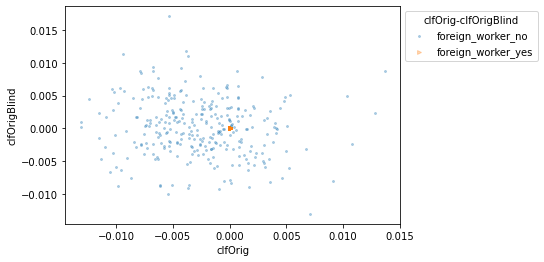

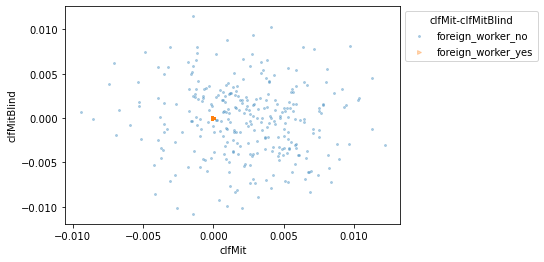

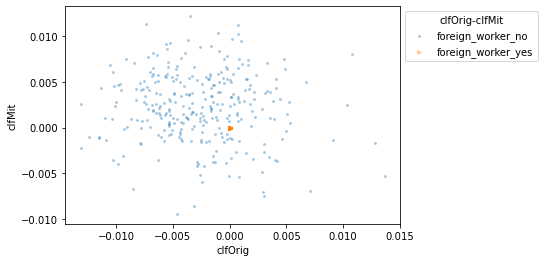

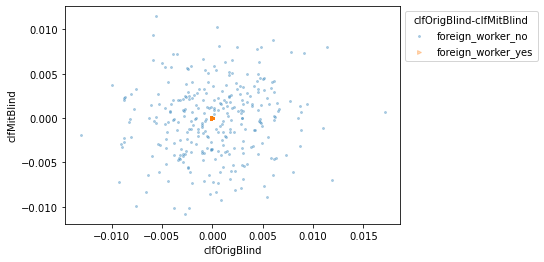

In [64]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [62]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [63]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'US_RF_Performances.csv')
res

Original Train Dimension = 700
Mitigated Train Dimension = 700
Test Dimension = 300
---> CLF Original: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 250 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 246 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 247 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 248 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.736667            0.740000       0.750000   
Precision           0.601746            0.597424       0.603030   
Recall              0.267320            0.313725       0.371895   
F1 Score            0.366158            0.409862       0.458993   
Discrimination      0.131944            0.142361       0.145833   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.766667  CLF Mitigated Blind    0.003333   
Precision                  0.741746  CLF Mitigated Blind    0.004322   
Recall                     0.301961        CLF Mitigated    0.046405   
F1 Score                   0.426266        CLF Mitigated    0.043704   
Discrimination             0.138889         CLF Original    0.010417   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.016667   0.013333     0.026667  
Precision         0.138716   0.001284     0.144322  
Recall            0.069935   0.104575     0.011765  
F1 Score          0.032727   0.092835     0.016403  
Discrimination    0.006944   0.013889     0.003472

In [64]:

PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [65]:
PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [4]:
res = pd.read_csv(path_res+'US_RF_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'US_RF_Performances.csv')
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy               0.737               0.740          0.750   
Precision              0.602               0.597          0.603   
Recall                 0.267               0.314          0.372   
F1 Score               0.366               0.410          0.459   
Discrimination         0.132               0.142          0.146   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                      0.767  CLF Mitigated Blind       0.003   
Precision                     0.742  CLF Mitigated Blind       0.004   
Recall                        0.302        CLF Mitigated       0.046   
F1 Score                      0.426        CLF Mitigated       0.044   
Discrimination                0.139         CLF Original       0.010   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy             0.017      0.013        0.027  
Precision            0.139      0.001        0.144  
Recall               0.070      0.105        0.012  
F1 Score             0.033      0.093        0.016  
Discrimination       0.007      0.014        0.003

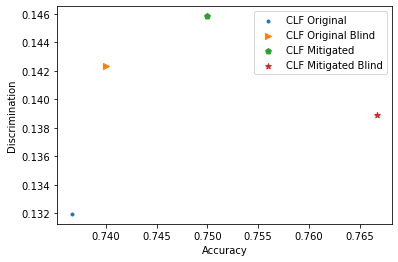

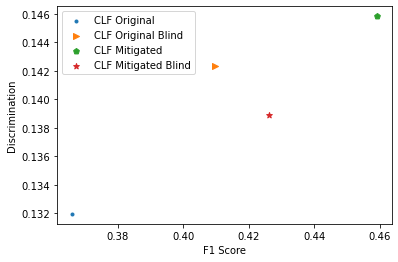

In [6]:
plotDisc(res)

In [68]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 12 instances.
    * "('foreign_worker_yes',)" grouping has 288 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 11 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 203 data points.
        - The class *Bad* has 85 data points.


In [69]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fair

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


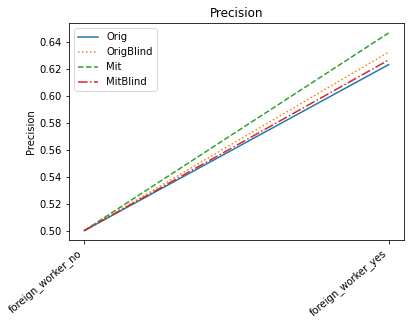

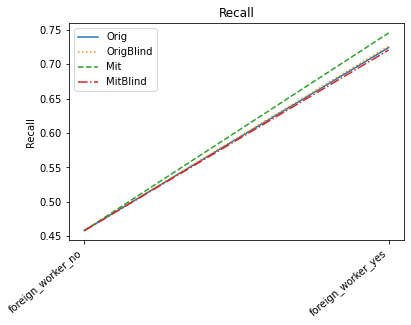

In [70]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [71]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [72]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [20]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [21]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -7.700020           -8.225241   
duration_in_month                     -13.434964          -11.145248   
credit_history                          3.960318            4.197046   
purpose                                 6.533479            5.186486   
credit_amount                         -17.847472          -19.649572   
savings                                -1.867156           -4.332365   
present_emp_since                      -1.998611           -1.692360   
installment_as_income_perc              1.244590            1.416043   
personal_status_sex                     0.788725            0.027083   
other_debtors                           0.555102            0.516337   
present_res_since                      -1.555772           -0.937296   
property                                0.604793            0.543490   
age                                     5.091199            4.124703   
other_installment_plans                 2.690937            2.227566   
housing                                 2.729433            3.097189   
credits_this_bank                      -0.228750           -0.212884   
job                                     0.752105            0.561991   
people_under_maintenance                1.219273            1.100448   
telephone                               0.119659            0.095367   
foreign_worker_no                      -0.124896           -0.084576   
foreign_worker_yes                     -0.205034           -0.053040   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -8.522911                 -7.402350  
duration_in_month               -12.118638                -12.461575  
credit_history                    4.535421                  3.621943  
purpose                           6.247130                  5.472835  
credit_amount                   -20.121728                -17.375316  
savings                          -2.930561                 -3.268960  
present_emp_since                -1.690989                 -1.999982  
installment_as_income_perc        1.156727                  1.503906  
personal_status_sex               0.623732                  0.192076  
other_debtors                     0.648416                  0.423024  
present_res_since                -1.521375                 -0.971693  
property                          0.621259                  0.527024  
age                               4.774813                  4.441089  
other_installment_plans           2.663145                  2.255359  
housing                           3.319831                  2.506791  
credits_this_bank                -0.194237                 -0.247397  
job                               0.853377                  0.460718  
people_under_maintenance          1.059055                  1.260667  
telephone                         0.109976                  0.105051  
foreign_worker_no                -0.210576                  0.001104  
foreign_worker_yes               -0.258074                  0.000000

In [22]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.008295            0.006705   
duration_in_month                       0.008308            0.007916   
credit_history                          0.004689            0.003597   
purpose                                 0.004648            0.004251   
credit_amount                           0.007220            0.013608   
savings                                 0.004074            0.003575   
present_emp_since                       0.003163            0.002759   
installment_as_income_perc              0.004286            0.003866   
personal_status_sex                     0.002478            0.002630   
other_debtors                           0.000834            0.001086   
present_res_since                       0.002530            0.002497   
property                                0.003642            0.002891   
age                                     0.004277            0.004061   
other_installment_plans                 0.002195            0.002867   
housing                                 0.003427            0.003275   
credits_this_bank                       0.001668            0.001283   
job                                     0.002307            0.002665   
people_under_maintenance                0.000944            0.001038   
telephone                               0.001674            0.002135   
foreign_worker_no                       0.000424            0.000285   
foreign_worker_yes                      0.000693            0.000195   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.009425                  0.007047  
duration_in_month                 0.010769                  0.006111  
credit_history                    0.006786                  0.004327  
purpose                           0.005747                  0.004198  
credit_amount                     0.013964                  0.005691  
savings                           0.006799                  0.006401  
present_emp_since                 0.002994                  0.003219  
installment_as_income_perc        0.003394                  0.004935  
personal_status_sex               0.002498                  0.003057  
other_debtors                     0.001101                  0.000659  
present_res_since                 0.002646                  0.002393  
property                          0.003895                  0.003303  
age                               0.004581                  0.004888  
other_installment_plans           0.003079                  0.002845  
housing                           0.002499                  0.002527  
credits_this_bank                 0.001895                  0.001331  
job                               0.002035                  0.002085  
people_under_maintenance          0.001339                  0.000659  
telephone                         0.001830                  0.002020  
foreign_worker_no                 0.000156                  0.000004  
foreign_worker_yes                0.000525                  0.000000

In [23]:
EValues = computeE(shap_v)
EValues 

{'clfOrig': 0.13823213911217017,
 'clfMit': 0.1509119451522128,
 'clfOrigBlind': 0.13983215370289384,
 'clfMitBlind': 0.14631058657694263}

In [13]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.165               0.069           0.234   
SA-Mean                  0.001               0.000           0.000   
NSA-Sum                  3.733               3.647           3.880   
NSA-Mean                 0.004               0.004           0.005   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.001  
SA-Mean                      0.000  
NSA-Sum                      3.500  
NSA-Mean                     0.004

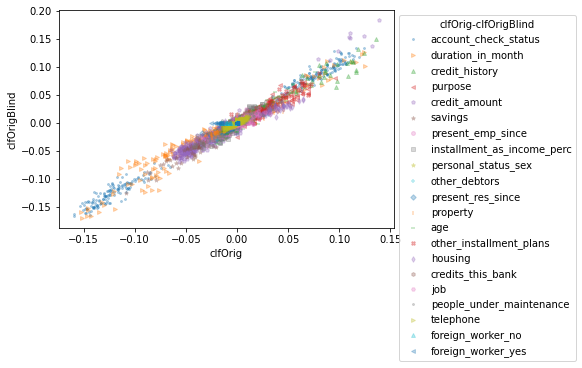

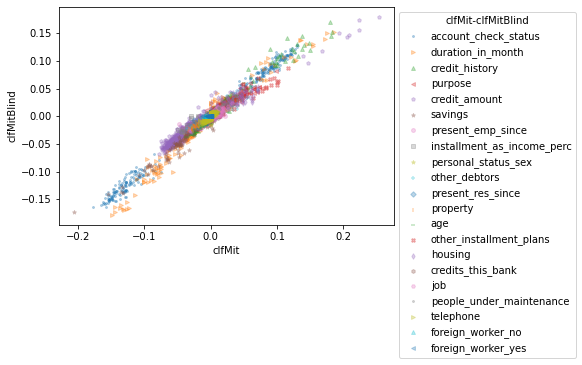

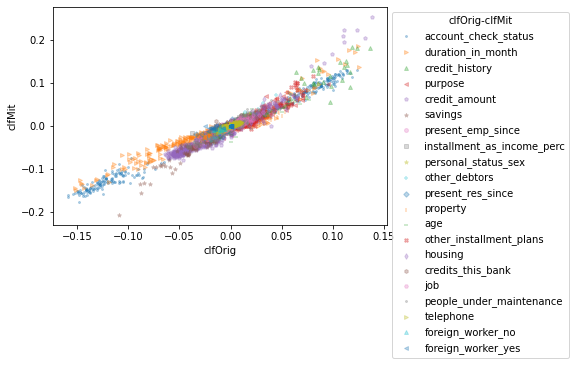

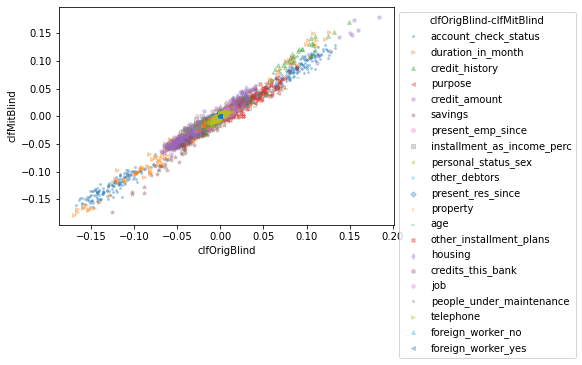

In [77]:
XAIPlots(shap_v,column_names,diffClfs=True)

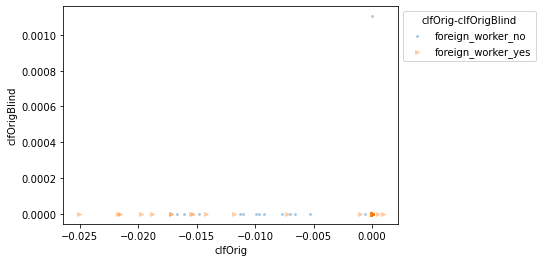

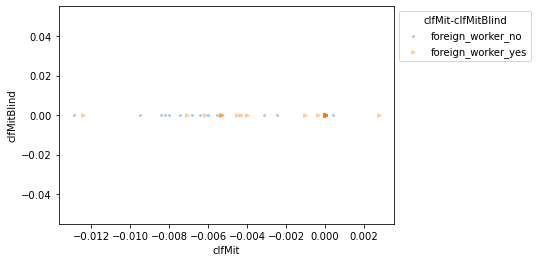

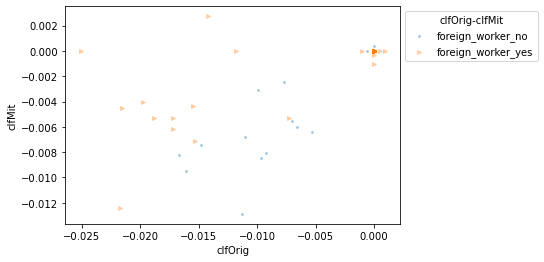

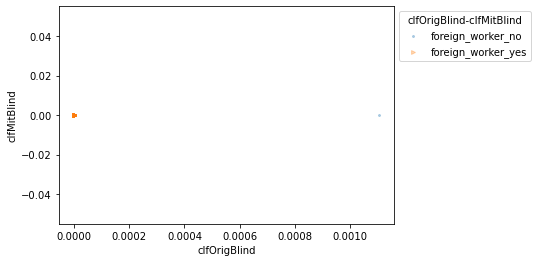

In [78]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [79]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [80]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [24]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [25]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -1.550618           -1.800162   
duration_in_month                      -1.290606           -1.995586   
credit_history                         -0.624472           -0.725799   
purpose                                 0.944271            1.058423   
credit_amount                          -1.190493           -1.508034   
savings                                 0.167439            0.286797   
present_emp_since                       0.321221            0.426340   
installment_as_income_perc             -0.806840           -0.762111   
personal_status_sex                     0.408357            0.198231   
other_debtors                           0.012420           -0.157431   
present_res_since                      -0.215809            0.032790   
property                                0.335544            0.307013   
age                                     1.167339            1.583301   
other_installment_plans                 1.374358            1.453483   
housing                                -0.042790           -0.384238   
credits_this_bank                      -0.174307           -0.053564   
job                                     0.478674            0.490309   
people_under_maintenance                0.027729            0.091528   
telephone                               0.406883            0.642167   
foreign_worker_no                       0.003315           -0.035716   
foreign_worker_yes                      0.041880           -0.040942   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -1.689442                 -1.661338  
duration_in_month                -1.555359                 -1.730833  
credit_history                   -0.447772                 -0.902499  
purpose                           1.025534                  0.977161  
credit_amount                    -1.197664                 -1.500863  
savings                           0.222181                  0.232055  
present_emp_since                 0.451476                  0.296085  
installment_as_income_perc       -0.776006                 -0.792945  
personal_status_sex               0.428516                  0.178071  
other_debtors                    -0.024059                 -0.120953  
present_res_since                -0.209040                  0.026021  
property                          0.329108                  0.313449  
age                               1.277222                  1.473418  
other_installment_plans           1.759689                  1.068152  
housing                          -0.246045                 -0.180983  
credits_this_bank                -0.222544                 -0.005326  
job                               0.660381                  0.308601  
people_under_maintenance          0.062361                  0.056896  
telephone                         0.509649                  0.539401  
foreign_worker_no                -0.032402                  0.000000  
foreign_worker_yes                0.000938                  0.000000

In [26]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.007284            0.006038   
duration_in_month                       0.007347            0.007455   
credit_history                          0.003535            0.003170   
purpose                                 0.004045            0.004463   
credit_amount                           0.005607            0.005797   
savings                                 0.003394            0.003223   
present_emp_since                       0.002796            0.002645   
installment_as_income_perc              0.003866            0.003395   
personal_status_sex                     0.001949            0.001927   
other_debtors                           0.001505            0.001482   
present_res_since                       0.002396            0.002421   
property                                0.003921            0.002905   
age                                     0.004184            0.003769   
other_installment_plans                 0.001963            0.003366   
housing                                 0.004695            0.004069   
credits_this_bank                       0.001672            0.001462   
job                                     0.002629            0.002474   
people_under_maintenance                0.001572            0.001402   
telephone                               0.001470            0.001897   
foreign_worker_no                       0.000992            0.000496   
foreign_worker_yes                      0.001692            0.000343   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.009404                  0.006594  
duration_in_month                 0.008746                  0.005706  
credit_history                    0.005083                  0.004312  
purpose                           0.004957                  0.004100  
credit_amount                     0.007651                  0.005153  
savings                           0.007566                  0.005772  
present_emp_since                 0.002995                  0.002752  
installment_as_income_perc        0.003183                  0.004136  
personal_status_sex               0.002106                  0.002322  
other_debtors                     0.001548                  0.001146  
present_res_since                 0.002398                  0.002230  
property                          0.004730                  0.003318  
age                               0.005558                  0.004955  
other_installment_plans           0.003546                  0.002616  
housing                           0.003477                  0.004019  
credits_this_bank                 0.001574                  0.001642  
job                               0.002075                  0.002222  
people_under_maintenance          0.001668                  0.001250  
telephone                         0.001561                  0.001948  
foreign_worker_no                 0.000534                  0.000000  
foreign_worker_yes                0.001499                  0.000000

In [27]:
EValues = computeE(shap_v)
EValues 

{'clfOrig': 0.13557592657962778,
 'clfMit': 0.14689050937987375,
 'clfOrigBlind': 0.1374520616779643,
 'clfMitBlind': 0.1414467958745199}

In [14]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix_Tree.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.023               0.038           0.017   
SA-Mean                  0.001               0.000           0.001   
NSA-Sum                  0.607               0.735           0.689   
NSA-Mean                 0.003               0.003           0.004   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      0.651  
NSA-Mean                     0.003

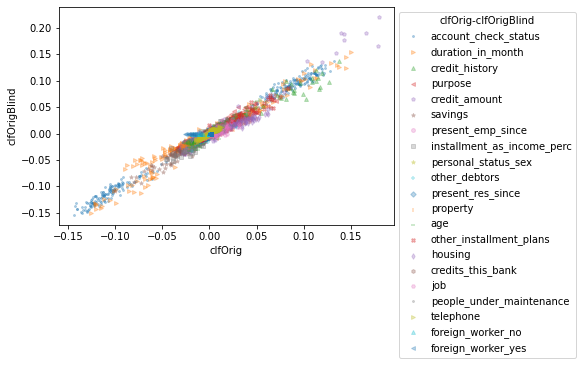

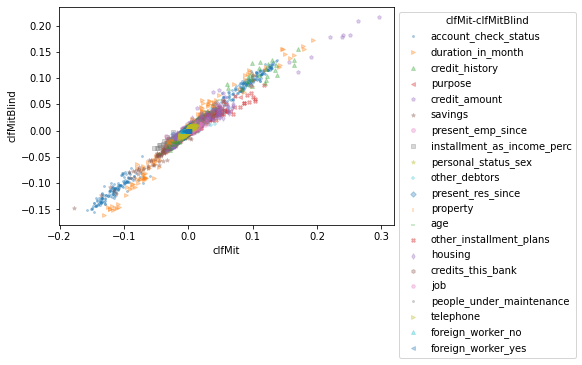

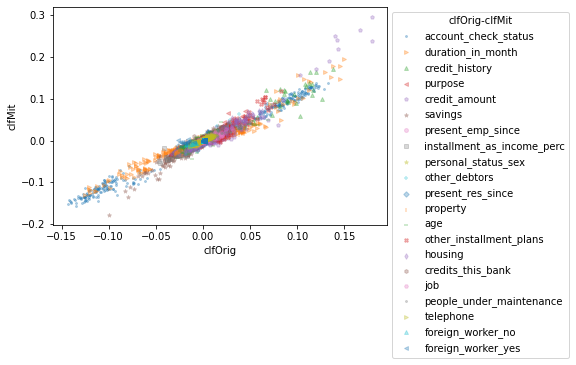

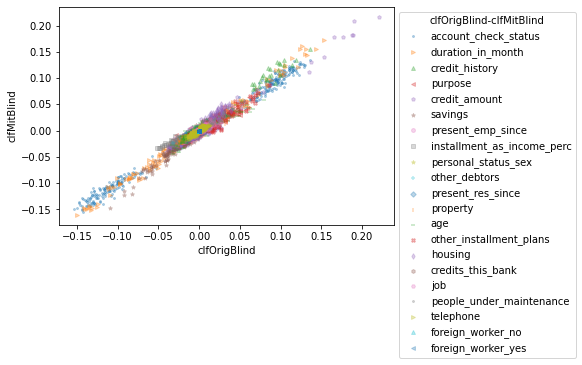

In [85]:
XAIPlots(shap_v,column_names,diffClfs=True)

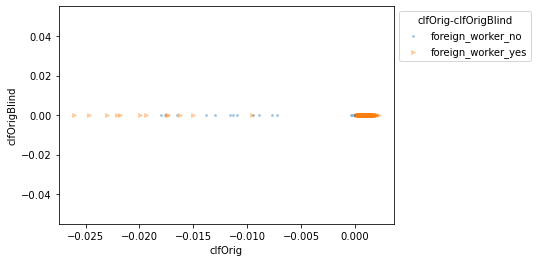

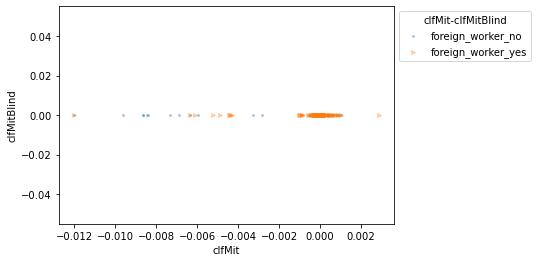

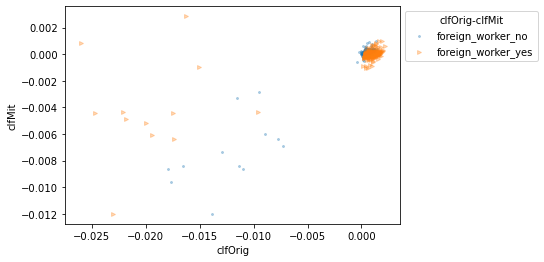

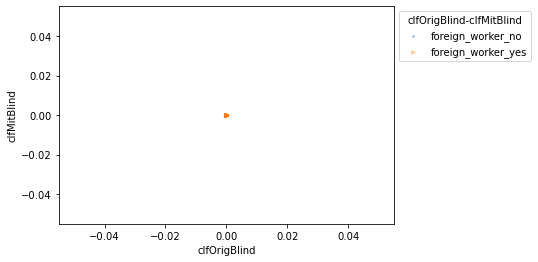

In [86]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [87]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [88]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [28]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [29]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    1.988524            1.422373   
duration_in_month                     -11.821762          -13.170395   
credit_history                          6.098361            6.155996   
purpose                                 4.860805            5.136474   
credit_amount                         -20.287727          -25.177764   
savings                                 2.446512            2.269613   
present_emp_since                      -0.571456           -0.680486   
installment_as_income_perc              0.131101            0.104845   
personal_status_sex                    -0.198305           -0.824613   
other_debtors                           0.047608            0.413110   
present_res_since                      -0.696124           -0.044411   
property                                1.583963            1.617541   
age                                     3.985647            4.578849   
other_installment_plans                -5.553005           -6.419180   
housing                                -2.262594           -2.444618   
credits_this_bank                      -0.051271            0.044202   
job                                    -0.735370           -0.981920   
people_under_maintenance               -0.291066           -0.392190   
telephone                               0.431627            0.819402   
foreign_worker_no                       0.038837            0.105240   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              2.970120                  0.440777  
duration_in_month               -13.580603                -11.411555  
credit_history                    6.333921                  5.920436  
purpose                           4.971674                  5.025605  
credit_amount                   -24.153885                -21.311605  
savings                           2.104378                  2.611747  
present_emp_since                -0.646637                 -0.605306  
installment_as_income_perc       -0.028597                  0.264542  
personal_status_sex              -0.406577                 -0.616341  
other_debtors                     0.486216                 -0.025499  
present_res_since                -0.464615                 -0.275920  
property                          1.640374                  1.561130  
age                               4.968714                  3.595782  
other_installment_plans          -6.110473                 -5.861712  
housing                          -2.879982                 -1.827230  
credits_this_bank                 0.133898                 -0.140968  
job                              -0.974897                 -0.742393  
people_under_maintenance         -0.222246                 -0.461010  
telephone                         0.354615                  0.896414  
foreign_worker_no                 0.234363                 -0.090287  
foreign_worker_yes                0.000000                  0.000000

In [30]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.010642            0.011009   
duration_in_month                       0.013335            0.005273   
credit_history                          0.004735            0.006308   
purpose                                 0.005348            0.005179   
credit_amount                           0.010866            0.022985   
savings                                 0.006853            0.005240   
present_emp_since                       0.004651            0.005057   
installment_as_income_perc              0.005124            0.005924   
personal_status_sex                     0.004040            0.005200   
other_debtors                           0.004452            0.004910   
present_res_since                       0.004786            0.005089   
property                                0.004419            0.004559   
age                                     0.007188            0.006422   
other_installment_plans                 0.003925            0.005598   
housing                                 0.005614            0.005187   
credits_this_bank                       0.005137            0.005736   
job                                     0.003992            0.005646   
people_under_maintenance                0.004204            0.004346   
telephone                               0.004785            0.004833   
foreign_worker_no                       0.003883            0.004945   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.013321                  0.008119  
duration_in_month                 0.005441                  0.012576  
credit_history                    0.006642                  0.004504  
purpose                           0.006056                  0.004608  
credit_amount                     0.028712                  0.006800  
savings                           0.008718                  0.006866  
present_emp_since                 0.004543                  0.004763  
installment_as_income_perc        0.004559                  0.006982  
personal_status_sex               0.005058                  0.004943  
other_debtors                     0.004651                  0.004668  
present_res_since                 0.005140                  0.004912  
property                          0.004084                  0.004256  
age                               0.006012                  0.006598  
other_installment_plans           0.005867                  0.004492  
housing                           0.004530                  0.004702  
credits_this_bank                 0.005934                  0.004864  
job                               0.004826                  0.004438  
people_under_maintenance          0.004201                  0.004254  
telephone                         0.004647                  0.004618  
foreign_worker_no                 0.004689                  0.004326  
foreign_worker_yes                0.000000                  0.000000

In [31]:
EValues = computeE(lime_v)
EValues 

{'clfOrig': 0.1571573094273073,
 'clfMit': 0.17839521266434627,
 'clfOrigBlind': 0.167638098555326,
 'clfMitBlind': 0.17661135078896398}

In [15]:
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Fix.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.019               0.053           0.117   
SA-Mean                  0.002               0.002           0.002   
NSA-Sum                  3.371               3.826           3.865   
NSA-Mean                 0.006               0.007           0.007   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.045  
SA-Mean                      0.002  
NSA-Sum                      3.347  
NSA-Mean                     0.006

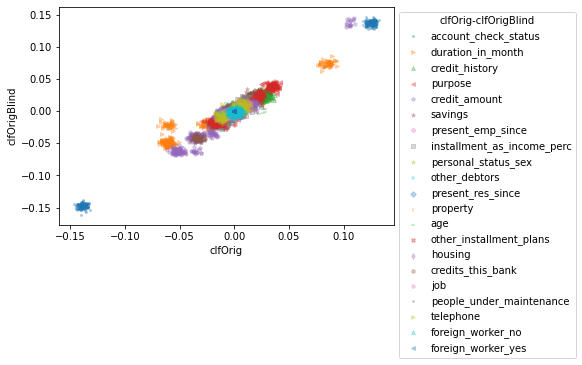

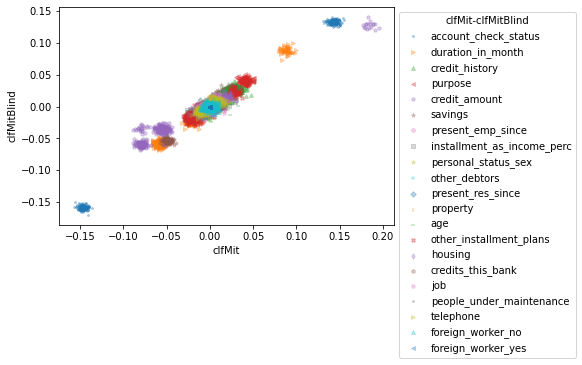

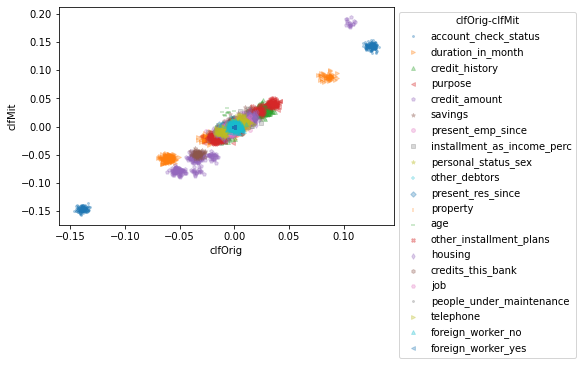

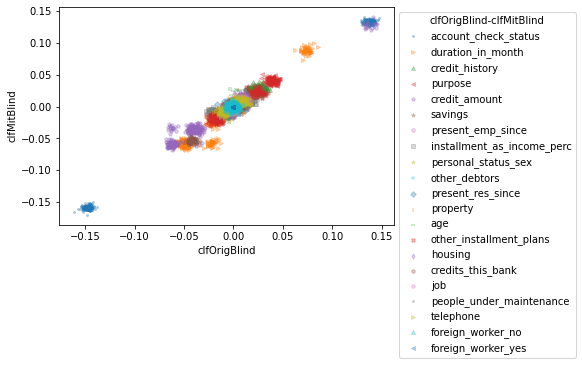

In [93]:
XAIPlots(lime_v,column_names,diffClfs=True)

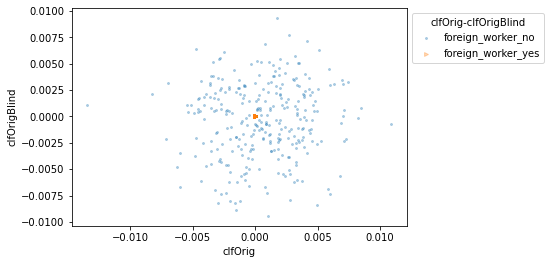

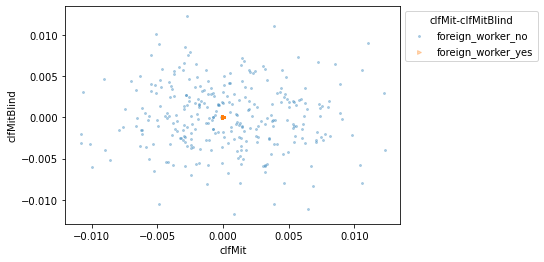

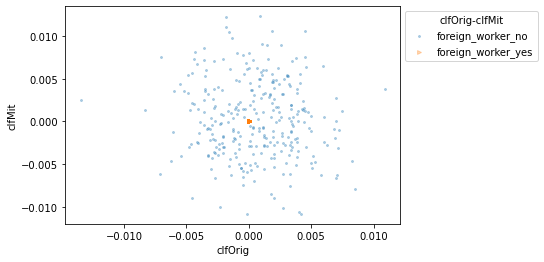

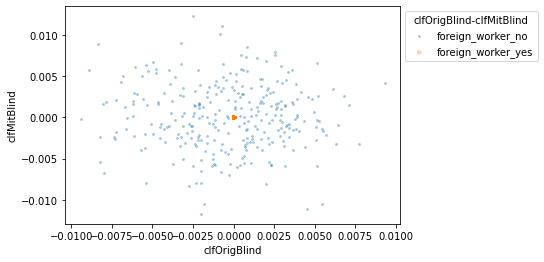

In [94]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [95]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [96]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [32]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [33]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -7.999082           -3.390320   
duration_in_month                     -13.080598          -11.632288   
credit_history                          3.943476            4.095056   
purpose                                 5.664400            5.486719   
credit_amount                         -16.892427          -19.499293   
savings                                -2.333912           -3.860373   
present_emp_since                      -2.112430           -1.780377   
installment_as_income_perc              1.156873            1.576278   
personal_status_sex                     0.858270           -0.191391   
other_debtors                           0.511722            0.505474   
present_res_since                      -1.658044           -0.842875   
property                                0.773656            0.591209   
age                                     5.049733            4.327466   
other_installment_plans                 3.303068            2.587462   
housing                                 2.116085            2.552044   
credits_this_bank                      -0.285878           -0.129785   
job                                     0.741576            0.710982   
people_under_maintenance                1.276997            1.181594   
telephone                               0.004682            0.248604   
foreign_worker_no                      -0.128067           -0.083387   
foreign_worker_yes                     -0.202295           -0.052578   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -5.434347                 -5.955054  
duration_in_month               -11.468810                -13.244076  
credit_history                    4.304213                  3.734320  
purpose                           5.789386                  5.361733  
credit_amount                   -19.066615                -17.325105  
savings                          -3.088178                 -3.106107  
present_emp_since                -1.857703                 -2.035103  
installment_as_income_perc        1.249025                  1.484126  
personal_status_sex               0.458857                  0.208023  
other_debtors                     0.617730                  0.399467  
present_res_since                -1.387552                 -1.113367  
property                          0.922653                  0.442212  
age                               5.048749                  4.328450  
other_installment_plans           3.313661                  2.576869  
housing                           2.619325                  2.048804  
credits_this_bank                -0.206461                 -0.209201  
job                               0.712915                  0.739644  
people_under_maintenance          1.172325                  1.286265  
telephone                         0.058366                  0.194920  
foreign_worker_no                -0.211965                  0.000511  
foreign_worker_yes               -0.254926                  0.000053

In [34]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.008488            0.007784   
duration_in_month                       0.008131            0.008803   
credit_history                          0.004628            0.003679   
purpose                                 0.004148            0.004317   
credit_amount                           0.007229            0.011425   
savings                                 0.004306            0.003413   
present_emp_since                       0.003043            0.002713   
installment_as_income_perc              0.003870            0.003855   
personal_status_sex                     0.002503            0.002657   
other_debtors                           0.000924            0.001088   
present_res_since                       0.002373            0.002470   
property                                0.003461            0.002867   
age                                     0.004281            0.004400   
other_installment_plans                 0.001814            0.002953   
housing                                 0.003595            0.003448   
credits_this_bank                       0.001722            0.001454   
job                                     0.002271            0.002835   
people_under_maintenance                0.000949            0.000999   
telephone                               0.001669            0.002123   
foreign_worker_no                       0.000438            0.000278   
foreign_worker_yes                      0.000686            0.000198   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.013300                  0.008091  
duration_in_month                 0.010590                  0.005883  
credit_history                    0.006966                  0.004280  
purpose                           0.004904                  0.004177  
credit_amount                     0.014238                  0.005423  
savings                           0.006601                  0.005428  
present_emp_since                 0.003080                  0.003089  
installment_as_income_perc        0.003100                  0.004866  
personal_status_sex               0.002773                  0.003240  
other_debtors                     0.001152                  0.000648  
present_res_since                 0.002874                  0.002445  
property                          0.003812                  0.003464  
age                               0.004470                  0.004967  
other_installment_plans           0.003442                  0.002694  
housing                           0.002584                  0.002556  
credits_this_bank                 0.002310                  0.001377  
job                               0.001901                  0.002005  
people_under_maintenance          0.001260                  0.000700  
telephone                         0.001866                  0.002125  
foreign_worker_no                 0.000163                  0.000004  
foreign_worker_yes                0.000515                  0.000005

In [35]:
EValues = computeE(shap_v)
EValues 

{'clfOrig': 0.1382333809659889,
 'clfMit': 0.14876516613153465,
 'clfOrigBlind': 0.14013747341180627,
 'clfMitBlind': 0.14543664062437184}

In [16]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.165               0.068           0.233   
SA-Mean                  0.001               0.000           0.000   
NSA-Sum                  3.672               3.431           3.620   
NSA-Mean                 0.004               0.004           0.005   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      3.463  
NSA-Mean                     0.004

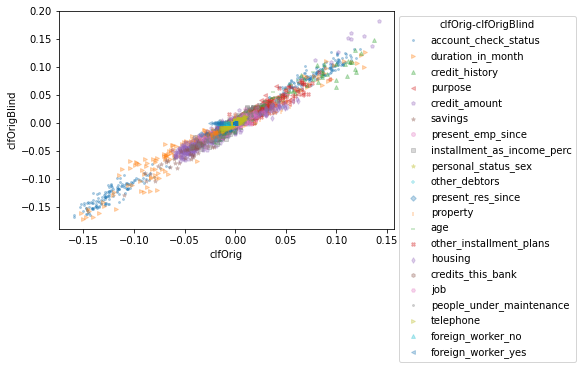

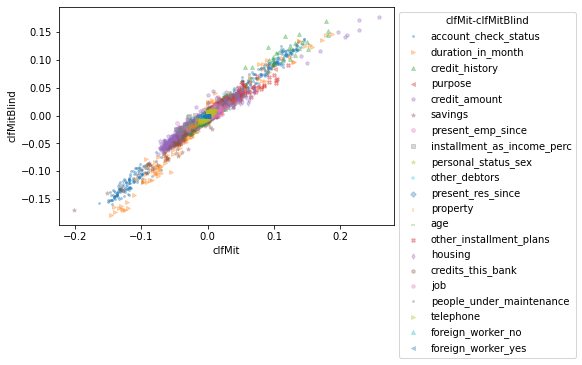

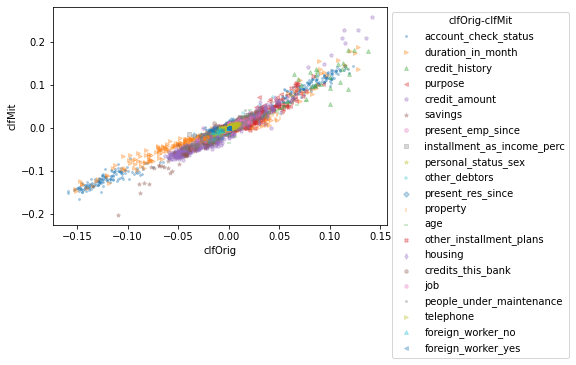

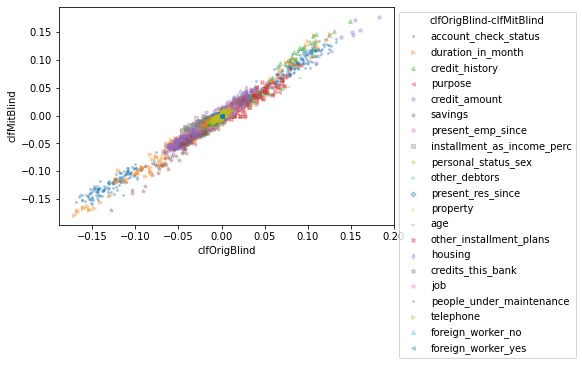

In [101]:
XAIPlots(shap_v,column_names,diffClfs=True)

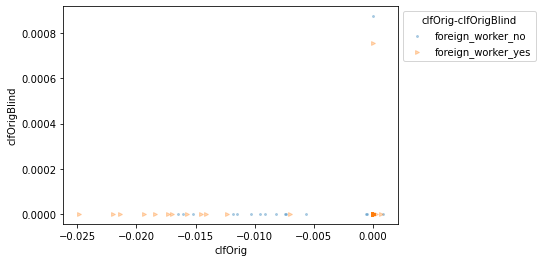

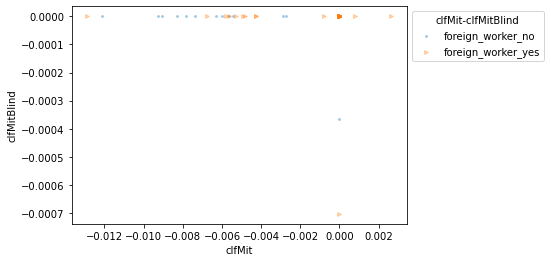

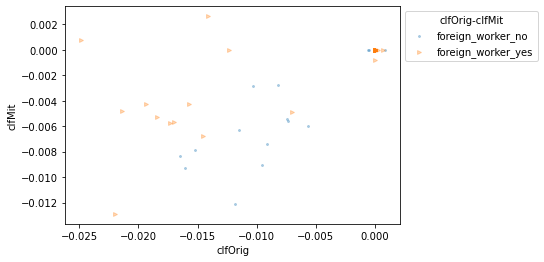

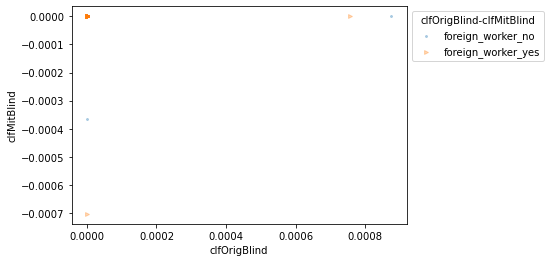

In [102]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [103]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [104]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [36]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [37]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -1.550618           -1.800162   
duration_in_month                      -1.290606           -1.995586   
credit_history                         -0.624472           -0.725799   
purpose                                 0.944271            1.058423   
credit_amount                          -1.190493           -1.508034   
savings                                 0.167439            0.286797   
present_emp_since                       0.321221            0.426340   
installment_as_income_perc             -0.806840           -0.762111   
personal_status_sex                     0.408357            0.198231   
other_debtors                           0.012420           -0.157431   
present_res_since                      -0.215809            0.032790   
property                                0.335544            0.307013   
age                                     1.167339            1.583301   
other_installment_plans                 1.374358            1.453483   
housing                                -0.042790           -0.384238   
credits_this_bank                      -0.174307           -0.053564   
job                                     0.478674            0.490309   
people_under_maintenance                0.027729            0.091528   
telephone                               0.406883            0.642167   
foreign_worker_no                       0.003315           -0.035716   
foreign_worker_yes                      0.041880           -0.040942   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -1.689442                 -1.661338  
duration_in_month                -1.555359                 -1.730833  
credit_history                   -0.447772                 -0.902499  
purpose                           1.025534                  0.977161  
credit_amount                    -1.197664                 -1.500863  
savings                           0.222181                  0.232055  
present_emp_since                 0.451476                  0.296085  
installment_as_income_perc       -0.776006                 -0.792945  
personal_status_sex               0.428516                  0.178071  
other_debtors                    -0.024059                 -0.120953  
present_res_since                -0.209040                  0.026021  
property                          0.329108                  0.313449  
age                               1.277222                  1.473418  
other_installment_plans           1.759689                  1.068152  
housing                          -0.246045                 -0.180983  
credits_this_bank                -0.222544                 -0.005326  
job                               0.660381                  0.308601  
people_under_maintenance          0.062361                  0.056896  
telephone                         0.509649                  0.539401  
foreign_worker_no                -0.032402                  0.000000  
foreign_worker_yes                0.000938                  0.000000

In [38]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.007284            0.006038   
duration_in_month                       0.007347            0.007455   
credit_history                          0.003535            0.003170   
purpose                                 0.004045            0.004463   
credit_amount                           0.005607            0.005797   
savings                                 0.003394            0.003223   
present_emp_since                       0.002796            0.002645   
installment_as_income_perc              0.003866            0.003395   
personal_status_sex                     0.001949            0.001927   
other_debtors                           0.001505            0.001482   
present_res_since                       0.002396            0.002421   
property                                0.003921            0.002905   
age                                     0.004184            0.003769   
other_installment_plans                 0.001963            0.003366   
housing                                 0.004695            0.004069   
credits_this_bank                       0.001672            0.001462   
job                                     0.002629            0.002474   
people_under_maintenance                0.001572            0.001402   
telephone                               0.001470            0.001897   
foreign_worker_no                       0.000992            0.000496   
foreign_worker_yes                      0.001692            0.000343   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.009404                  0.006594  
duration_in_month                 0.008746                  0.005706  
credit_history                    0.005083                  0.004312  
purpose                           0.004957                  0.004100  
credit_amount                     0.007651                  0.005153  
savings                           0.007566                  0.005772  
present_emp_since                 0.002995                  0.002752  
installment_as_income_perc        0.003183                  0.004136  
personal_status_sex               0.002106                  0.002322  
other_debtors                     0.001548                  0.001146  
present_res_since                 0.002398                  0.002230  
property                          0.004730                  0.003318  
age                               0.005558                  0.004955  
other_installment_plans           0.003546                  0.002616  
housing                           0.003477                  0.004019  
credits_this_bank                 0.001574                  0.001642  
job                               0.002075                  0.002222  
people_under_maintenance          0.001668                  0.001250  
telephone                         0.001561                  0.001948  
foreign_worker_no                 0.000534                  0.000000  
foreign_worker_yes                0.001499                  0.000000

In [39]:
EValues = computeE(shap_v)
EValues 

{'clfOrig': 0.13557592657962778,
 'clfMit': 0.14689050937987375,
 'clfOrigBlind': 0.1374520616779643,
 'clfMitBlind': 0.1414467958745199}

In [17]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change_Tree.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.023               0.038           0.017   
SA-Mean                  0.001               0.000           0.001   
NSA-Sum                  0.607               0.735           0.689   
NSA-Mean                 0.003               0.003           0.004   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      0.651  
NSA-Mean                     0.003

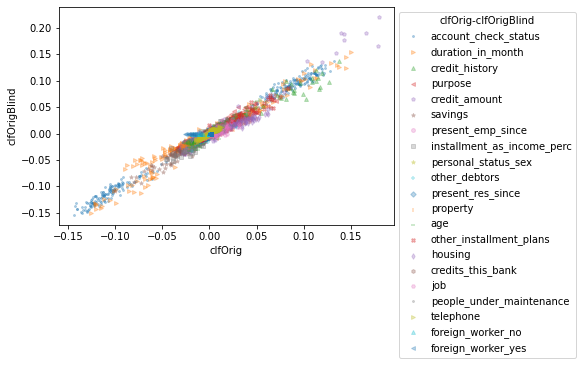

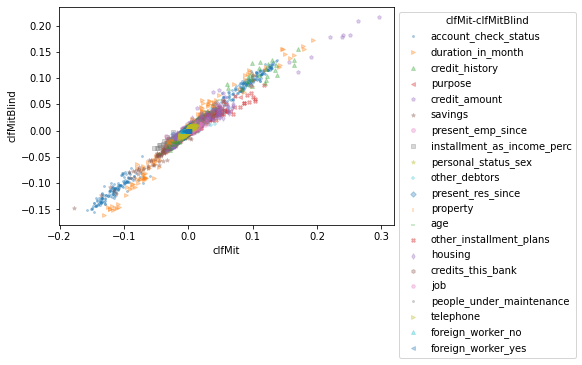

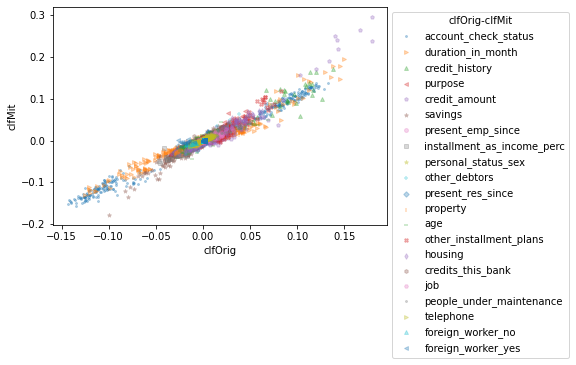

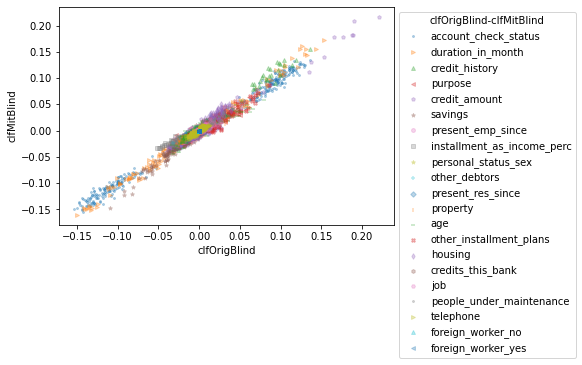

In [109]:
XAIPlots(shap_v,column_names,diffClfs=True)

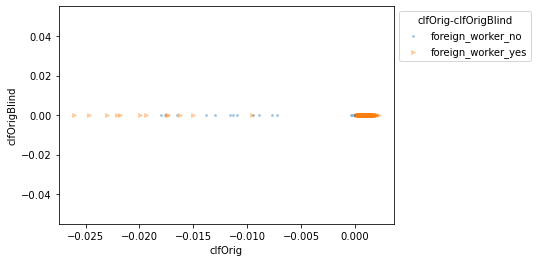

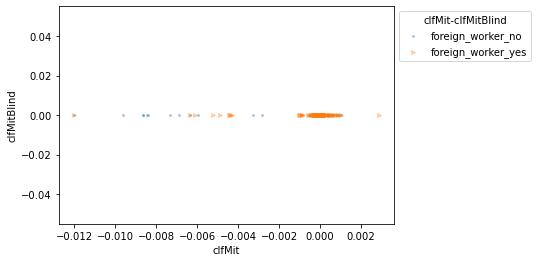

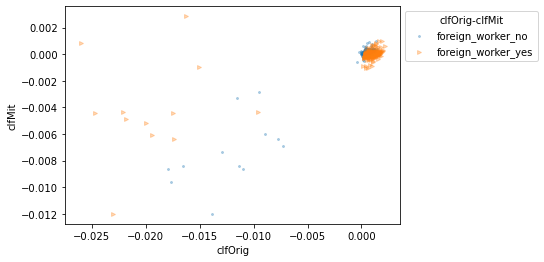

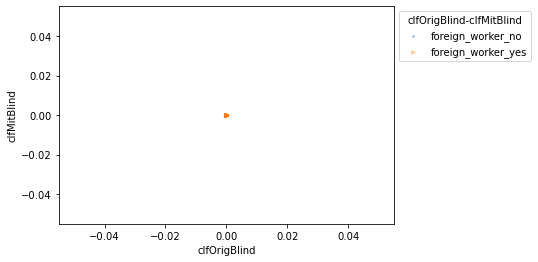

In [110]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [111]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [112]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [40]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [41]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    1.988524           -2.366089   
duration_in_month                     -11.821762          -11.352139   
credit_history                          6.098361            7.498014   
purpose                                 4.860805            5.029548   
credit_amount                         -20.287727          -23.524878   
savings                                 2.446512            2.554677   
present_emp_since                      -0.571456           -0.212991   
installment_as_income_perc              0.131101            0.566896   
personal_status_sex                    -0.198305           -1.081790   
other_debtors                           0.047608            0.510705   
present_res_since                      -0.696124           -0.203494   
property                                1.583963            1.711955   
age                                     3.985647            3.725003   
other_installment_plans                -5.553005           -5.713059   
housing                                -2.262594           -2.457492   
credits_this_bank                      -0.051271           -0.014110   
job                                    -0.735370           -0.905060   
people_under_maintenance               -0.291066           -0.129919   
telephone                               0.431627            1.127863   
foreign_worker_no                       0.038837            0.134659   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -0.098357                 -0.279208  
duration_in_month               -12.478941                -10.694960  
credit_history                    7.070089                  6.526286  
purpose                           4.796048                  5.094304  
credit_amount                   -22.764735                -21.047869  
savings                           2.263048                  2.738141  
present_emp_since                -0.420464                 -0.363983  
installment_as_income_perc        0.279908                  0.418088  
personal_status_sex              -0.554962                 -0.725134  
other_debtors                     0.527024                  0.031289  
present_res_since                -0.496948                 -0.402670  
property                          1.645563                  1.650355  
age                               4.270330                  3.440319  
other_installment_plans          -5.609829                 -5.656234  
housing                          -2.861519                 -1.858567  
credits_this_bank                 0.076203                 -0.141584  
job                              -0.805182                 -0.835248  
people_under_maintenance         -0.164939                 -0.256046  
telephone                         0.475145                  1.084345  
foreign_worker_no                 0.298877                 -0.125381  
foreign_worker_yes                0.000000                  0.000000

In [42]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.010642            0.005306   
duration_in_month                       0.013335            0.010213   
credit_history                          0.004735            0.005445   
purpose                                 0.005348            0.004904   
credit_amount                           0.010866            0.018693   
savings                                 0.006853            0.005291   
present_emp_since                       0.004651            0.005282   
installment_as_income_perc              0.005124            0.005764   
personal_status_sex                     0.004040            0.004743   
other_debtors                           0.004452            0.005191   
present_res_since                       0.004786            0.004645   
property                                0.004419            0.004882   
age                                     0.007188            0.005220   
other_installment_plans                 0.003925            0.005006   
housing                                 0.005614            0.004689   
credits_this_bank                       0.005137            0.005200   
job                                     0.003992            0.005689   
people_under_maintenance                0.004204            0.004659   
telephone                               0.004785            0.004664   
foreign_worker_no                       0.003883            0.005049   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.016004                  0.010283  
duration_in_month                 0.010184                  0.009513  
credit_history                    0.005893                  0.005449  
purpose                           0.004644                  0.004317  
credit_amount                     0.022985                  0.007396  
savings                           0.012232                  0.009405  
present_emp_since                 0.004941                  0.004730  
installment_as_income_perc        0.004848                  0.006505  
personal_status_sex               0.005144                  0.005112  
other_debtors                     0.005054                  0.004476  
present_res_since                 0.004880                  0.004997  
property                          0.004472                  0.004426  
age                               0.005586                  0.006044  
other_installment_plans           0.004483                  0.004085  
housing                           0.004356                  0.004727  
credits_this_bank                 0.005526                  0.004767  
job                               0.004668                  0.004200  
people_under_maintenance          0.004101                  0.003799  
telephone                         0.004793                  0.004909  
foreign_worker_no                 0.004851                  0.004149  
foreign_worker_yes                0.000000                  0.000000

In [43]:
EValues = computeE(lime_v)
EValues 

{'clfOrig': 0.1571573094273073,
 'clfMit': 0.17983454674503424,
 'clfOrigBlind': 0.167638098555326,
 'clfMitBlind': 0.1769044044358752}

In [18]:
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Change.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.019               0.067           0.149   
SA-Mean                  0.002               0.003           0.002   
NSA-Sum                  3.371               3.720           3.561   
NSA-Mean                 0.006               0.006           0.007   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.063  
SA-Mean                      0.002  
NSA-Sum                      3.329  
NSA-Mean                     0.006

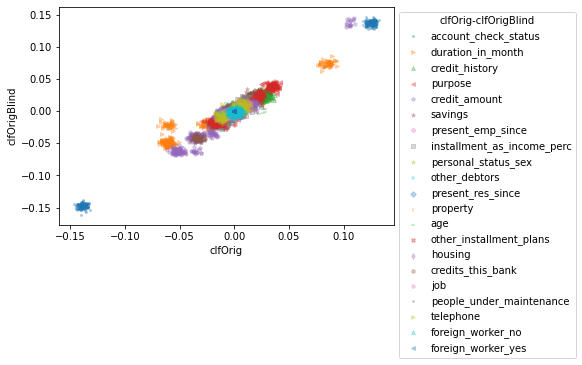

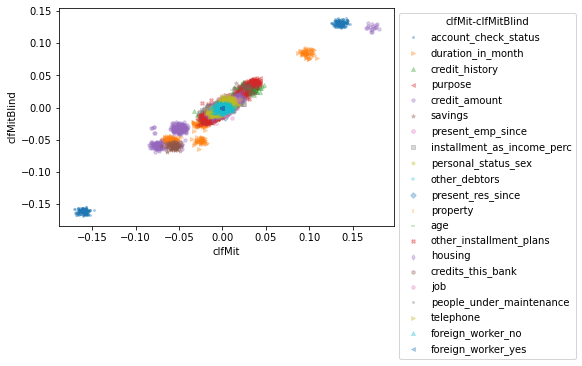

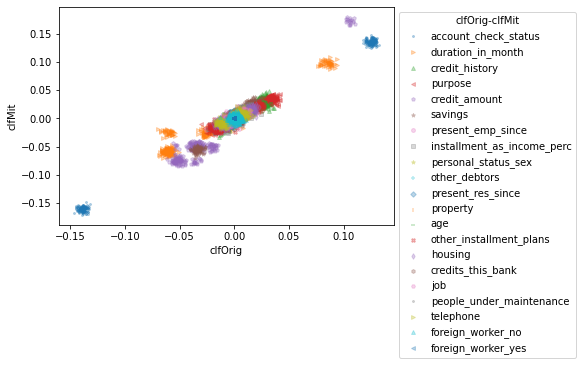

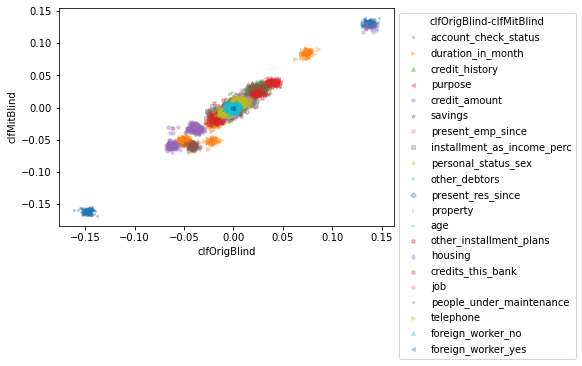

In [117]:
XAIPlots(lime_v,column_names,diffClfs=True)

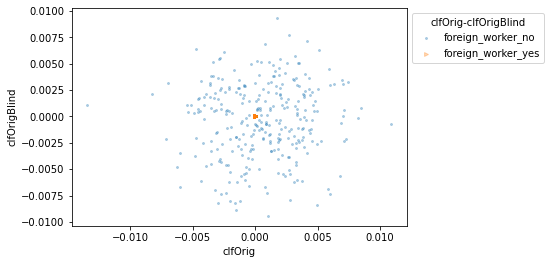

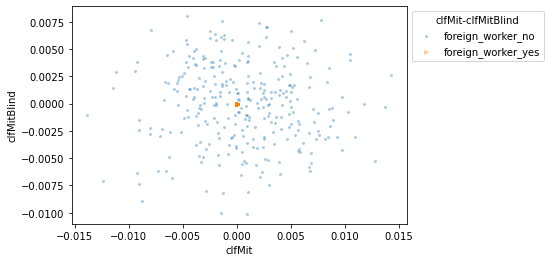

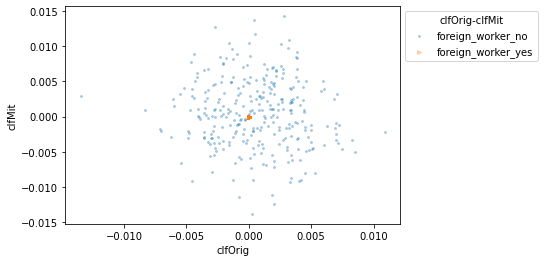

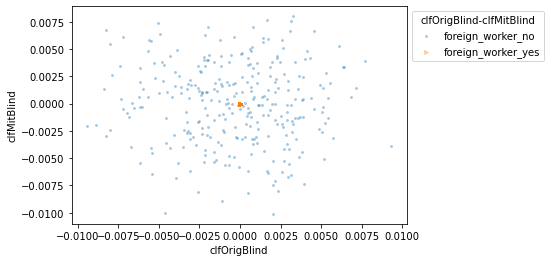

In [118]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [16]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [17]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [18]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -8.576559      -5.380699   
duration_in_month                -13.519060     -10.068388   
credit_history                     4.730549       4.109084   
purpose                            6.506239       5.530277   
credit_amount                    -16.998356     -22.189988   
savings                           -2.380385      -3.638353   
present_emp_since                 -1.808810      -1.739883   
installment_as_income_perc         1.006588       1.399164   
personal_status_sex                0.929321       0.153268   
other_debtors                      0.688447       0.577698   
present_res_since                 -1.912042      -0.996885   
property                           0.859886       0.684026   
age                                5.166409       4.657153   
other_installment_plans            2.992494       2.984311   
housing                            2.844501       3.094654   
credits_this_bank                 -0.275225      -0.125474   
job                                0.851785       0.714507   
people_under_maintenance           1.189736       1.041643   
telephone                         -0.029035       0.197377   
foreign_worker_no                 -0.254942      -0.167599   
foreign_worker_yes                -0.408084      -0.104916   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -7.122542                -6.234861  
duration_in_month                          -12.996502               -12.709148  
credit_history                               3.173245                 4.183018  
purpose                                      5.691639                 5.142929  
credit_amount                              -17.741544               -16.958877  
savings                                     -1.820682                -4.554385  
present_emp_since                           -2.302231                -1.732854  
installment_as_income_perc                   1.394875                 1.593157  
personal_status_sex                          0.717675                -0.317576  
other_debtors                                0.378377                 0.444114  
present_res_since                           -1.301774                -0.783286  
property                                     0.518564                 0.450672  
age                                          4.974524                 3.795016  
other_installment_plans                      3.001511                 1.830717  
housing                                      2.001016                 2.554579  
credits_this_bank                           -0.239403                -0.217195  
job                                          0.641896                 0.558466  
people_under_maintenance                     1.306533                 1.240399  
telephone                                    0.153376                 0.146595  
foreign_worker_no                            0.001979                -0.000364  
foreign_worker_yes                           0.000755                -0.000703

In [19]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.000646       0.010566   
duration_in_month                  0.001706       0.001013   
credit_history                     0.000535       0.000874   
purpose                            0.002323       0.000951   
credit_amount                      0.001939       0.001625   
savings                            0.000989       0.001078   
present_emp_since                  0.000499       0.000629   
installment_as_income_perc         0.000782       0.000499   
personal_status_sex                0.000502       0.000641   
other_debtors                      0.000240       0.000222   
present_res_since                  0.000392       0.000627   
property                           0.000701       0.000607   
age                                0.000418       0.001102   
other_installment_plans            0.001665       0.000720   
housing                            0.001631       0.000828   
credits_this_bank                  0.000364       0.000476   
job                                0.000573       0.000486   
people_under_maintenance           0.000132       0.000259   
telephone                          0.000500       0.000411   
foreign_worker_no                  0.000023       0.000017   
foreign_worker_yes                 0.000022       0.000018   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.000783                 0.005550  
duration_in_month                            0.000555                 0.002205  
credit_history                               0.000369                 0.000626  
purpose                                      0.000629                 0.000403  
credit_amount                                0.001291                 0.001116  
savings                                      0.000771                 0.001363  
present_emp_since                            0.000321                 0.000383  
installment_as_income_perc                   0.000649                 0.000560  
personal_status_sex                          0.000462                 0.000413  
other_debtors                                0.000177                 0.000234  
present_res_since                            0.000420                 0.000372  
property                                     0.000329                 0.000425  
age                                          0.000318                 0.000542  
other_installment_plans                      0.000579                 0.000750  
housing                                      0.000535                 0.001149  
credits_this_bank                            0.000391                 0.000482  
job                                          0.000497                 0.000625  
people_under_maintenance                     0.000093                 0.000073  
telephone                                    0.000395                 0.000617  
foreign_worker_no                            0.000007                 0.000001  
foreign_worker_yes                           0.000003                 0.000002

In [20]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.332          0.136                      0.001   
SA-Mean             0.000          0.000                      0.000   
NSA-Sum             3.856          3.646                      3.551   
NSA-Mean            0.001          0.001                      0.001   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.001  
SA-Mean                     0.000  
NSA-Sum                     3.445  
NSA-Mean                    0.001

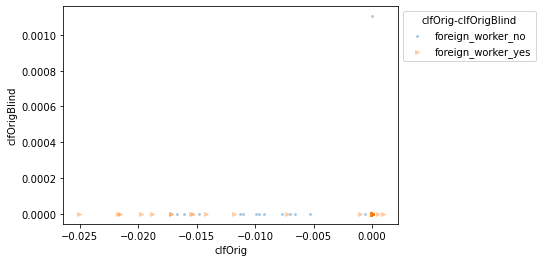

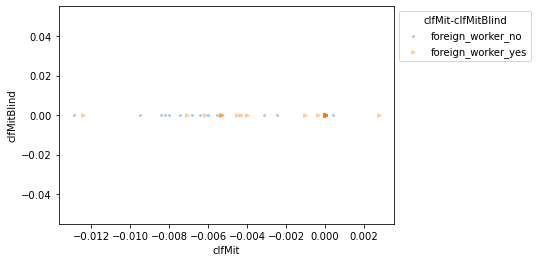

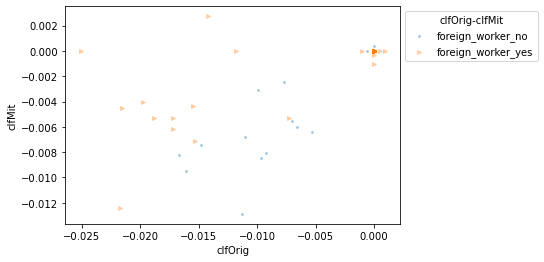

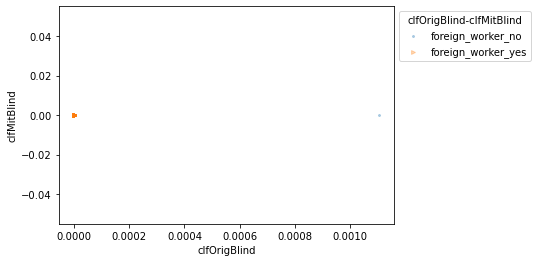

In [21]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [22]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [23]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [24]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -1.437498      -1.941385   
duration_in_month                 -1.432442      -1.678277   
credit_history                    -0.353707      -0.541837   
purpose                            0.888453       1.162615   
credit_amount                     -0.976589      -1.418738   
savings                            0.198247       0.246114   
present_emp_since                  0.326180       0.576772   
installment_as_income_perc        -0.615139      -0.936872   
personal_status_sex                0.577070       0.279963   
other_debtors                      0.027953      -0.076070   
present_res_since                 -0.351804      -0.066276   
property                           0.273902       0.384314   
age                                0.879607       1.674838   
other_installment_plans            1.605566       1.913813   
housing                            0.020598      -0.512688   
credits_this_bank                 -0.373033      -0.072055   
job                                0.780526       0.540237   
people_under_maintenance           0.094507       0.030215   
telephone                          0.396702       0.622596   
foreign_worker_no                  0.006630      -0.071433   
foreign_worker_yes                 0.083760      -0.081884   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -1.663738                -1.658938  
duration_in_month                           -1.148770                -2.312896  
credit_history                              -0.895236                -0.909761  
purpose                                      1.000089                 0.954232  
credit_amount                               -1.404397                -1.597329  
savings                                      0.136631                 0.327479  
present_emp_since                            0.316263                 0.275908  
installment_as_income_perc                  -0.998541                -0.587349  
personal_status_sex                          0.239644                 0.116498  
other_debtors                               -0.003113                -0.238792  
present_res_since                           -0.079814                 0.131856  
property                                     0.397186                 0.229711  
age                                          1.455072                 1.491764  
other_installment_plans                      1.143150                 0.993154  
housing                                     -0.106177                -0.255788  
credits_this_bank                            0.024420                -0.035073  
job                                          0.176822                 0.440380  
people_under_maintenance                    -0.039048                 0.152841  
telephone                                    0.417064                 0.661738  
foreign_worker_no                            0.000000                 0.000000  
foreign_worker_yes                           0.000000                 0.000000

In [25]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status                    0.0            0.0   
duration_in_month                       0.0            0.0   
credit_history                          0.0            0.0   
purpose                                 0.0            0.0   
credit_amount                           0.0            0.0   
savings                                 0.0            0.0   
present_emp_since                       0.0            0.0   
installment_as_income_perc              0.0            0.0   
personal_status_sex                     0.0            0.0   
other_debtors                           0.0            0.0   
present_res_since                       0.0            0.0   
property                                0.0            0.0   
age                                     0.0            0.0   
other_installment_plans                 0.0            0.0   
housing                                 0.0            0.0   
credits_this_bank                       0.0            0.0   
job                                     0.0            0.0   
people_under_maintenance                0.0            0.0   
telephone                               0.0            0.0   
foreign_worker_no                       0.0            0.0   
foreign_worker_yes                      0.0            0.0   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                              0.0                      0.0  
duration_in_month                                 0.0                      0.0  
credit_history                                    0.0                      0.0  
purpose                                           0.0                      0.0  
credit_amount                                     0.0                      0.0  
savings                                           0.0                      0.0  
present_emp_since                                 0.0                      0.0  
installment_as_income_perc                        0.0                      0.0  
personal_status_sex                               0.0                      0.0  
other_debtors                                     0.0                      0.0  
present_res_since                                 0.0                      0.0  
property                                          0.0                      0.0  
age                                               0.0                      0.0  
other_installment_plans                           0.0                      0.0  
housing                                           0.0                      0.0  
credits_this_bank                                 0.0                      0.0  
job                                               0.0                      0.0  
people_under_maintenance                          0.0                      0.0  
telephone                                         0.0                      0.0  
foreign_worker_no                                 0.0                      0.0  
foreign_worker_yes                                0.0                      0.0

In [26]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.045          0.077                      0.000   
SA-Mean             0.000          0.000                      0.000   
NSA-Sum             0.611          0.772                      0.613   
NSA-Mean            0.000          0.000                      0.000   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.000  
SA-Mean                     0.000  
NSA-Sum                     0.704  
NSA-Mean                    0.000

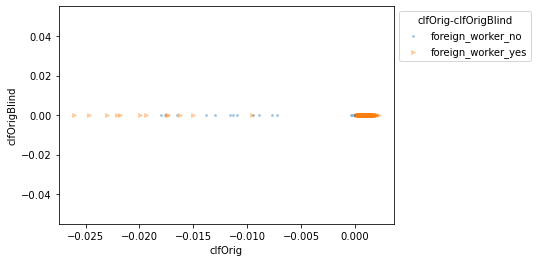

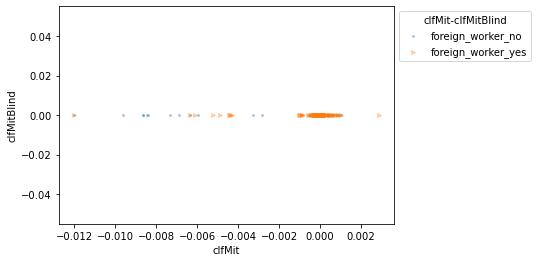

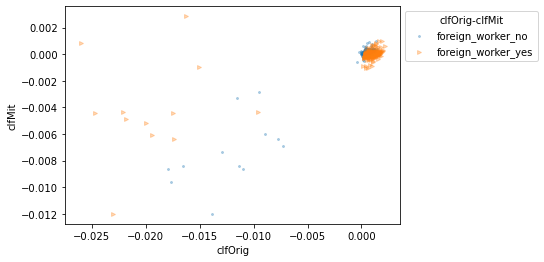

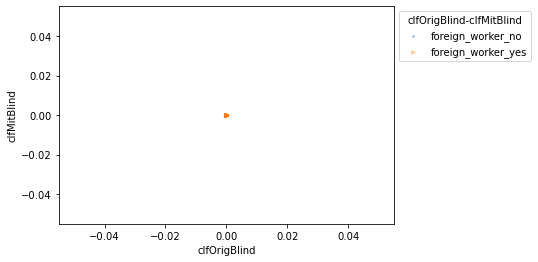

In [27]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [28]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [29]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [30]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               1.240054       1.631708   
duration_in_month                -14.394134     -11.665410   
credit_history                     6.839240       6.564770   
purpose                            4.894924       4.872797   
credit_amount                    -18.222492     -28.696128   
savings                            1.979953       2.387473   
present_emp_since                 -0.555709      -0.511392   
installment_as_income_perc         0.172658       0.078654   
personal_status_sex               -0.401495      -0.560044   
other_debtors                     -0.013529       1.026769   
present_res_since                 -0.734974      -0.226589   
property                           1.814931       1.471006   
age                                4.970347       4.268698   
other_installment_plans           -5.360513      -6.359789   
housing                           -2.849908      -2.891593   
credits_this_bank                  0.076828       0.133273   
job                               -0.804795      -0.975284   
people_under_maintenance          -0.184650      -0.202535   
telephone                          0.027729       0.802031   
foreign_worker_no                  0.306869       0.226371   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         2.736993                -2.575424  
duration_in_month                           -9.249390               -12.857124  
credit_history                               5.357482                 7.089240  
purpose                                      4.826685                 5.293225  
credit_amount                              -22.352961               -20.006513  
savings                                      2.913071                 2.436817  
present_emp_since                           -0.587203                -0.382086  
installment_as_income_perc                   0.089544                 0.593087  
personal_status_sex                          0.004885                -1.346360  
other_debtors                                0.108745                -0.102955  
present_res_since                           -0.657274                -0.021316  
property                                     1.352995                 1.858490  
age                                          3.000947                 4.035154  
other_installment_plans                     -5.745496                -5.772450  
housing                                     -1.675281                -2.010516  
credits_this_bank                           -0.179371                -0.103181  
job                                         -0.665945                -0.911697  
people_under_maintenance                    -0.397483                -0.319573  
telephone                                    0.835525                 1.145234  
foreign_worker_no                           -0.229196                 0.013528  
foreign_worker_yes                           0.000000                 0.000000

In [31]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status                    0.0       0.010369   
duration_in_month                       0.0       0.009518   
credit_history                          0.0       0.005986   
purpose                                 0.0       0.005625   
credit_amount                           0.0       0.007133   
savings                                 0.0       0.005982   
present_emp_since                       0.0       0.005163   
installment_as_income_perc              0.0       0.004731   
personal_status_sex                     0.0       0.004750   
other_debtors                           0.0       0.004191   
present_res_since                       0.0       0.004571   
property                                0.0       0.004485   
age                                     0.0       0.006187   
other_installment_plans                 0.0       0.005593   
housing                                 0.0       0.004043   
credits_this_bank                       0.0       0.004639   
job                                     0.0       0.004778   
people_under_maintenance                0.0       0.004174   
telephone                               0.0       0.004776   
foreign_worker_no                       0.0       0.004584   
foreign_worker_yes                      0.0       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                              0.0                 0.003972  
duration_in_month                                 0.0                 0.005914  
credit_history                                    0.0                 0.004987  
purpose                                           0.0                 0.004449  
credit_amount                                     0.0                 0.005719  
savings                                           0.0                 0.005536  
present_emp_since                                 0.0                 0.005040  
installment_as_income_perc                        0.0                 0.004783  
personal_status_sex                               0.0                 0.004611  
other_debtors                                     0.0                 0.004511  
present_res_since                                 0.0                 0.004616  
property                                          0.0                 0.004235  
age                                               0.0                 0.004804  
other_installment_plans                           0.0                 0.004565  
housing                                           0.0                 0.004116  
credits_this_bank                                 0.0                 0.004276  
job                                               0.0                 0.004567  
people_under_maintenance                          0.0                 0.004068  
telephone                                         0.0                 0.004273  
foreign_worker_no                                 0.0                 0.004265  
foreign_worker_yes                                0.0                 0.000000

In [32]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.153          0.113                      0.115   
SA-Mean             0.000          0.002                      0.000   
NSA-Sum             3.449          3.965                      3.302   
NSA-Mean            0.000          0.006                      0.000   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.007  
SA-Mean                     0.002  
NSA-Sum                     3.624  
NSA-Mean                    0.005

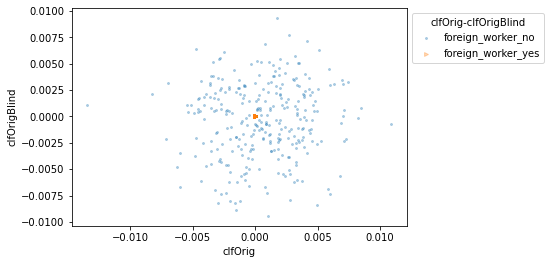

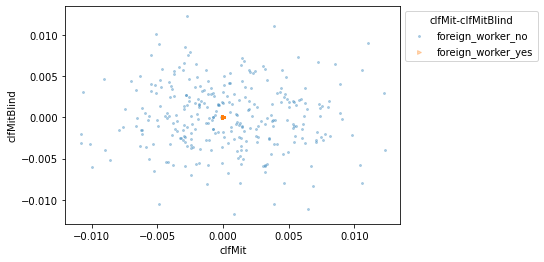

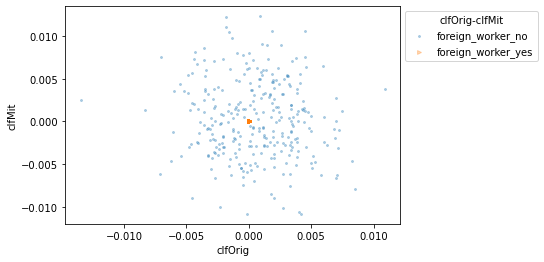

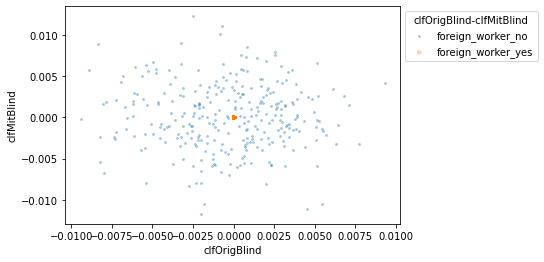

In [33]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

## Preferential Sampling

In [2]:
filename = 'german_credit.csv'
path_res = '/Users/Marta/FAccT/Res-GERMAN/'
path_data = 'datasets/'
sensitive = ['foreign_worker'] #OR personal_status_sex
discrete,df = prepare_german_dataset(filename, path_data, sensitive)
discrete

['people_under_maintenance',
 'credit_history',
 'housing',
 'purpose',
 'property',
 'personal_status_sex',
 'savings',
 'telephone',
 'other_installment_plans',
 'account_check_status',
 'job',
 'installment_as_income_perc',
 'present_emp_since',
 'present_res_since',
 'credits_this_bank',
 'other_debtors']

In [3]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['Good','Bad']
#There are two classes, 1 for good customers and 2 for bad customers
#in LORE 0 sta per 1 e 1 sta per 2, quindi 0 è good e 1 è bad  
adClass=0
disClass=1
protected = ['foreign_worker_no','foreign_worker_yes']
protected_feature='foreigners' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr=None
disAttr=None

In [4]:
discrete.append('foreign_worker_no')
discrete.append('foreign_worker_yes')
discrete.append('target')
df_Discrete = df.loc[:, df.columns.isin(discrete)]
df_Discrete

target  account_check_status  credit_history  purpose  savings  \
0         0                     1               1        4        4   
1         1                     0               3        4        1   
2         0                     3               1        0        1   
3         0                     1               3        7        1   
4         1                     1               2        2        1   
..      ...                   ...             ...      ...      ...   
995       0                     3               3        7        1   
996       0                     1               3        3        1   
997       0                     3               3        4        1   
998       1                     1               3        4        1   
999       0                     0               1        3        2   

     present_emp_since  installment_as_income_perc  personal_status_sex  \
0                    0                           3                    3   
1                    2                           1                    0   
2                    3                           1                    3   
3                    3                           1                    3   
4                    2                           2                    3   
..                 ...                         ...                  ...   
995                  3                           2                    0   
996                  2                           3                    1   
997                  0                           3                    3   
998                  2                           3                    3   
999                  4                           2                    3   

     other_debtors  present_res_since  property  other_installment_plans  \
0                2                  3         2                        1   
1                2                  1         2                        1   
2                2                  2         2                        1   
3                1                  3         0                        1   
4                2                  3         3                        1   
..             ...                ...       ...                      ...   
995              2                  3         2                        1   
996              2                  3         0                        1   
997              2                  3         1                        1   
998              2                  3         3                        1   
999              2                  3         1                        1   

     housing  credits_this_bank  job  people_under_maintenance  telephone  \
0          1                  1    1                         0          1   
1          1                  0    1                         0          0   
2          1                  0    3                         1          0   
3          0                  0    1                         1          0   
4          0                  1    1                         1          0   
..       ...                ...  ...                       ...        ...   
995        1                  0    3                         0          0   
996        1                  0    0                         0          1   
997        1                  0    1                         0          0   
998        0                  0    1                         0          1   
999        1                  0    1                         0          0   

     foreign_worker_no  foreign_worker_yes  
0                    0                   1  
1                    0                   1  
2                    0                   1  
3                    0                   1  
4                    0                   1  
..                 ...                 ...  
995                  0                   1  
996                  0                   1  
997     

In [5]:
from sklearn.preprocessing import StandardScaler

df_ToScale = df.loc[:, ~df.columns.isin(discrete)]
df_ToScale

scaler = StandardScaler()

df_ToScale = scaler.fit_transform(df_ToScale)
df_ToScale = pd.DataFrame(df_ToScale)
df_ToScale.columns = range(0, df_ToScale.columns.size)
df_ToScale.columns = ['duration_in_month','credit_amount','age']
df_ToScale

duration_in_month  credit_amount       age
0            -1.236478      -0.745131  2.766456
1             2.248194       0.949817 -1.191404
2            -0.738668      -0.416562  1.183312
3             1.750384       1.634247  0.831502
4             0.256953       0.566664  1.535122
..                 ...            ...       ...
995          -0.738668      -0.544162 -0.399832
996           0.754763       0.207612  0.391740
997          -0.738668      -0.874503  0.215835
998           1.999289      -0.505528 -1.103451
999           1.999289       0.462457 -0.751642

[1000 rows x 3 columns]

In [6]:
df = pd.concat([df_ToScale.reset_index(drop=True), df_Discrete.reset_index(drop=True)], axis= 1)
df

duration_in_month  credit_amount       age  target  account_check_status  \
0            -1.236478      -0.745131  2.766456       0                     1   
1             2.248194       0.949817 -1.191404       1                     0   
2            -0.738668      -0.416562  1.183312       0                     3   
3             1.750384       1.634247  0.831502       0                     1   
4             0.256953       0.566664  1.535122       1                     1   
..                 ...            ...       ...     ...                   ...   
995          -0.738668      -0.544162 -0.399832       0                     3   
996           0.754763       0.207612  0.391740       0                     1   
997          -0.738668      -0.874503  0.215835       0                     3   
998           1.999289      -0.505528 -1.103451       1                     1   
999           1.999289       0.462457 -0.751642       0                     0   

     credit_history  purpose  savings  present_emp_since  \
0                 1        4        4                  0   
1                 3        4        1                  2   
2                 1        0        1                  3   
3                 3        7        1                  3   
4                 2        2        1                  2   
..              ...      ...      ...                ...   
995               3        7        1                  3   
996               3        3        1                  2   
997               3        4        1                  0   
998               3        4        1                  2   
999               1        3        2                  4   

     installment_as_income_perc  ...  present_res_since  property  \
0                             3  ...                  3         2   
1                             1  ...                  1         2   
2                             1  ...                  2         2   
3                             1  ...                  3         0   
4                             2  ...                  3         3   
..                          ...  ...                ...       ...   
995                           2  ...                  3         2   
996                           3  ...                  3         0   
997                           3  ...                  3         1   
998                           3  ...                  3         3   
999                           2  ...                  3         1   

     other_installment_plans  housing  credits_this_bank  job  \
0                          1        1                  1    1   
1                          1        1                  0    1   
2                          1        1                  0    3   
3                          1        0                  0    1   
4                          1        0                  1    1   
..                       ...      ...                ...  ...   
995                        1        1                  0    3   
996                        1        1                  0    0   
997                        1        1                  0    1   
998                        1        0                  0    1   
999                        1        1                  0    1   

     people_under_maintenance  telephone  foreign_worker_no  \
0                           0          1                  0   
1                           0          0                  0   
2                           1          0                  0   
3                           1          0                  0   
4                           1          0                  0   
..                        ...        ...                ...   
995                         0          0                  0   
996                         0          1                  0   
997                         0          0                  0   
998                         0          1                  0   
999     

In [7]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [8]:
findFreq(target,protected,df)

({'foreign_worker_no': 22, 'foreign_worker_yes': 464},
 {'foreign_worker_no': 3, 'foreign_worker_yes': 211})

In [9]:
ranker = rankers(X,X_blind,Y)

Non-Blind Rankers
GaussianNB(var_smoothing=0.03511191734215131)
LogisticRegression(C=0.012742749857031334, solver='liblinear')
RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
                       n_estimators=500)


The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=1, gamma=0.1, probability=True)
Non-Blind Rankers Evaluation
           Gaussian Naive Bayes  Calibrated Gaussian Naive Bayes  \
Accuracy               0.726000                         0.721000   
Precision              0.580118                         0.574799   
Recall                 0.336667                         0.263333   
F1 Score               0.423325                         0.357628   

           Logistic Regression  Calibrated Logistic Regression  Random Forest  \
Accuracy              0.735000                        0.735000       0.739000   
Precision             0.680163                        0.628517       0.650860   
Recall                0.233333                        0.293333       0.293333   
F1 Score              0.343705                        0.397795       0.400071   

           Calibrated Random Forest  Support Vector Classifier  \
Accuracy                   0.757000                   0.737000   
Precision                  0.659403                   

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=1, gamma=0.1, probability=True)
Blind Rankers Evaluation
           Blind Gaussian Naive Bayes  Blind Calibrated Gaussian Naive Bayes  \
Accuracy                     0.722000                               0.723000   
Precision                    0.576776                               0.583762   
Recall                       0.290000                               0.256667   
F1 Score                     0.383007                               0.353805   

           Blind Logistic Regression  Blind Calibrated Logistic Regression  \
Accuracy                    0.733000                              0.734000   
Precision                   0.671830                              0.626055   
Recall                      0.230000                              0.290000   
F1 Score                    0.338943                              0.394074   

           Blind Random Forest  Blind Calibrated Random Forest  \
Accuracy              0.740000                        0.751000   
Precision    

In [10]:

PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(ranker, f)

In [11]:
PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "rb") as f:
  ranker = pickle.load(f)

In [12]:
df_new=PreferentialSampling(target,protected,ranker,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'foreign_worker_no': 22, 'foreign_worker_yes': 464}
Counting labels = 1  {'foreign_worker_no': 3, 'foreign_worker_yes': 211}
DN  ('foreign_worker_yes', 211)
FP  ('foreign_worker_no', 22)
DP  ('foreign_worker_yes', 464)
FN  ('foreign_worker_no', 3)
Len DN_df  211
Len FP_df  22
Len DP_df  464
Len FN_df  3


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Len restData 0
DN_expected  206
5 to be removed
Len DN_df after sampling  206
FP_expected  17
5 to be removed
Len FP_df after sampling  17
DP_expected  469
5 to add
Len DP_df after sampling  469
FN_expected  8
5 to add
Len FN_df after sampling  8


In [13]:
findFreq(target,protected,df_new)

({'foreign_worker_no': 17, 'foreign_worker_yes': 469},
 {'foreign_worker_no': 8, 'foreign_worker_yes': 206})

In [17]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,True)

### MLP

In [18]:

clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [19]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_MLP_Performances.csv')
res

Original Train Dimension = 700
Mitigated Train Dimension = 700
Test Dimension = 300


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

---> CLF Original: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 228 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 231 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 227 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 224 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.740000            0.740000       0.756667   
Precision           0.623590            0.574545       0.661081   
Recall              0.303922            0.337255       0.335948   
F1 Score            0.394220            0.424007       0.426708   
Discrimination      0.208333            0.211806       0.197917   

                CLF Mitigated Blind          Best Score  Delta O-OB  \
Accuracy                   0.730000       CLF Mitigated    0.000000   
Precision                  0.568883       CLF Mitigated    0.049044   
Recall                     0.301307  CLF Original Blind    0.033333   
F1 Score                   0.390408       CLF Mitigated    0.029787   
Discrimination             0.222222       CLF Mitigated    0.003472   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.026667   0.016667     0.010000  
Precision         0.092198   0.037491     0.005663  
Recall            0.034641   0.032026     0.035948  
F1 Score          0.036300   0.032488     0.033599  
Discrimination    0.024306   0.010417     0.010417

In [27]:

PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [28]:
PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [29]:
res = pd.read_csv(path_res+'PS_MLP_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'PS_MLP_Performances.csv')
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy               0.740               0.740          0.757   
Precision              0.624               0.575          0.661   
Recall                 0.304               0.337          0.336   
F1 Score               0.394               0.424          0.427   
Discrimination         0.208               0.212          0.198   

                CLF Mitigated Blind          Best Score  Delta O-OB  \
Accuracy                      0.730       CLF Mitigated       0.000   
Precision                     0.569       CLF Mitigated       0.049   
Recall                        0.301  CLF Original Blind       0.033   
F1 Score                      0.390       CLF Mitigated       0.030   
Discrimination                0.222       CLF Mitigated       0.003   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy             0.027      0.017        0.010  
Precision            0.092      0.037        0.006  
Recall               0.035      0.032        0.036  
F1 Score             0.036      0.032        0.034  
Discrimination       0.024      0.010        0.010

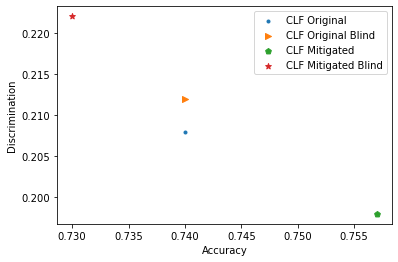

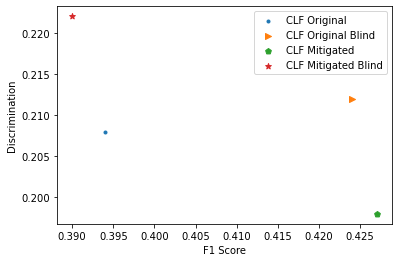

In [30]:
plotDisc(res)

In [31]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 12 instances.
    * "('foreign_worker_yes',)" grouping has 288 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 11 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 203 data points.
        - The class *Bad* has 85 data points.


In [32]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
    *  NOT  satisfied for "('foreign_worker_no',)" and "('foreign_worker_yes',)" sub-populations.
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-b

{'Equal Accuracy': {'Delta O-OB': ["'foreign_worker_no' 'foreign_worker_yes' "],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': ["'foreign_worker_no' 'foreign_worker_yes' "]},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


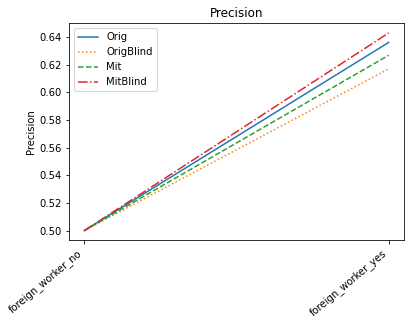

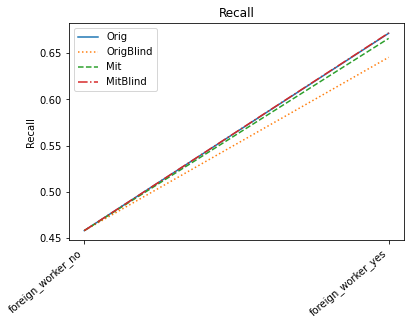

In [33]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [34]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [35]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [44]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [45]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -5.083469           -3.986310   
duration_in_month                      -6.392243           -6.587794   
credit_history                          0.942401            2.229515   
purpose                                -3.010402           -5.809870   
credit_amount                           2.577727            1.325518   
savings                                 1.390155            0.955103   
present_emp_since                       3.566613            4.279882   
installment_as_income_perc              0.285220            0.411947   
personal_status_sex                     1.274020            1.616831   
other_debtors                          -0.559470           -0.285390   
present_res_since                      -0.144067            0.232647   
property                                0.288759           -0.353928   
age                                     0.656769            0.465530   
other_installment_plans                -0.121182            0.417201   
housing                                 0.513013            0.710171   
credits_this_bank                      -0.219518           -0.108470   
job                                     0.369995           -0.212762   
people_under_maintenance                0.002882            0.020109   
telephone                               0.832901            1.339343   
foreign_worker_no                      -0.049151           -0.156618   
foreign_worker_yes                     -0.027749            0.009948   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -4.391940                 -4.677839  
duration_in_month                -5.130207                 -7.849831  
credit_history                    1.913291                  1.258626  
purpose                          -5.736067                 -3.084205  
credit_amount                     1.643768                  2.259477  
savings                           0.921220                  1.424038  
present_emp_since                 3.848277                  3.998219  
installment_as_income_perc        0.334977                  0.362190  
personal_status_sex               0.712032                  2.178819  
other_debtors                    -1.279826                  0.434966  
present_res_since                 0.271690                 -0.183109  
property                          0.113611                 -0.178781  
age                               0.578911                  0.543388  
other_installment_plans          -0.163760                  0.459778  
housing                           0.605303                  0.617881  
credits_this_bank                -0.182692                 -0.145296  
job                               0.053057                  0.104176  
people_under_maintenance          0.158050                 -0.135060  
telephone                         0.081968                  2.090277  
foreign_worker_no                -0.206160                  0.000391  
foreign_worker_yes               -0.017801                  0.000000

In [46]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.019392            0.022597   
duration_in_month                       0.028666            0.008140   
credit_history                          0.004225            0.005960   
purpose                                 0.020639            0.012768   
credit_amount                           0.009341            0.027141   
savings                                 0.012835            0.018319   
present_emp_since                       0.015134            0.011323   
installment_as_income_perc              0.012340            0.008410   
personal_status_sex                     0.012553            0.014170   
other_debtors                           0.009894            0.008544   
present_res_since                       0.003112            0.004514   
property                                0.010333            0.007336   
age                                     0.004804            0.006004   
other_installment_plans                 0.009869            0.002318   
housing                                 0.002768            0.003995   
credits_this_bank                       0.004528            0.024715   
job                                     0.012940            0.005027   
people_under_maintenance                0.006970            0.006003   
telephone                               0.006406            0.025074   
foreign_worker_no                       0.000225            0.001840   
foreign_worker_yes                      0.000158            0.000037   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.028332                  0.013830  
duration_in_month                 0.016988                  0.017161  
credit_history                    0.008524                  0.011125  
purpose                           0.020469                  0.015375  
credit_amount                     0.024462                  0.011821  
savings                           0.015478                  0.014199  
present_emp_since                 0.012893                  0.011442  
installment_as_income_perc        0.009659                  0.010137  
personal_status_sex               0.006289                  0.006933  
other_debtors                     0.012650                  0.009183  
present_res_since                 0.001478                  0.008574  
property                          0.022924                  0.008717  
age                               0.005063                  0.007963  
other_installment_plans           0.009332                  0.002154  
housing                           0.007434                  0.009243  
credits_this_bank                 0.005989                  0.023182  
job                               0.005569                  0.013907  
people_under_maintenance          0.006495                  0.006479  
telephone                         0.014714                  0.016615  
foreign_worker_no                 0.001649                  0.000001  
foreign_worker_yes                0.000195                  0.000000

In [47]:
EValues = computeE(shap_v)
EValues 

{'clfOrig': 0.17123302030942217,
 'clfMit': 0.1659573150159303,
 'clfOrigBlind': 0.17119983488893756,
 'clfMitBlind': 0.1821579067985818}

In [39]:
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Fix.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.000               0.018           0.017   
SA-Mean                  0.000               0.000           0.000   
NSA-Sum                  0.004               1.015           1.059   
NSA-Mean                 0.000               0.008           0.008   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      0.079  
NSA-Mean                     0.001

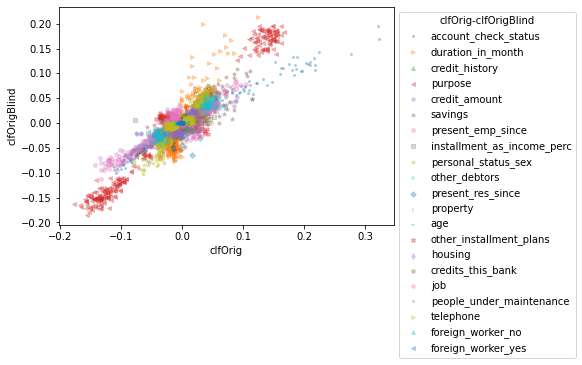

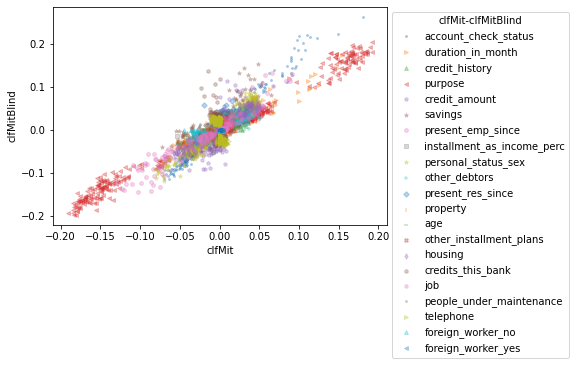

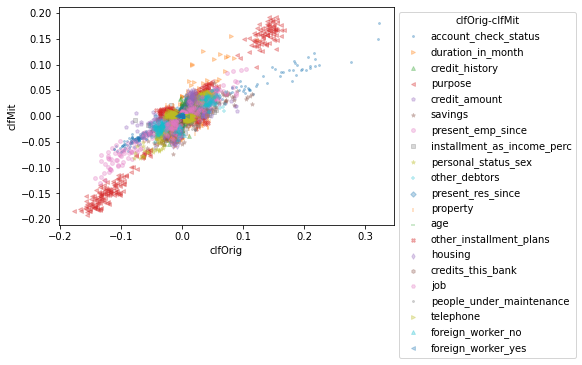

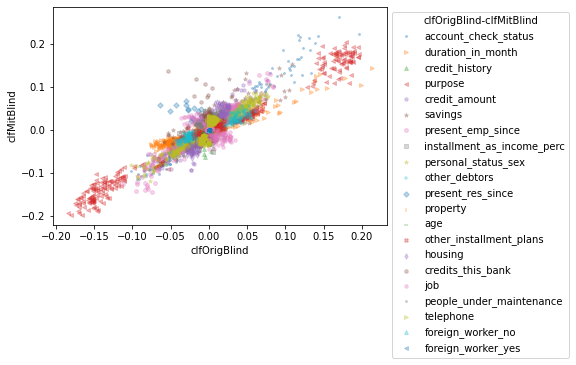

In [40]:
XAIPlots(shap_v,column_names,diffClfs=True)

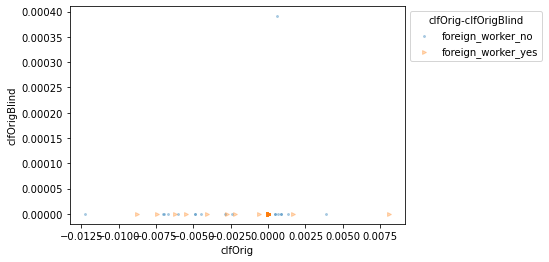

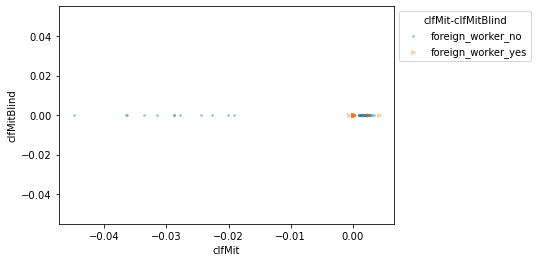

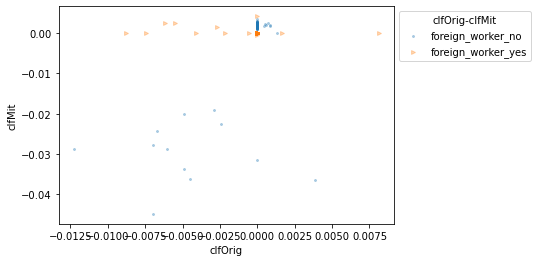

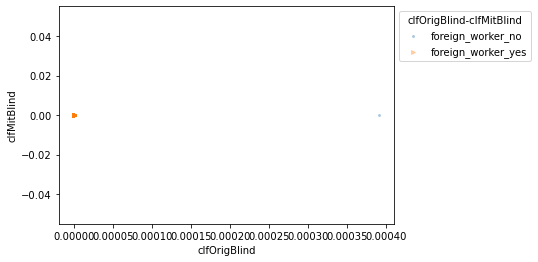

In [41]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [42]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [43]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [48]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [49]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -6.215748           -5.355776   
duration_in_month                      -4.179255           -4.391791   
credit_history                          0.616810            3.294948   
purpose                                -5.872180           -6.094706   
credit_amount                           2.114192            2.743880   
savings                                -0.066000           -3.740480   
present_emp_since                      13.958457           11.592279   
installment_as_income_perc             -0.713459           -0.611420   
personal_status_sex                    -3.430182           -2.139457   
other_debtors                           0.056739           -2.713278   
present_res_since                       2.666943           -4.170188   
property                                1.902063            0.026185   
age                                    -0.097303            0.220975   
other_installment_plans                 0.268931           -0.710662   
housing                                -2.903618           -5.432768   
credits_this_bank                      -0.108281           -0.532999   
job                                     0.208852            0.738660   
people_under_maintenance               -0.166121            0.186832   
telephone                               1.577805            1.877837   
foreign_worker_no                       0.283443            1.231077   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -6.284851                 -5.286673  
duration_in_month                -4.275818                 -4.295228  
credit_history                    2.065681                  1.846077  
purpose                          -6.072445                 -5.894442  
credit_amount                     0.556527                  4.301545  
savings                           0.349318                 -4.155798  
present_emp_since                11.369429                 14.181307  
installment_as_income_perc       -0.906575                 -0.418305  
personal_status_sex              -2.328318                 -3.241322  
other_debtors                    -1.907348                 -0.749191  
present_res_since                -0.905586                 -0.597659  
property                          1.050189                  0.878059  
age                               0.325283                 -0.201610  
other_installment_plans           0.339570                 -0.781301  
housing                          -5.276001                 -3.060384  
credits_this_bank                -0.034669                 -0.606610  
job                               0.834564                  0.112948  
people_under_maintenance         -0.254960                  0.275671  
telephone                         0.822623                  2.633019  
foreign_worker_no                 1.535024                 -0.020505  
foreign_worker_yes                0.000000                  0.000000

In [50]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.036875            0.029280   
duration_in_month                       0.045392            0.019921   
credit_history                          0.006015            0.006421   
purpose                                 0.023561            0.017142   
credit_amount                           0.006845            0.038843   
savings                                 0.020560            0.021009   
present_emp_since                       0.019660            0.022649   
installment_as_income_perc              0.017620            0.006917   
personal_status_sex                     0.015801            0.018274   
other_debtors                           0.011648            0.012132   
present_res_since                       0.012580            0.010821   
property                                0.013252            0.009900   
age                                     0.005511            0.005099   
other_installment_plans                 0.010101            0.004697   
housing                                 0.010525            0.018411   
credits_this_bank                       0.008313            0.034145   
job                                     0.017836            0.004954   
people_under_maintenance                0.011970            0.009506   
telephone                               0.006714            0.027161   
foreign_worker_no                       0.004525            0.006119   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.043678                  0.021149  
duration_in_month                 0.028429                  0.035163  
credit_history                    0.013784                  0.013445  
purpose                           0.027474                  0.012889  
credit_amount                     0.026146                  0.012325  
savings                           0.024524                  0.012613  
present_emp_since                 0.027343                  0.015718  
installment_as_income_perc        0.013675                  0.010384  
personal_status_sex               0.006279                  0.008217  
other_debtors                     0.009810                  0.009338  
present_res_since                 0.005376                  0.025376  
property                          0.032262                  0.010797  
age                               0.006034                  0.005634  
other_installment_plans           0.009810                  0.004311  
housing                           0.023448                  0.013159  
credits_this_bank                 0.009504                  0.032725  
job                               0.005016                  0.018907  
people_under_maintenance          0.011648                  0.009965  
telephone                         0.015350                  0.017337  
foreign_worker_no                 0.005262                  0.004689  
foreign_worker_yes                0.000000                  0.000000

In [51]:
EValues = computeE(lime_v)
EValues 

{'clfOrig': 0.20766931655574528,
 'clfMit': 0.21332637670761406,
 'clfOrigBlind': 0.21550845905688631,
 'clfMitBlind': 0.21074297488266366}

In [47]:
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Fix.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                     0.0               0.023           0.016   
SA-Mean                    0.0               0.001           0.001   
NSA-Sum                    0.0               1.130           1.256   
NSA-Mean                   0.0               0.012           0.011   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.007  
SA-Mean                      0.000  
NSA-Sum                      0.148  
NSA-Mean                     0.002

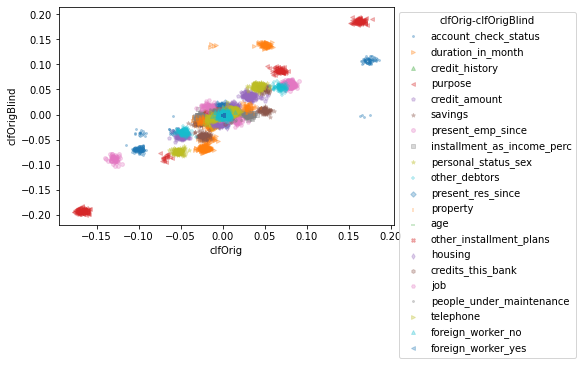

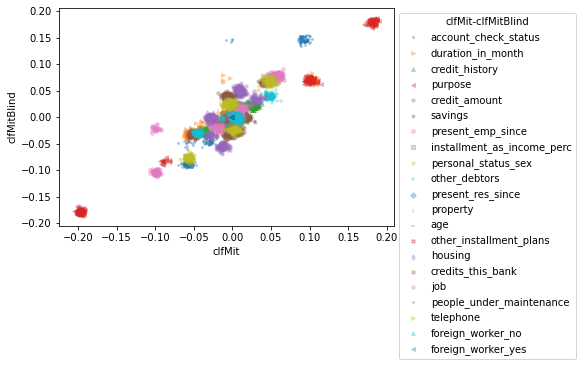

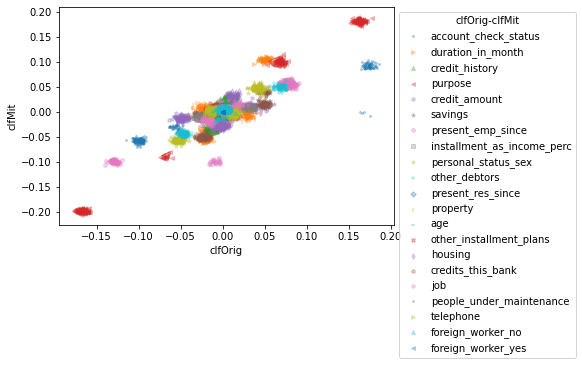

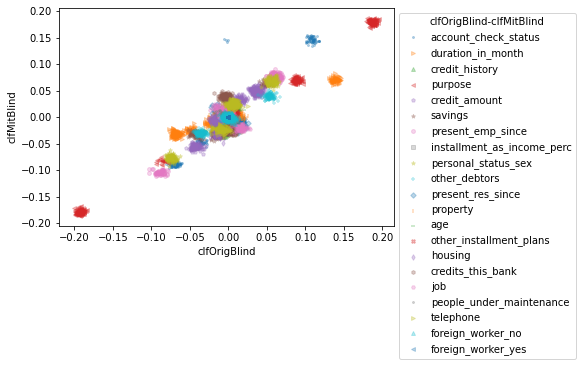

In [48]:
XAIPlots(lime_v,column_names,diffClfs=True)

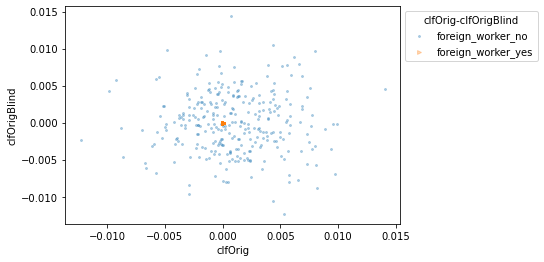

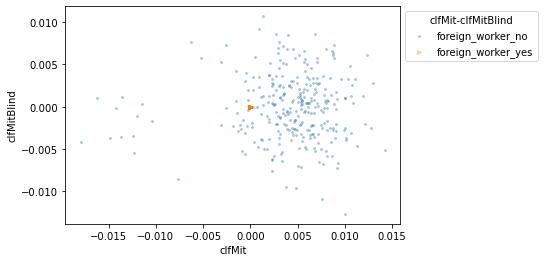

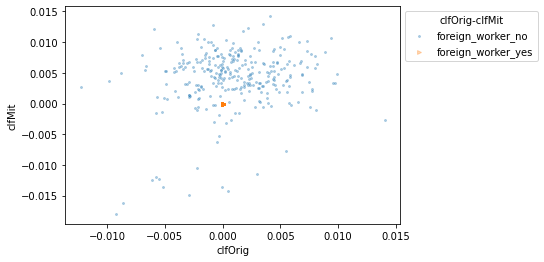

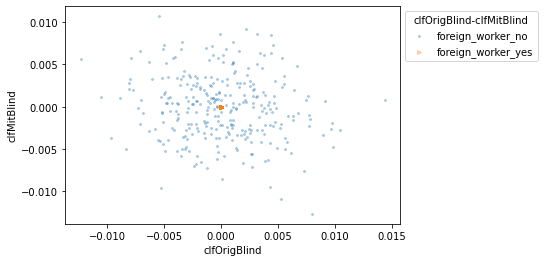

In [49]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [50]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [51]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [52]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [53]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -4.235236           -5.853065   
duration_in_month                      -6.312255           -5.906157   
credit_history                          0.656474            2.866504   
purpose                                -2.774720           -3.121003   
credit_amount                           2.799274            1.897816   
savings                                -0.062997            0.816426   
present_emp_since                       4.642193            3.879941   
installment_as_income_perc             -0.119466            0.063473   
personal_status_sex                     1.148685            0.239286   
other_debtors                           0.132668           -0.072244   
present_res_since                      -0.233663            0.332979   
property                                0.786862           -0.573898   
age                                     0.643507            0.399263   
other_installment_plans                -0.093282            0.434454   
housing                                 0.538558            0.511502   
credits_this_bank                      -0.360512           -0.705915   
job                                     0.047599            0.174695   
people_under_maintenance               -0.050565           -0.075972   
telephone                               0.865076            1.320589   
foreign_worker_no                      -0.045114           -0.122858   
foreign_worker_yes                     -0.030865            0.013199   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -3.882813                 -6.205489  
duration_in_month                -4.799018                 -7.419394  
credit_history                    1.724075                  1.798903  
purpose                          -5.270901                 -0.624822  
credit_amount                     2.005425                  2.691664  
savings                          -0.051933                  0.805361  
present_emp_since                 3.844018                  4.678116  
installment_as_income_perc       -0.183157                  0.127165  
personal_status_sex               0.209335                  1.178635  
other_debtors                    -0.288782                  0.349205  
present_res_since                 0.259118                 -0.159803  
property                          0.488509                 -0.275545  
age                               0.396658                  0.646112  
other_installment_plans          -0.044136                  0.385308  
housing                           0.412755                  0.637305  
credits_this_bank                -0.250680                 -0.815746  
job                               0.000267                  0.222028  
people_under_maintenance          0.023497                 -0.150035  
telephone                         0.222263                  1.963403  
foreign_worker_no                -0.167972                  0.000000  
foreign_worker_yes               -0.018278                  0.000612

In [54]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.018118            0.024174   
duration_in_month                       0.028170            0.008315   
credit_history                          0.004102            0.006063   
purpose                                 0.021173            0.014949   
credit_amount                           0.009679            0.027827   
savings                                 0.012999            0.018596   
present_emp_since                       0.015473            0.011788   
installment_as_income_perc              0.012312            0.008185   
personal_status_sex                     0.012298            0.013690   
other_debtors                           0.009600            0.008762   
present_res_since                       0.003008            0.004276   
property                                0.010258            0.007462   
age                                     0.004870            0.005902   
other_installment_plans                 0.010128            0.002412   
housing                                 0.003004            0.003995   
credits_this_bank                       0.004131            0.025547   
job                                     0.012677            0.004759   
people_under_maintenance                0.007172            0.005963   
telephone                               0.006353            0.025248   
foreign_worker_no                       0.000191            0.001953   
foreign_worker_yes                      0.000158            0.000047   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.026425                  0.016457  
duration_in_month                 0.016506                  0.017321  
credit_history                    0.008884                  0.012192  
purpose                           0.021912                  0.013402  
credit_amount                     0.024535                  0.012258  
savings                           0.015942                  0.013825  
present_emp_since                 0.014368                  0.011281  
installment_as_income_perc        0.009515                  0.009992  
personal_status_sex               0.005938                  0.006541  
other_debtors                     0.012883                  0.009504  
present_res_since                 0.001512                  0.008168  
property                          0.023129                  0.009086  
age                               0.005033                  0.007644  
other_installment_plans           0.009363                  0.002239  
housing                           0.007591                  0.009412  
credits_this_bank                 0.005828                  0.023733  
job                               0.005620                  0.014204  
people_under_maintenance          0.006577                  0.006557  
telephone                         0.014680                  0.016764  
foreign_worker_no                 0.001787                  0.000000  
foreign_worker_yes                0.000200                  0.000005

In [55]:
EValues = computeE(shap_v)
EValues 

{'clfOrig': 0.17008419411088876,
 'clfMit': 0.16696668954537394,
 'clfOrigBlind': 0.17159883665429174,
 'clfMitBlind': 0.1810934087731206}

In [55]:
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Change.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.000               0.016           0.017   
SA-Mean                  0.000               0.000           0.000   
NSA-Sum                  0.003               1.080           1.111   
NSA-Mean                 0.000               0.008           0.008   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      0.070  
NSA-Mean                     0.001

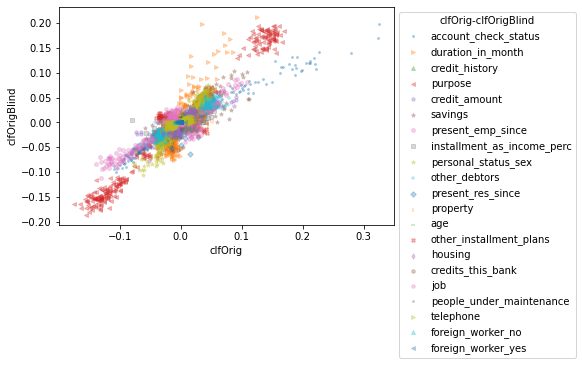

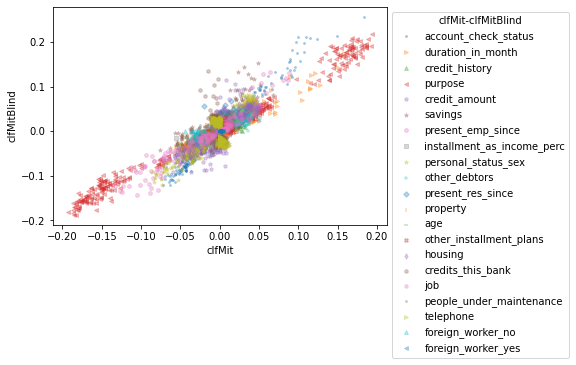

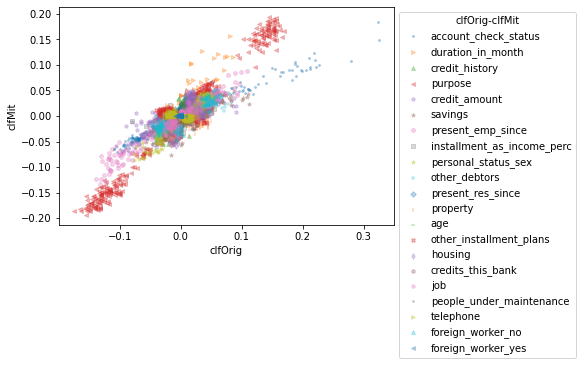

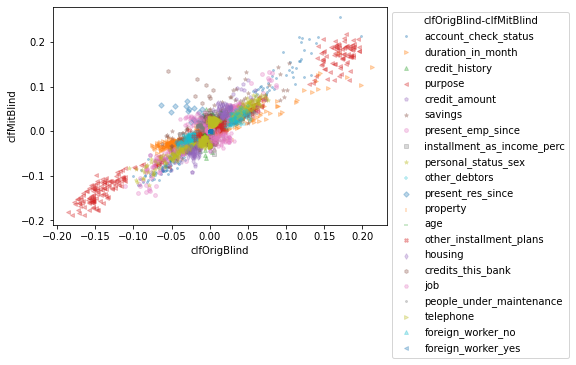

In [56]:
XAIPlots(shap_v,column_names,diffClfs=True)

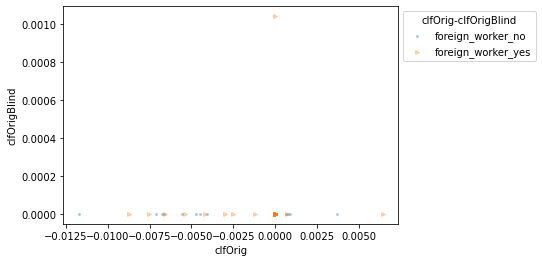

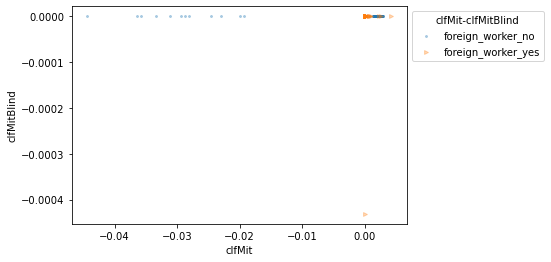

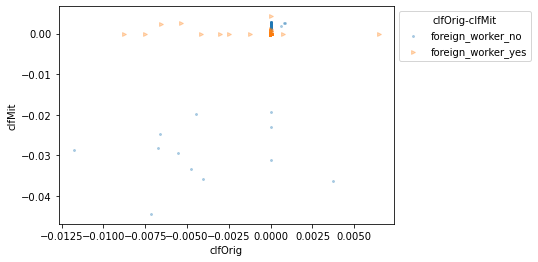

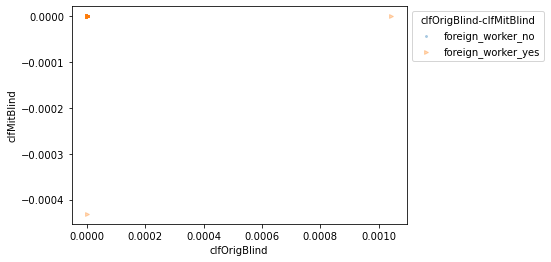

In [57]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [58]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [59]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [56]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [57]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -6.294221            2.637776   
duration_in_month                      -4.125820           -4.068766   
credit_history                          0.780599            2.961895   
purpose                                -5.775265           -6.959136   
credit_amount                           2.205871            3.405117   
savings                                -0.117472           -3.401646   
present_emp_since                      14.060216            9.587223   
installment_as_income_perc             -0.716438           -0.656581   
personal_status_sex                    -3.343135            1.972777   
other_debtors                           0.063302           -1.658807   
present_res_since                       2.716313           -4.827097   
property                                1.893695            0.010075   
age                                    -0.120471            0.403919   
other_installment_plans                 0.172620           -0.771266   
housing                                -2.959401           -6.223924   
credits_this_bank                      -0.175877           -1.189287   
job                                     0.125256            0.894572   
people_under_maintenance               -0.258654            0.093410   
telephone                               1.561065            1.225837   
foreign_worker_no                       0.365138            1.750488   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -5.295229                  1.638783  
duration_in_month                -4.590456                 -3.604129  
credit_history                    1.319326                  2.423168  
purpose                          -6.402573                 -6.331828  
credit_amount                     0.501132                  5.109856  
savings                           0.406965                 -3.926082  
present_emp_since                11.850966                 11.796473  
installment_as_income_perc       -0.824385                 -0.548633  
personal_status_sex              -2.325179                  0.954821  
other_debtors                    -1.966234                  0.370729  
present_res_since                -1.110983                 -0.999801  
property                          1.031032                  0.872738  
age                               0.461244                 -0.177796  
other_installment_plans           0.386851                 -0.985497  
housing                          -0.253948                 -8.929377  
credits_this_bank                -0.151720                 -1.213444  
job                               0.833888                  0.185940  
people_under_maintenance         -0.241382                  0.076139  
telephone                         0.784582                  2.002320  
foreign_worker_no                 2.142608                 -0.026981  
foreign_worker_yes                0.000000                  0.000000

In [58]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.036942            0.052634   
duration_in_month                       0.045757            0.020835   
credit_history                          0.006528            0.008217   
purpose                                 0.023438            0.008352   
credit_amount                           0.006911            0.045698   
savings                                 0.020269            0.021278   
present_emp_since                       0.019379            0.009298   
installment_as_income_perc              0.017972            0.007573   
personal_status_sex                     0.016048            0.022669   
other_debtors                           0.011516            0.014864   
present_res_since                       0.012583            0.012062   
property                                0.013153            0.009567   
age                                     0.005249            0.005110   
other_installment_plans                 0.010338            0.004408   
housing                                 0.010742            0.023465   
credits_this_bank                       0.008014            0.033517   
job                                     0.018098            0.006120   
people_under_maintenance                0.011599            0.009557   
telephone                               0.006722            0.026405   
foreign_worker_no                       0.004832            0.008174   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.043087                  0.046003  
duration_in_month                 0.027700                  0.034315  
credit_history                    0.014385                  0.015409  
purpose                           0.025095                  0.006854  
credit_amount                     0.027003                  0.017957  
savings                           0.025268                  0.011884  
present_emp_since                 0.025253                  0.015337  
installment_as_income_perc        0.013097                  0.011714  
personal_status_sex               0.006301                  0.020158  
other_debtors                     0.009449                  0.011709  
present_res_since                 0.005703                  0.027615  
property                          0.032230                  0.010797  
age                               0.005827                  0.006305  
other_installment_plans           0.009561                  0.004439  
housing                           0.007409                  0.017205  
credits_this_bank                 0.009363                  0.032058  
job                               0.005328                  0.020920  
people_under_maintenance          0.011610                  0.009722  
telephone                         0.015782                  0.015891  
foreign_worker_no                 0.006607                  0.004905  
foreign_worker_yes                0.000000                  0.000000

In [59]:
EValues = computeE(lime_v)
EValues 

{'clfOrig': 0.20777182993319632,
 'clfMit': 0.2085265567338689,
 'clfOrigBlind': 0.21475112522920156,
 'clfMitBlind': 0.22508248410721507}

In [63]:
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Change.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                     0.0               0.060           0.054   
SA-Mean                    0.0               0.001           0.001   
NSA-Sum                    0.0               1.278           1.411   
NSA-Mean                   0.0               0.012           0.011   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.006  
SA-Mean                      0.000  
NSA-Sum                      0.154  
NSA-Mean                     0.002

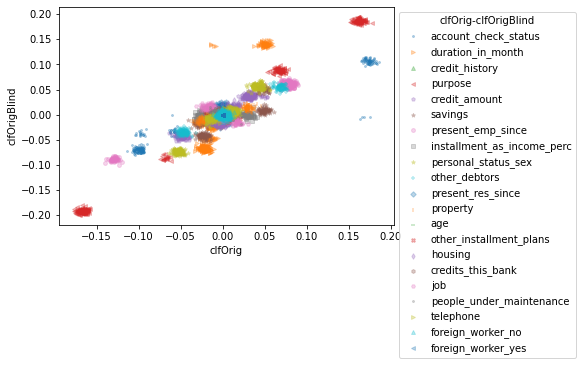

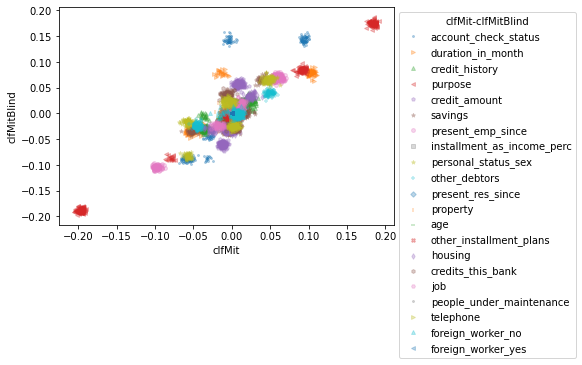

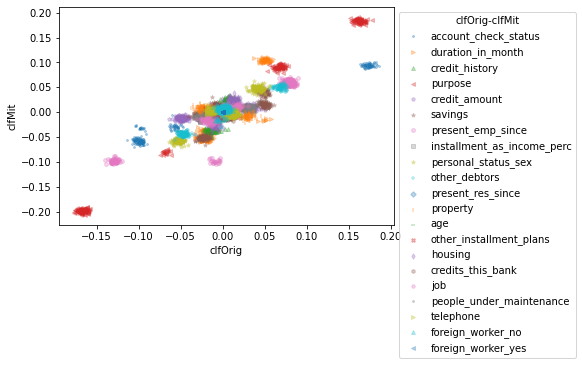

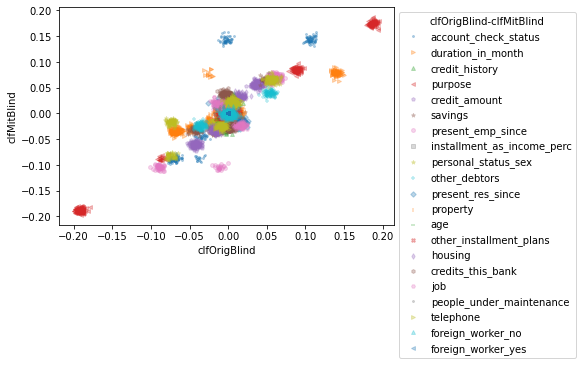

In [64]:
XAIPlots(lime_v,column_names,diffClfs=True)

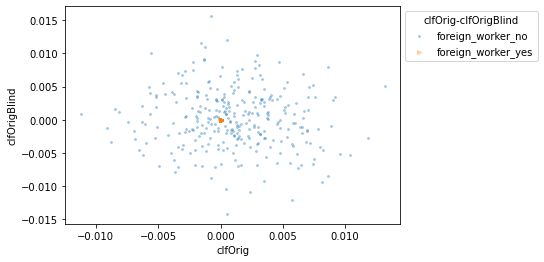

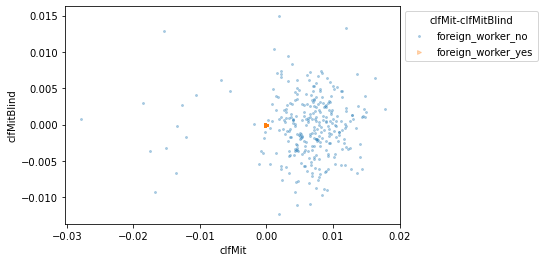

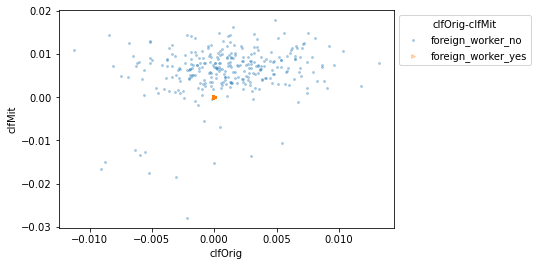

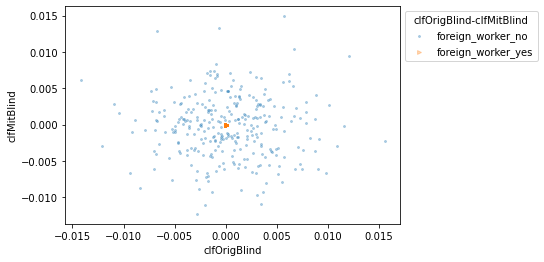

In [65]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [66]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [67]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [68]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -4.352942      -3.921810   
duration_in_month                 -3.731925      -6.197299   
credit_history                     1.269224       2.368142   
purpose                           -4.603695      -6.403273   
credit_amount                      3.469650       0.179542   
savings                            1.103237      -0.233950   
present_emp_since                  4.747672       2.944622   
installment_as_income_perc         0.410729      -0.258909   
personal_status_sex                0.698525       0.222842   
other_debtors                     -0.471998      -1.096609   
present_res_since                  0.071878       0.458931   
property                           1.283451      -0.681331   
age                                0.821089       0.154480   
other_installment_plans           -0.610423       0.402527   
housing                            0.652213       0.365844   
credits_this_bank                 -0.384513      -0.048859   
job                                0.171277      -0.117953   
people_under_maintenance           0.665312      -0.483765   
telephone                          1.053348      -0.749117   
foreign_worker_no                 -0.094656      -0.279476   
foreign_worker_yes                -0.059657       0.023578   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -4.965763                -5.917565  
duration_in_month                           -8.972573                -6.296652  
credit_history                               0.329652                 2.727877  
purpose                                     -1.181427                -2.527600  
credit_amount                                1.907350                 3.043792  
savings                                      0.223921                 2.005479  
present_emp_since                            3.461134                 5.215201  
installment_as_income_perc                  -0.244974                 0.734329  
personal_status_sex                          1.724180                 1.633275  
other_debtors                                0.045196                 0.738975  
present_res_since                           -0.449608                 0.106695  
property                                    -0.207831                -0.246495  
age                                          0.479187                 0.710313  
other_installment_plans                      0.395959                 0.449128  
housing                                      0.399357                 0.855828  
credits_this_bank                           -0.195517                -0.765525  
job                                          0.246318                 0.079886  
people_under_maintenance                    -0.712995                 0.427901  
telephone                                    0.644630                 3.409049  
foreign_worker_no                            0.000391                 0.000000  
foreign_worker_yes                           0.001043                -0.000431

In [69]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.002330       0.000757   
duration_in_month                  0.000590       0.001530   
credit_history                     0.000735       0.000577   
purpose                            0.001617       0.001165   
credit_amount                      0.001095       0.000555   
savings                            0.002792       0.000696   
present_emp_since                  0.002280       0.002294   
installment_as_income_perc         0.001010       0.000819   
personal_status_sex                0.001035       0.002564   
other_debtors                      0.003212       0.000437   
present_res_since                  0.000159       0.000176   
property                           0.001700       0.000550   
age                                0.000476       0.000595   
other_installment_plans            0.000497       0.000281   
housing                            0.000508       0.000558   
credits_this_bank                  0.000678       0.000526   
job                                0.000571       0.000463   
people_under_maintenance           0.000595       0.000400   
telephone                          0.000642       0.000487   
foreign_worker_no                  0.000048       0.000315   
foreign_worker_yes                 0.000023       0.000023   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.000611                 0.005589  
duration_in_month                            0.000762                 0.000786  
credit_history                               0.000488                 0.002188  
purpose                                      0.000981                 0.009018  
credit_amount                                0.000517                 0.001736  
savings                                      0.002060                 0.000532  
present_emp_since                            0.001337                 0.001001  
installment_as_income_perc                   0.000495                 0.000707  
personal_status_sex                          0.001336                 0.002028  
other_debtors                                0.001003                 0.000781  
present_res_since                            0.000410                 0.000551  
property                                     0.000395                 0.000476  
age                                          0.000598                 0.000490  
other_installment_plans                      0.000320                 0.000347  
housing                                      0.000436                 0.000521  
credits_this_bank                            0.000299                 0.002099  
job                                          0.000785                 0.001175  
people_under_maintenance                     0.000453                 0.000412  
telephone                                    0.000551                 0.000358  
foreign_worker_no                            0.000001                 0.000000  
foreign_worker_yes                           0.000003                 0.000001

In [70]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.077          0.152                      0.001   
SA-Mean             0.000          0.000                      0.000   
NSA-Sum             1.609          1.436                      1.410   
NSA-Mean            0.001          0.001                      0.001   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.000  
SA-Mean                     0.000  
NSA-Sum                     1.994  
NSA-Mean                    0.002

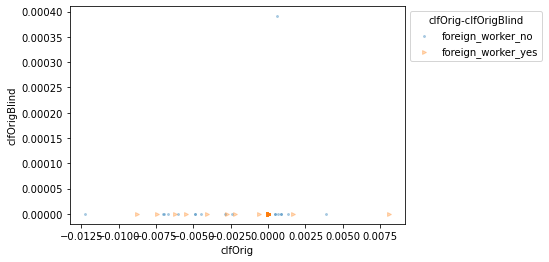

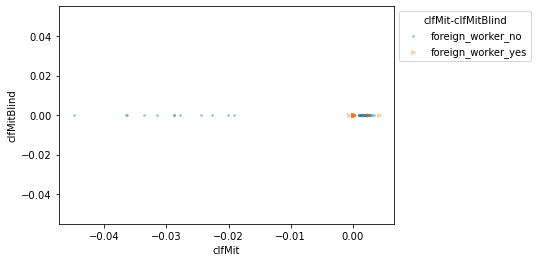

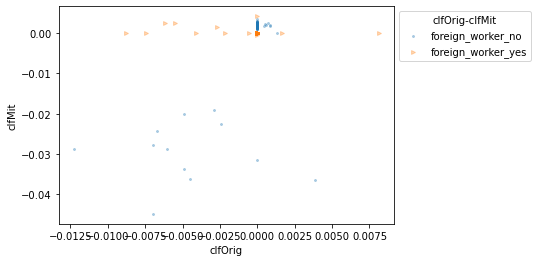

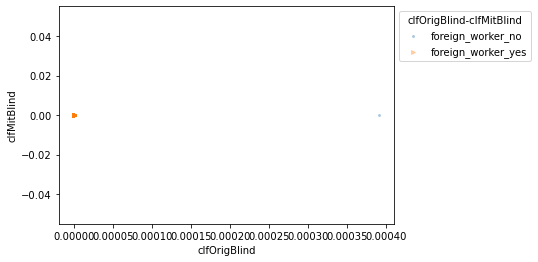

In [71]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [72]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [73]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [74]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -7.171896      -4.408183   
duration_in_month                 -2.350136      -6.516138   
credit_history                     0.495394       2.889613   
purpose                           -6.053185      -6.421832   
credit_amount                      0.664910       0.392750   
savings                            3.010130      -2.253847   
present_emp_since                 15.389588       7.830807   
installment_as_income_perc        -1.273158      -0.457802   
personal_status_sex               -2.642977      -2.010520   
other_debtors                     -0.207750      -3.665833   
present_res_since                 -0.348715      -1.667854   
property                           2.764695      -0.683474   
age                                0.224852       0.561675   
other_installment_plans            1.441538      -0.715117   
housing                           -0.274556      -5.255394   
credits_this_bank                 -0.257276       0.070886   
job                                0.896665       0.771787   
people_under_maintenance          -2.152352       1.656010   
telephone                          2.162039      -0.554835   
foreign_worker_no                  0.592473       3.085159   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -5.338073                 1.690183  
duration_in_month                           -5.954938                -1.944419  
credit_history                               0.902014                 3.367231  
purpose                                     -5.594260                -6.632010  
credit_amount                                3.655153                 5.756248  
savings                                     -3.193602                -4.888278  
present_emp_since                           12.629085                13.348695  
installment_as_income_perc                  -0.156739                -0.810199  
personal_status_sex                         -4.130340                 1.843839  
other_debtors                                0.327791                -0.706253  
present_res_since                            5.731971                -7.329431  
property                                     1.031063                 0.719734  
age                                         -0.442625                 0.063219  
other_installment_plans                     -0.999988                -0.766811  
housing                                     -5.588463                -6.401298  
credits_this_bank                           -0.026882                -1.793172  
job                                         -0.562557                 0.861445  
people_under_maintenance                     1.727578                -1.375768  
telephone                                    0.976830                 3.658509  
foreign_worker_no                            0.056108                -0.103594  
foreign_worker_yes                           0.000000                 0.000000

In [75]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.000425       0.006888   
duration_in_month                  0.000095       0.008014   
credit_history                     0.000099       0.007543   
purpose                            0.000106       0.005451   
credit_amount                      0.000095       0.004149   
savings                            0.000104       0.004551   
present_emp_since                  0.000091       0.004906   
installment_as_income_perc         0.000102       0.004484   
personal_status_sex                0.000101       0.004472   
other_debtors                      0.000099       0.004066   
present_res_since                  0.000093       0.004439   
property                           0.000093       0.004465   
age                                0.000102       0.004395   
other_installment_plans            0.000096       0.004356   
housing                            0.000099       0.019732   
credits_this_bank                  0.000102       0.004496   
job                                0.000097       0.004597   
people_under_maintenance           0.000089       0.003933   
telephone                          0.000095       0.004953   
foreign_worker_no                  0.001168       0.004174   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.004815                 0.031717  
duration_in_month                            0.004327                 0.009584  
credit_history                               0.005118                 0.005879  
purpose                                      0.003963                 0.009718  
credit_amount                                0.004916                 0.007458  
savings                                      0.004403                 0.005047  
present_emp_since                            0.004831                 0.013683  
installment_as_income_perc                   0.004848                 0.004886  
personal_status_sex                          0.005081                 0.019577  
other_debtors                                0.004663                 0.006291  
present_res_since                            0.004685                 0.005563  
property                                     0.005259                 0.005000  
age                                          0.004807                 0.005026  
other_installment_plans                      0.004126                 0.004709  
housing                                      0.004472                 0.021171  
credits_this_bank                            0.004332                 0.005056  
job                                          0.004512                 0.005507  
people_under_maintenance                     0.004189                 0.004498  
telephone                                    0.004709                 0.005297  
foreign_worker_no                            0.004721                 0.004502  
foreign_worker_yes                           0.000000                 0.000000

In [76]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.296          1.543                      0.028   
SA-Mean             0.001          0.002                      0.002   
NSA-Sum             2.620          2.568                      3.104   
NSA-Mean            0.000          0.006                      0.005   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.052  
SA-Mean                     0.002  
NSA-Sum                     3.366  
NSA-Mean                    0.009

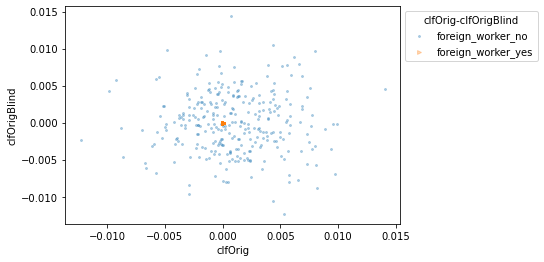

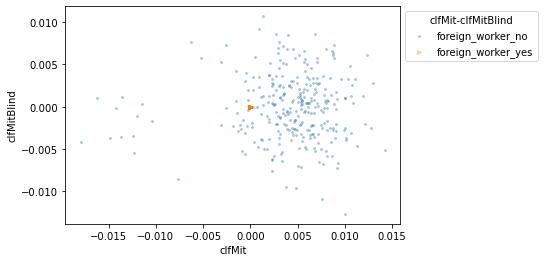

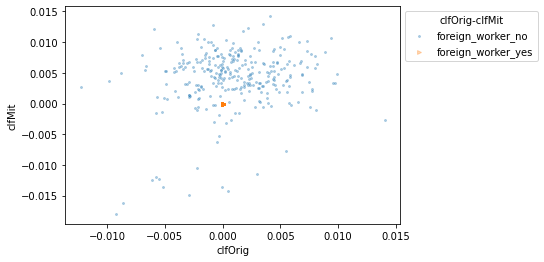

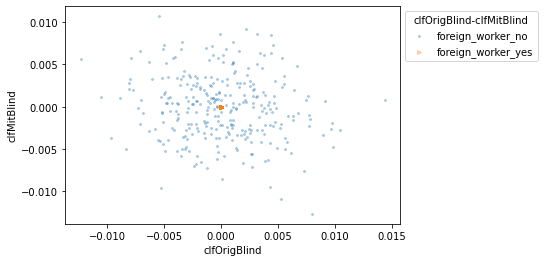

In [77]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [200]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [201]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_RF_Performances.csv')
res

Original Train Dimension = 700
Mitigated Train Dimension = 700
Test Dimension = 300
---> CLF Original: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 250 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 246 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 249 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 242 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.756667            0.746667       0.746667   
Precision           0.670317            0.612980       0.601566   
Recall              0.301307            0.313072       0.314379   
F1 Score            0.412084            0.410972       0.409195   
Discrimination      0.131944            0.135417       0.145833   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.750000         CLF Original    0.010000   
Precision                  0.611667         CLF Original    0.057338   
Recall                     0.349020  CLF Mitigated Blind    0.011765   
F1 Score                   0.442197  CLF Mitigated Blind    0.001112   
Discrimination             0.159722         CLF Original    0.003472   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.003333   0.010000     0.003333  
Precision         0.010101   0.068752     0.001313  
Recall            0.034641   0.013072     0.035948  
F1 Score          0.033002   0.002889     0.031225  
Discrimination    0.013889   0.013889     0.024306

In [202]:

PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [203]:
PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [6]:
res = pd.read_csv(path_res+'PS_RF_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'PS_RF_Performances.csv')
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy               0.757               0.747          0.747   
Precision              0.670               0.613          0.602   
Recall                 0.301               0.313          0.314   
F1 Score               0.412               0.411          0.409   
Discrimination         0.132               0.135          0.146   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                      0.750         CLF Original       0.010   
Precision                     0.612         CLF Original       0.057   
Recall                        0.349  CLF Mitigated Blind       0.012   
F1 Score                      0.442  CLF Mitigated Blind       0.001   
Discrimination                0.160         CLF Original       0.003   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy             0.003      0.010        0.003  
Precision            0.010      0.069        0.001  
Recall               0.035      0.013        0.036  
F1 Score             0.033      0.003        0.031  
Discrimination       0.014      0.014        0.024

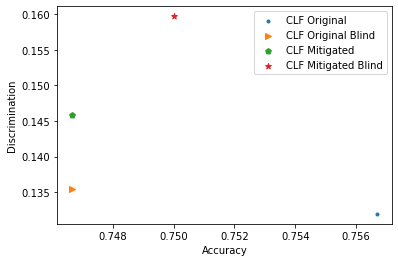

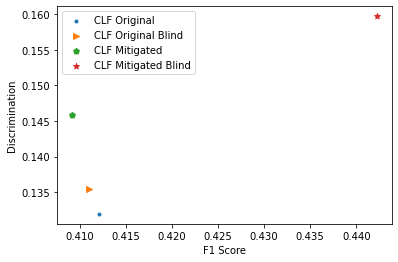

In [10]:
plotDisc(res)

In [206]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 12 instances.
    * "('foreign_worker_yes',)" grouping has 288 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 11 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 203 data points.
        - The class *Bad* has 85 data points.


In [207]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fair

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


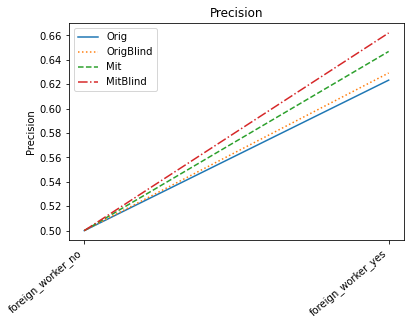

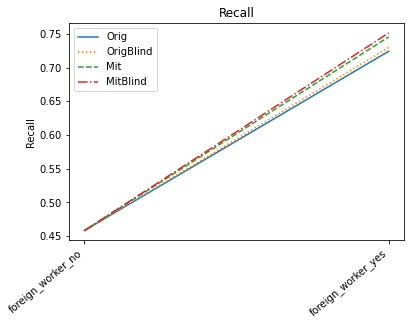

In [208]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [209]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [210]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [60]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [61]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -6.186125           -3.085524   
duration_in_month                     -11.194208          -13.666651   
credit_history                          4.273436            5.628162   
purpose                                 6.051340            6.070615   
credit_amount                         -19.121523          -20.819605   
savings                                -2.818253           -3.776544   
present_emp_since                      -1.605292           -3.056381   
installment_as_income_perc              1.221243            0.916257   
personal_status_sex                     0.543418            0.472225   
other_debtors                           0.612349            0.824536   
present_res_since                      -1.013803           -1.102579   
property                                1.380855            1.552970   
age                                     6.100914            4.127612   
other_installment_plans                 2.655451            2.576952   
housing                                 2.505784            3.630869   
credits_this_bank                      -0.029655           -0.187545   
job                                     0.787604            0.708545   
people_under_maintenance                1.116069            1.533473   
telephone                              -0.072864           -0.278095   
foreign_worker_no                      -0.145926            0.172777   
foreign_worker_yes                     -0.184972            0.066280   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -2.071255                 -7.200394  
duration_in_month               -11.751202                -13.109657  
credit_history                    4.748025                  5.153572  
purpose                           6.109378                  6.012577  
credit_amount                   -18.764840                -21.176288  
savings                          -3.575398                 -3.019398  
present_emp_since                -2.367672                 -2.294001  
installment_as_income_perc        0.903748                  1.233751  
personal_status_sex               0.453811                  0.561832  
other_debtors                     0.672044                  0.764841  
present_res_since                -1.177671                 -0.938711  
property                          1.406238                  1.527587  
age                               5.428465                  4.800061  
other_installment_plans           2.498074                  2.734328  
housing                           3.133769                  3.002884  
credits_this_bank                -0.057114                 -0.160087  
job                               0.701029                  0.795121  
people_under_maintenance          1.313579                  1.335964  
telephone                        -0.138623                 -0.212336  
foreign_worker_no                 0.028790                 -0.001939  
foreign_worker_yes               -0.118279                 -0.000413

In [62]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.006528            0.012481   
duration_in_month                       0.006803            0.004226   
credit_history                          0.004483            0.002083   
purpose                                 0.004482            0.003216   
credit_amount                           0.007467            0.007311   
savings                                 0.004064            0.002557   
present_emp_since                       0.003359            0.001669   
installment_as_income_perc              0.003191            0.002279   
personal_status_sex                     0.004464            0.001545   
other_debtors                           0.000686            0.000788   
present_res_since                       0.003473            0.001307   
property                                0.002995            0.002149   
age                                     0.004845            0.002755   
other_installment_plans                 0.002374            0.001806   
housing                                 0.002273            0.001780   
credits_this_bank                       0.001928            0.000908   
job                                     0.002303            0.001573   
people_under_maintenance                0.000883            0.000378   
telephone                               0.002034            0.001161   
foreign_worker_no                       0.000486            0.000605   
foreign_worker_yes                      0.000636            0.000291   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.020323                  0.020621  
duration_in_month                 0.012733                  0.011089  
credit_history                    0.004352                  0.007603  
purpose                           0.004792                  0.005309  
credit_amount                     0.008771                  0.010144  
savings                           0.004557                  0.003773  
present_emp_since                 0.005515                  0.003501  
installment_as_income_perc        0.004756                  0.004139  
personal_status_sex               0.004044                  0.003048  
other_debtors                     0.001302                  0.001171  
present_res_since                 0.003078                  0.002229  
property                          0.003319                  0.003146  
age                               0.006166                  0.007212  
other_installment_plans           0.003174                  0.003874  
housing                           0.004343                  0.003439  
credits_this_bank                 0.001797                  0.001342  
job                               0.003419                  0.002798  
people_under_maintenance          0.000954                  0.001222  
telephone                         0.001968                  0.002009  
foreign_worker_no                 0.001085                  0.000006  
foreign_worker_yes                0.000926                  0.000001

In [63]:
EValues = computeE(shap_v)
EValues 

{'clfOrig': 0.13444742340059726,
 'clfMit': 0.15408026132009145,
 'clfOrigBlind': 0.1368107140454285,
 'clfMitBlind': 0.16145023420315938}

In [23]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.165               0.120           0.074   
SA-Mean                  0.001               0.000           0.001   
NSA-Sum                  3.647               3.896           3.541   
NSA-Mean                 0.004               0.003           0.005   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.001  
SA-Mean                      0.000  
NSA-Sum                      4.002  
NSA-Mean                     0.005

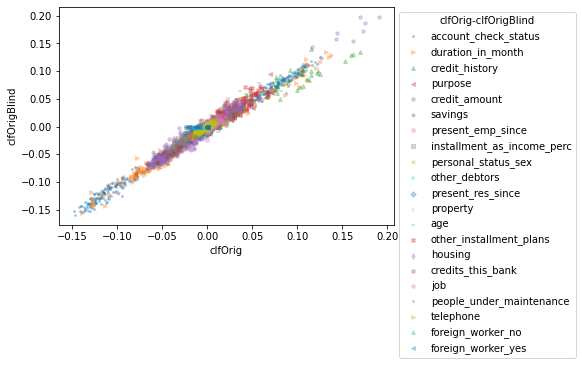

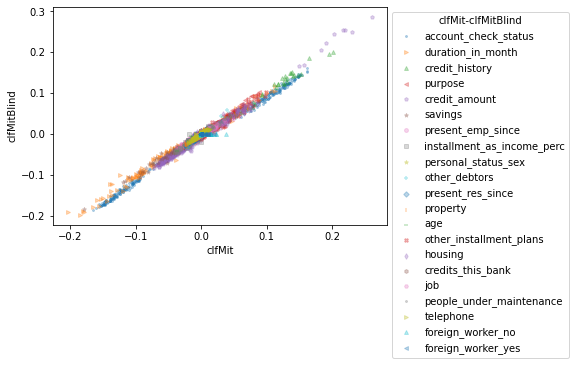

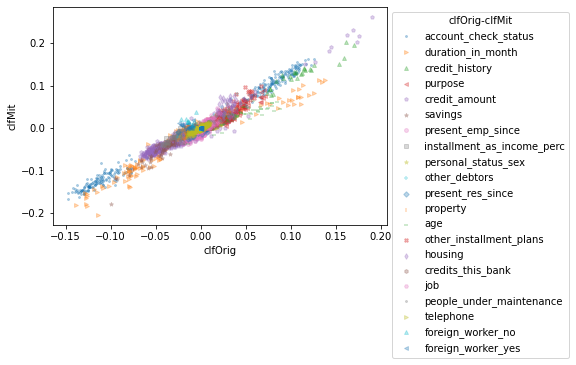

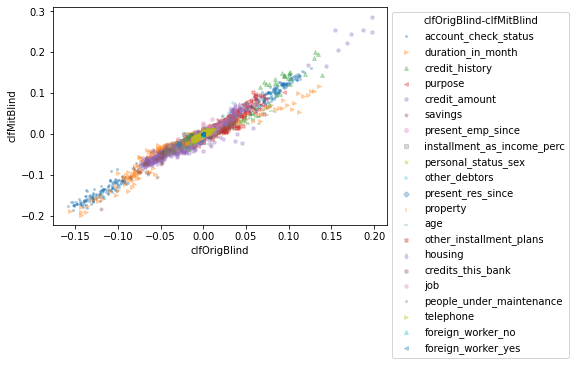

In [215]:
XAIPlots(shap_v,column_names,diffClfs=True)

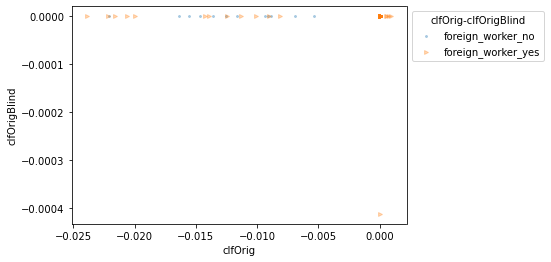

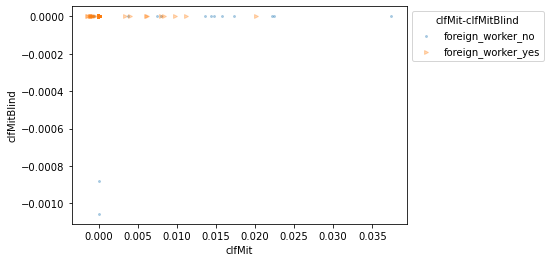

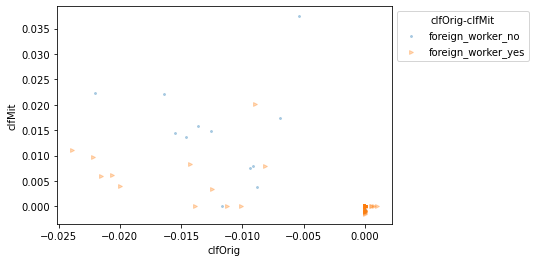

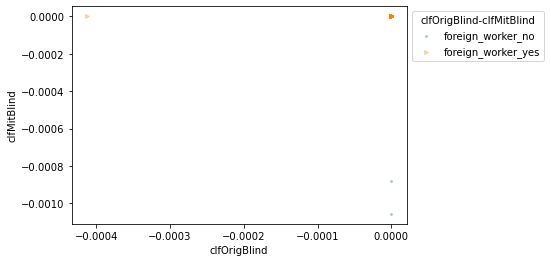

In [216]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [217]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [218]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [64]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [65]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -1.576647           -3.440995   
duration_in_month                      -0.395835           -3.009546   
credit_history                         -0.727381           -0.496582   
purpose                                 0.645952            0.902406   
credit_amount                          -1.091257           -1.582739   
savings                                 0.189673           -0.143080   
present_emp_since                       0.459167            0.928993   
installment_as_income_perc             -1.020564           -0.969653   
personal_status_sex                     0.293219            0.356374   
other_debtors                          -0.014518           -0.088954   
present_res_since                      -0.120070           -0.179377   
property                                0.181374            0.217810   
age                                     1.229332            1.549534   
other_installment_plans                 1.324755            1.704131   
housing                                 0.013302           -0.447742   
credits_this_bank                       0.047582           -0.227422   
job                                     0.467958            0.686032   
people_under_maintenance                0.208416           -0.052732   
telephone                               0.439100            0.539793   
foreign_worker_no                       0.033211           -0.004253   
foreign_worker_yes                      0.021420           -0.016506   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -2.420606                 -2.597035  
duration_in_month                -1.797674                 -1.607707  
credit_history                   -0.602394                 -0.621569  
purpose                           0.859416                  0.688942  
credit_amount                    -1.261190                 -1.412806  
savings                           0.060667                 -0.014074  
present_emp_since                 0.750585                  0.637576  
installment_as_income_perc       -0.993926                 -0.996291  
personal_status_sex               0.320558                  0.329035  
other_debtors                    -0.115390                  0.011918  
present_res_since                -0.241091                 -0.058356  
property                          0.197631                  0.201553  
age                               1.390413                  1.388454  
other_installment_plans           1.322462                  1.706424  
housing                          -0.145308                 -0.289132  
credits_this_bank                -0.224305                  0.044466  
job                               0.642669                  0.511321  
people_under_maintenance          0.104919                  0.050765  
telephone                         0.421930                  0.556963  
foreign_worker_no                 0.028958                  0.000000  
foreign_worker_yes                0.004914                  0.000000

In [66]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.004810            0.005822   
duration_in_month                       0.007488            0.004107   
credit_history                          0.004313            0.001978   
purpose                                 0.004109            0.002947   
credit_amount                           0.005379            0.003735   
savings                                 0.002945            0.001826   
present_emp_since                       0.003033            0.001598   
installment_as_income_perc              0.002590            0.001768   
personal_status_sex                     0.003514            0.001181   
other_debtors                           0.001025            0.000958   
present_res_since                       0.002957            0.001238   
property                                0.002921            0.001739   
age                                     0.004722            0.003056   
other_installment_plans                 0.002244            0.001587   
housing                                 0.002431            0.001858   
credits_this_bank                       0.002620            0.000838   
job                                     0.002214            0.001532   
people_under_maintenance                0.001333            0.000642   
telephone                               0.001822            0.001209   
foreign_worker_no                       0.001241            0.000986   
foreign_worker_yes                      0.001472            0.000629   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.016755                  0.020250  
duration_in_month                 0.013992                  0.011538  
credit_history                    0.004536                  0.008220  
purpose                           0.004344                  0.004993  
credit_amount                     0.006975                  0.007567  
savings                           0.005878                  0.005079  
present_emp_since                 0.005155                  0.003785  
installment_as_income_perc        0.003078                  0.003000  
personal_status_sex               0.003998                  0.002470  
other_debtors                     0.001825                  0.001802  
present_res_since                 0.002764                  0.002583  
property                          0.003178                  0.003119  
age                               0.007272                  0.007186  
other_installment_plans           0.003894                  0.003736  
housing                           0.006154                  0.005125  
credits_this_bank                 0.002043                  0.001490  
job                               0.003123                  0.002553  
people_under_maintenance          0.001311                  0.001684  
telephone                         0.001747                  0.001814  
foreign_worker_no                 0.002203                  0.000000  
foreign_worker_yes                0.002056                  0.000000

In [67]:
EValues = computeE(shap_v)
EValues 

{'clfOrig': 0.13202864671343106,
 'clfMit': 0.15293402267683917,
 'clfOrigBlind': 0.13418297876933474,
 'clfMitBlind': 0.158640493621358}

In [24]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix_Tree.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.027               0.010           0.017   
SA-Mean                  0.001               0.001           0.002   
NSA-Sum                  0.550               0.922           0.730   
NSA-Mean                 0.003               0.002           0.005   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      0.722  
NSA-Mean                     0.005

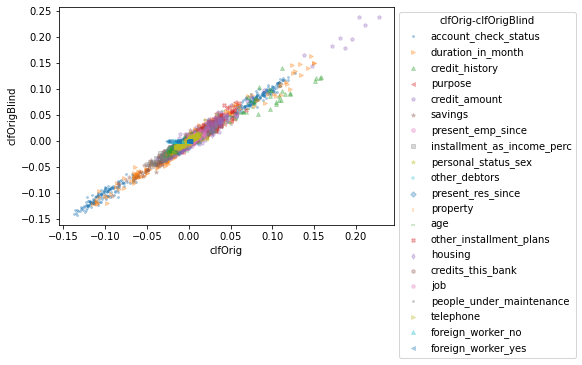

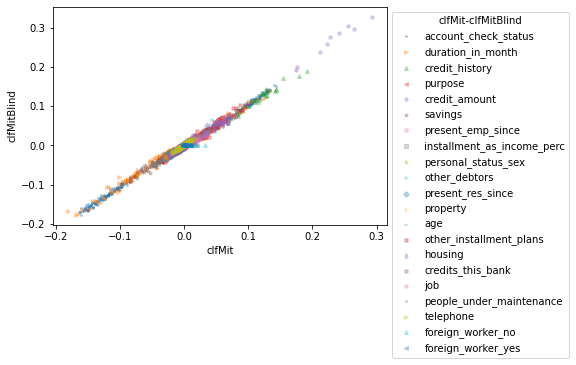

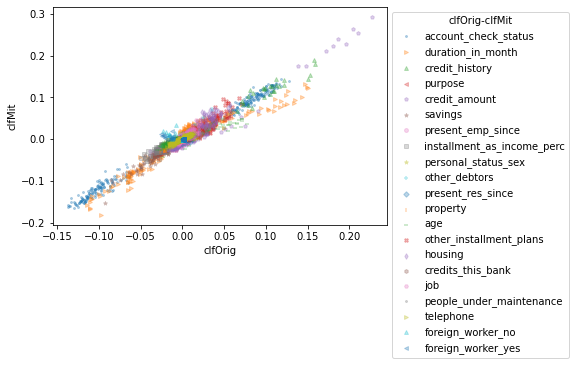

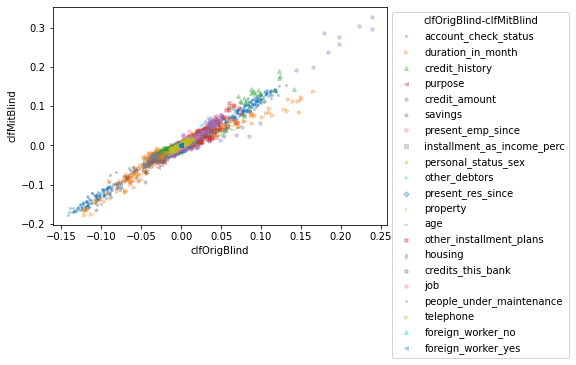

In [223]:
XAIPlots(shap_v,column_names,diffClfs=True)

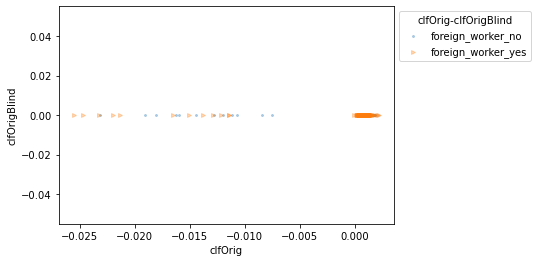

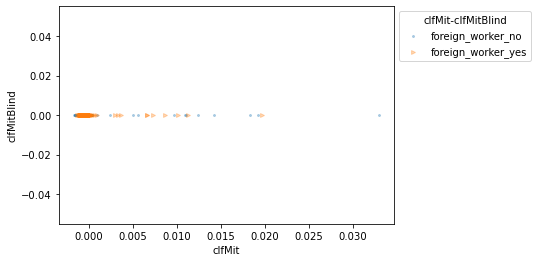

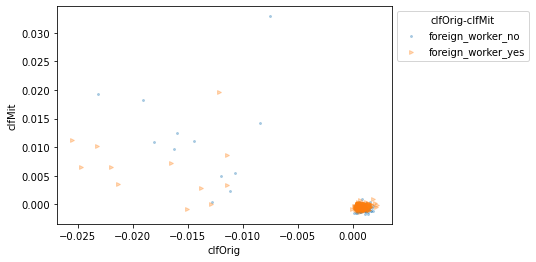

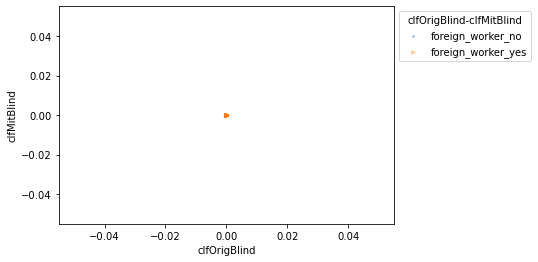

In [224]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [225]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [226]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [68]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [69]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -2.367083            4.766687   
duration_in_month                     -13.654243          -10.593125   
credit_history                          5.655557            6.900345   
purpose                                 5.037342            5.893746   
credit_amount                         -25.090792          -27.599016   
savings                                 2.113653            1.815196   
present_emp_since                      -0.304592           -0.575030   
installment_as_income_perc             -0.369336            0.029777   
personal_status_sex                    -0.352589           -0.545221   
other_debtors                           0.880697            1.018980   
present_res_since                      -0.170345           -0.429224   
property                                2.067944            2.342191   
age                                     4.598349            3.293328   
other_installment_plans                -3.127054           -6.092503   
housing                                -2.339460           -3.736865   
credits_this_bank                      -0.057225            0.055261   
job                                    -0.681974           -1.570009   
people_under_maintenance               -0.014863           -0.423306   
telephone                               0.348802            1.195369   
foreign_worker_no                       0.391679           -0.980891   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              1.202353                  1.197251  
duration_in_month               -12.591685                -11.655682  
credit_history                    6.097354                  6.458549  
purpose                           5.415678                  5.515410  
credit_amount                   -25.046071                -27.643738  
savings                           1.875177                  2.053671  
present_emp_since                -0.379382                 -0.500241  
installment_as_income_perc       -0.083358                 -0.256200  
personal_status_sex              -0.595952                 -0.301858  
other_debtors                     0.973847                  0.925829  
present_res_since                -0.478106                 -0.121463  
property                          2.339923                  2.070212  
age                               3.775312                  4.116364  
other_installment_plans          -5.147932                 -4.071625  
housing                          -2.934712                 -3.141613  
credits_this_bank                -0.069704                  0.067741  
job                              -1.187975                 -1.064008  
people_under_maintenance         -0.286581                 -0.151588  
telephone                         0.630564                  0.913607  
foreign_worker_no                -0.636439                  0.047226  
foreign_worker_yes                0.000000                  0.000000

In [70]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.012415            0.012570   
duration_in_month                       0.006694            0.010571   
credit_history                          0.004479            0.005917   
purpose                                 0.005504            0.007544   
credit_amount                           0.015619            0.013115   
savings                                 0.005304            0.006110   
present_emp_since                       0.004790            0.005840   
installment_as_income_perc              0.004731            0.005362   
personal_status_sex                     0.007730            0.005315   
other_debtors                           0.004388            0.005691   
present_res_since                       0.005360            0.005526   
property                                0.004534            0.006257   
age                                     0.006921            0.006736   
other_installment_plans                 0.005678            0.005547   
housing                                 0.004380            0.005226   
credits_this_bank                       0.004875            0.005256   
job                                     0.004638            0.005422   
people_under_maintenance                0.003834            0.005026   
telephone                               0.004510            0.004931   
foreign_worker_no                       0.004125            0.006020   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.029309                  0.034874  
duration_in_month                 0.012259                  0.013179  
credit_history                    0.006547                  0.005320  
purpose                           0.004828                  0.008829  
credit_amount                     0.011173                  0.013794  
savings                           0.009633                  0.006325  
present_emp_since                 0.005817                  0.005417  
installment_as_income_perc        0.007033                  0.007414  
personal_status_sex               0.005456                  0.006303  
other_debtors                     0.004776                  0.005365  
present_res_since                 0.005212                  0.005768  
property                          0.005457                  0.005048  
age                               0.005505                  0.009997  
other_installment_plans           0.005843                  0.009516  
housing                           0.006137                  0.005668  
credits_this_bank                 0.004586                  0.004731  
job                               0.006555                  0.006227  
people_under_maintenance          0.004542                  0.004736  
telephone                         0.005719                  0.005128  
foreign_worker_no                 0.006283                  0.004291  
foreign_worker_yes                0.000000                  0.000000

In [71]:
EValues = computeE(lime_v)
EValues 

{'clfOrig': 0.15793119524241322,
 'clfMit': 0.183403917573221,
 'clfOrigBlind': 0.16096558830920824,
 'clfMitBlind': 0.19211877987312315}

In [25]:
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Fix.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.196               0.490           0.318   
SA-Mean                  0.002               0.003           0.003   
NSA-Sum                  3.644               4.151           3.743   
NSA-Mean                 0.006               0.007           0.008   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.024  
SA-Mean                      0.002  
NSA-Sum                      3.801  
NSA-Mean                     0.009

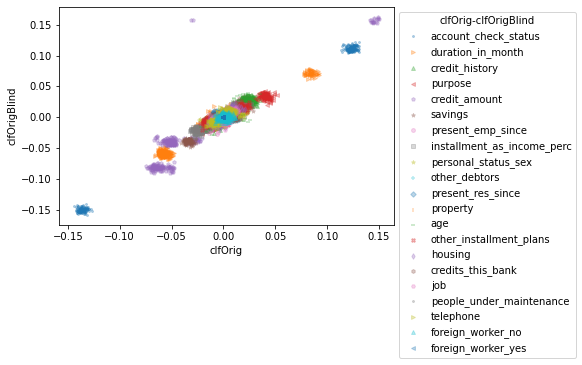

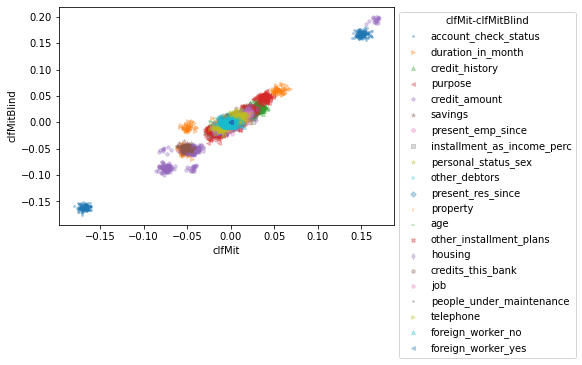

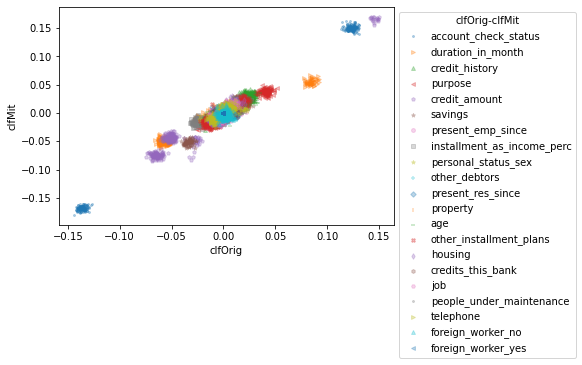

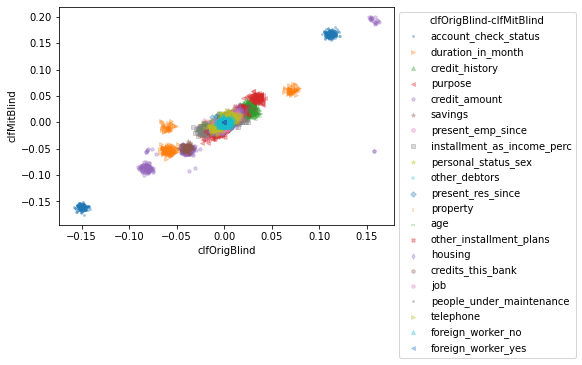

In [231]:
XAIPlots(lime_v,column_names,diffClfs=True)

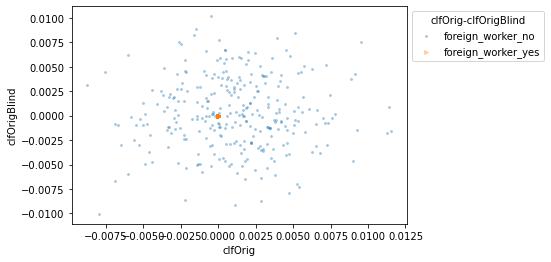

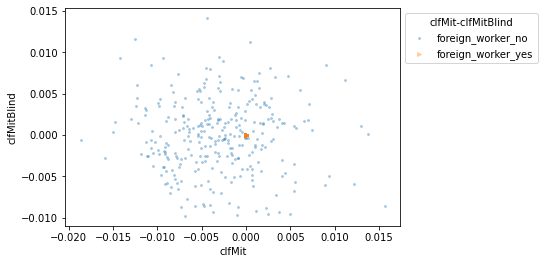

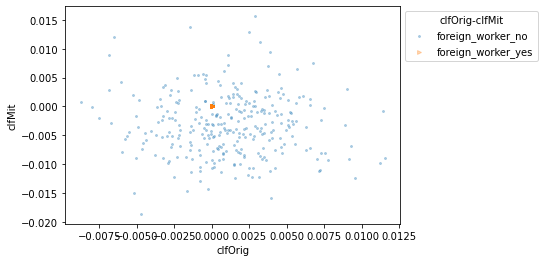

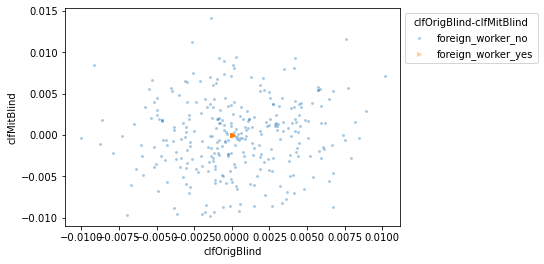

In [232]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [233]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [234]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [72]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [73]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -8.562328           -6.340639   
duration_in_month                     -11.141290          -14.950288   
credit_history                          4.069838            5.270037   
purpose                                 5.640340            5.982952   
credit_amount                         -19.997540          -22.483269   
savings                                -3.250544           -3.506157   
present_emp_since                      -1.576098           -2.882972   
installment_as_income_perc              1.220020            1.089997   
personal_status_sex                     0.511695            0.307223   
other_debtors                           0.616946            0.793675   
present_res_since                      -0.893356           -1.175750   
property                                1.385804            0.934073   
age                                     5.458463            3.750912   
other_installment_plans                 2.732666            2.409253   
housing                                 2.428909            3.291955   
credits_this_bank                      -0.141276           -0.129220   
job                                     0.758407            0.345036   
people_under_maintenance                1.057863            1.450684   
telephone                              -0.115644            0.122348   
foreign_worker_no                      -0.154236            0.171311   
foreign_worker_yes                     -0.194894            0.075079   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -8.752166                 -6.150801  
duration_in_month               -12.633914                -13.457665  
credit_history                    4.685420                  4.654454  
purpose                           5.646259                  5.977033  
credit_amount                   -19.592066                -22.888742  
savings                          -3.234879                 -3.521822  
present_emp_since                -2.079175                 -2.379895  
installment_as_income_perc        1.178517                  1.131501  
personal_status_sex               0.490994                  0.327925  
other_debtors                     0.666727                  0.743894  
present_res_since                -1.246672                 -0.822434  
property                          1.302279                  1.017597  
age                               4.858175                  4.351200  
other_installment_plans           2.487922                  2.653997  
housing                           2.710915                  3.009950  
credits_this_bank                -0.211325                 -0.059171  
job                               0.606245                  0.497198  
people_under_maintenance          1.154242                  1.354305  
telephone                        -0.058437                  0.065141  
foreign_worker_no                 0.017445                 -0.000371  
foreign_worker_yes               -0.120481                  0.000666

In [74]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.006957            0.006780   
duration_in_month                       0.006414            0.004139   
credit_history                          0.004492            0.002032   
purpose                                 0.004363            0.004025   
credit_amount                           0.008193            0.008461   
savings                                 0.003686            0.002301   
present_emp_since                       0.003368            0.001415   
installment_as_income_perc              0.003428            0.002798   
personal_status_sex                     0.004672            0.001427   
other_debtors                           0.000769            0.000952   
present_res_since                       0.003356            0.001476   
property                                0.002934            0.002324   
age                                     0.004899            0.002979   
other_installment_plans                 0.002202            0.001743   
housing                                 0.002366            0.001739   
credits_this_bank                       0.001972            0.000830   
job                                     0.002137            0.001400   
people_under_maintenance                0.000871            0.000584   
telephone                               0.001919            0.001189   
foreign_worker_no                       0.000514            0.000694   
foreign_worker_yes                      0.000670            0.000303   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.018564                  0.021217  
duration_in_month                 0.013144                  0.010824  
credit_history                    0.004120                  0.007567  
purpose                           0.004717                  0.005585  
credit_amount                     0.009488                  0.010634  
savings                           0.005440                  0.003833  
present_emp_since                 0.005287                  0.003637  
installment_as_income_perc        0.004628                  0.004292  
personal_status_sex               0.004004                  0.003205  
other_debtors                     0.001215                  0.001473  
present_res_since                 0.003033                  0.002245  
property                          0.003432                  0.003366  
age                               0.005924                  0.007222  
other_installment_plans           0.003236                  0.004055  
housing                           0.004348                  0.003757  
credits_this_bank                 0.001777                  0.001222  
job                               0.003472                  0.003251  
people_under_maintenance          0.000832                  0.001270  
telephone                         0.002073                  0.002039  
foreign_worker_no                 0.001209                  0.000001  
foreign_worker_yes                0.000959                  0.000014

In [75]:
EValues = computeE(shap_v)
EValues 

{'clfOrig': 0.13651820502233877,
 'clfMit': 0.1560988654772708,
 'clfOrigBlind': 0.13738900829173725,
 'clfMitBlind': 0.16246158365132307}

In [26]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.175               0.123           0.069   
SA-Mean                  0.001               0.000           0.001   
NSA-Sum                  3.766               4.064           3.873   
NSA-Mean                 0.004               0.003           0.005   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.001  
SA-Mean                      0.000  
NSA-Sum                      3.951  
NSA-Mean                     0.005

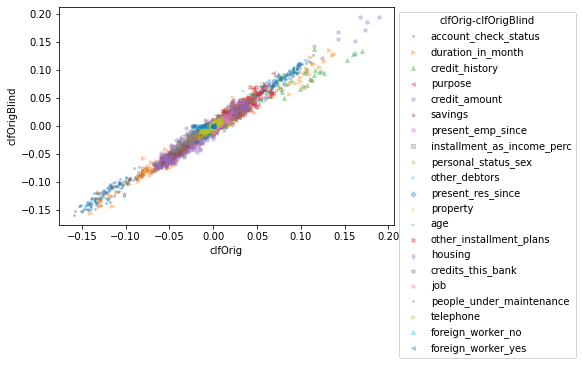

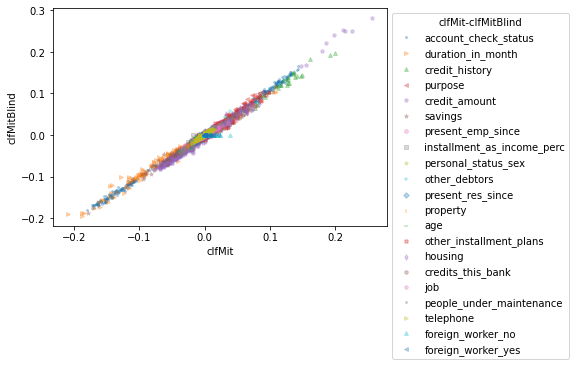

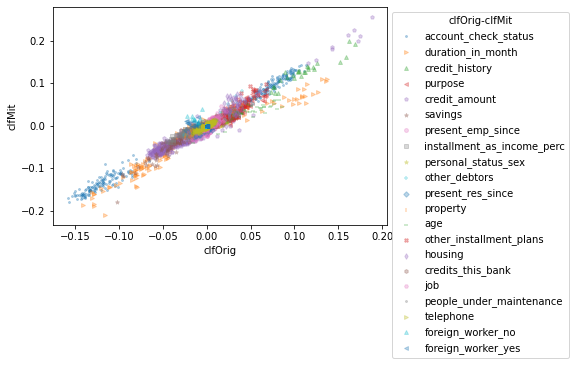

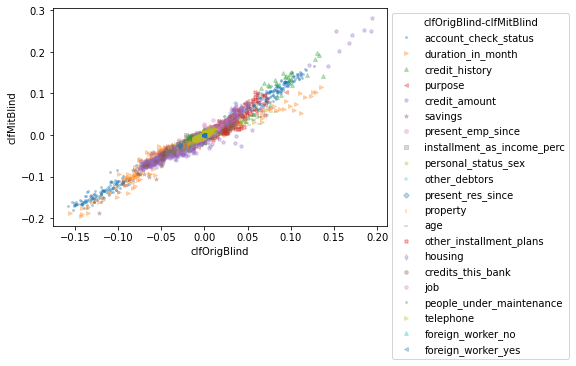

In [239]:
XAIPlots(shap_v,column_names,diffClfs=True)

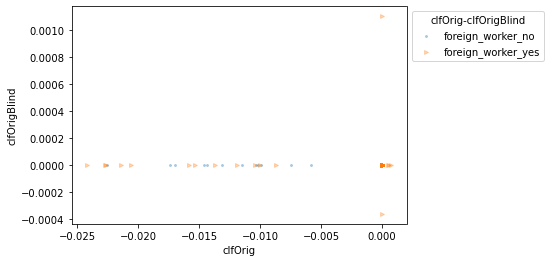

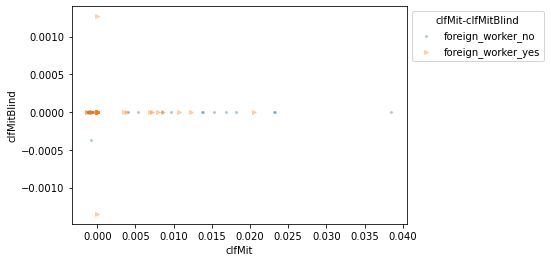

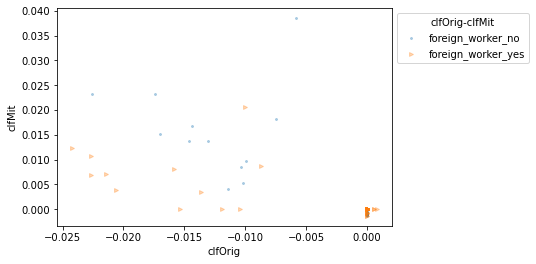

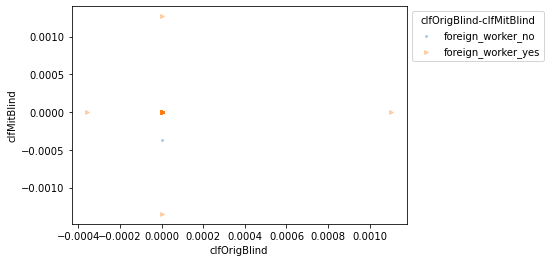

In [240]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [241]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [242]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [76]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [77]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -1.576647           -3.440995   
duration_in_month                      -0.395835           -3.009546   
credit_history                         -0.727381           -0.496582   
purpose                                 0.645952            0.902406   
credit_amount                          -1.091257           -1.582739   
savings                                 0.189673           -0.143080   
present_emp_since                       0.459167            0.928993   
installment_as_income_perc             -1.020564           -0.969653   
personal_status_sex                     0.293219            0.356374   
other_debtors                          -0.014518           -0.088954   
present_res_since                      -0.120070           -0.179377   
property                                0.181374            0.217810   
age                                     1.229332            1.549534   
other_installment_plans                 1.324755            1.704131   
housing                                 0.013302           -0.447742   
credits_this_bank                       0.047582           -0.227422   
job                                     0.467958            0.686032   
people_under_maintenance                0.208416           -0.052732   
telephone                               0.439100            0.539793   
foreign_worker_no                       0.033211           -0.004253   
foreign_worker_yes                      0.021420           -0.016506   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -2.420606                 -2.597035  
duration_in_month                -1.797674                 -1.607707  
credit_history                   -0.602394                 -0.621569  
purpose                           0.859416                  0.688942  
credit_amount                    -1.261190                 -1.412806  
savings                           0.060667                 -0.014074  
present_emp_since                 0.750585                  0.637576  
installment_as_income_perc       -0.993926                 -0.996291  
personal_status_sex               0.320558                  0.329035  
other_debtors                    -0.115390                  0.011918  
present_res_since                -0.241091                 -0.058356  
property                          0.197631                  0.201553  
age                               1.390413                  1.388454  
other_installment_plans           1.322462                  1.706424  
housing                          -0.145308                 -0.289132  
credits_this_bank                -0.224305                  0.044466  
job                               0.642669                  0.511321  
people_under_maintenance          0.104919                  0.050765  
telephone                         0.421930                  0.556963  
foreign_worker_no                 0.028958                  0.000000  
foreign_worker_yes                0.004914                  0.000000

In [78]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.004810            0.005822   
duration_in_month                       0.007488            0.004107   
credit_history                          0.004313            0.001978   
purpose                                 0.004109            0.002947   
credit_amount                           0.005379            0.003735   
savings                                 0.002945            0.001826   
present_emp_since                       0.003033            0.001598   
installment_as_income_perc              0.002590            0.001768   
personal_status_sex                     0.003514            0.001181   
other_debtors                           0.001025            0.000958   
present_res_since                       0.002957            0.001238   
property                                0.002921            0.001739   
age                                     0.004722            0.003056   
other_installment_plans                 0.002244            0.001587   
housing                                 0.002431            0.001858   
credits_this_bank                       0.002620            0.000838   
job                                     0.002214            0.001532   
people_under_maintenance                0.001333            0.000642   
telephone                               0.001822            0.001209   
foreign_worker_no                       0.001241            0.000986   
foreign_worker_yes                      0.001472            0.000629   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.016755                  0.020250  
duration_in_month                 0.013992                  0.011538  
credit_history                    0.004536                  0.008220  
purpose                           0.004344                  0.004993  
credit_amount                     0.006975                  0.007567  
savings                           0.005878                  0.005079  
present_emp_since                 0.005155                  0.003785  
installment_as_income_perc        0.003078                  0.003000  
personal_status_sex               0.003998                  0.002470  
other_debtors                     0.001825                  0.001802  
present_res_since                 0.002764                  0.002583  
property                          0.003178                  0.003119  
age                               0.007272                  0.007186  
other_installment_plans           0.003894                  0.003736  
housing                           0.006154                  0.005125  
credits_this_bank                 0.002043                  0.001490  
job                               0.003123                  0.002553  
people_under_maintenance          0.001311                  0.001684  
telephone                         0.001747                  0.001814  
foreign_worker_no                 0.002203                  0.000000  
foreign_worker_yes                0.002056                  0.000000

In [79]:
EValues = computeE(shap_v)
EValues 

{'clfOrig': 0.13202864671343106,
 'clfMit': 0.15293402267683917,
 'clfOrigBlind': 0.13418297876933474,
 'clfMitBlind': 0.158640493621358}

In [27]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change_Tree.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.027               0.010           0.017   
SA-Mean                  0.001               0.001           0.002   
NSA-Sum                  0.550               0.922           0.730   
NSA-Mean                 0.003               0.002           0.005   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      0.722  
NSA-Mean                     0.005

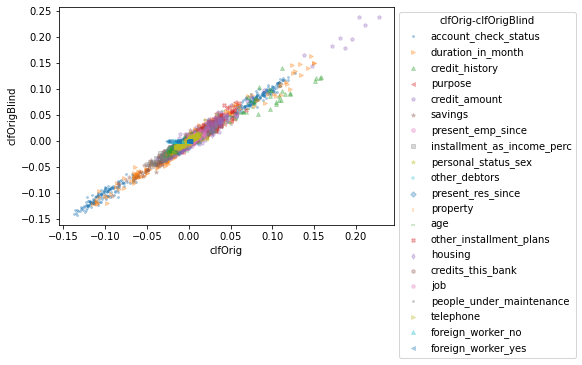

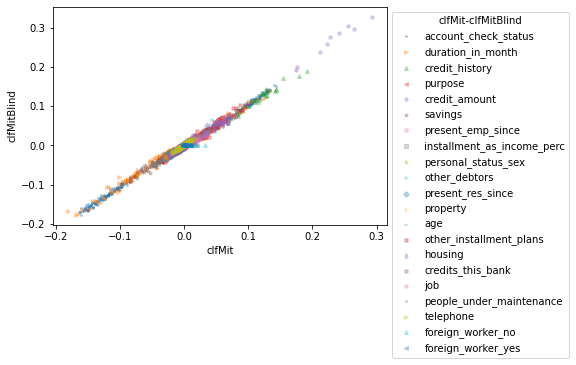

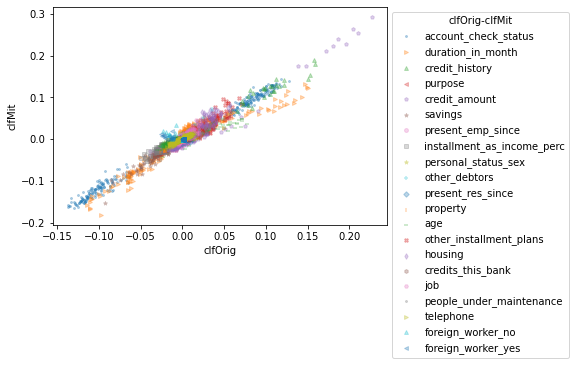

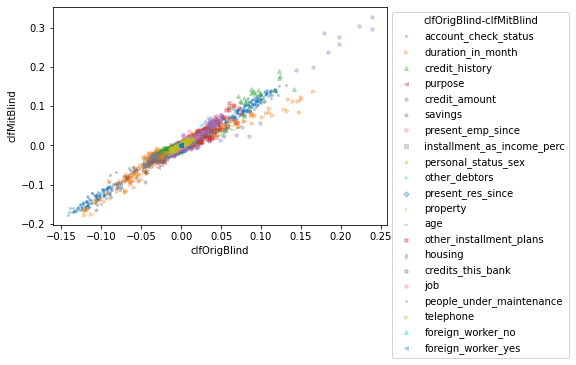

In [247]:
XAIPlots(shap_v,column_names,diffClfs=True)

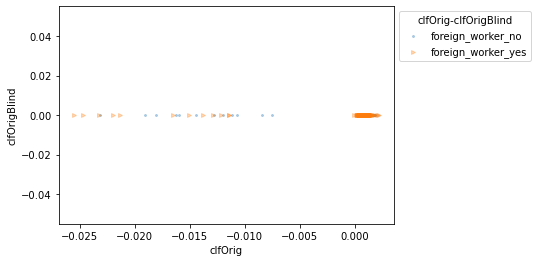

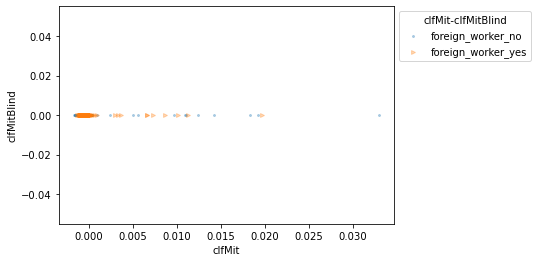

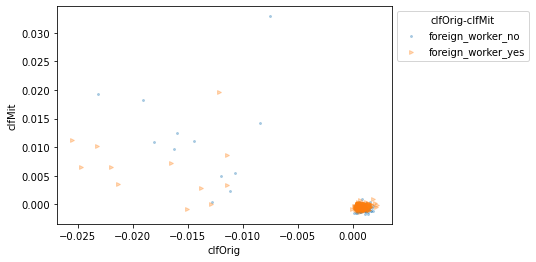

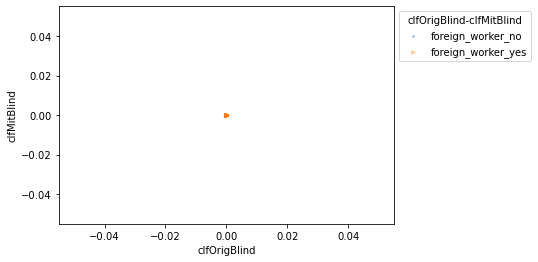

In [248]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [249]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [250]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [80]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [81]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -2.367327           -5.664160   
duration_in_month                     -13.654580          -12.151314   
credit_history                          5.655101            7.073551   
purpose                                 5.037958            4.858827   
credit_amount                         -25.090334          -26.420616   
savings                                 2.114076            1.627951   
present_emp_since                      -0.305322           -0.520720   
installment_as_income_perc             -0.369367           -0.509740   
personal_status_sex                    -0.351501           -0.774627   
other_debtors                           0.880425            1.275195   
present_res_since                      -0.170084           -0.342632   
property                                2.067984            2.024413   
age                                     4.598032            3.072665   
other_installment_plans                -3.127004           -5.149491   
housing                                -2.339678           -4.472342   
credits_this_bank                      -0.057093           -0.040186   
job                                    -0.681739           -0.877005   
people_under_maintenance               -0.014798           -0.480343   
telephone                               0.348591            0.749160   
foreign_worker_no                       0.388654           -0.586462   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -1.789003                 -6.242483  
duration_in_month               -12.708868                -13.097027  
credit_history                    5.954992                  6.773660  
purpose                           4.911086                  4.985699  
credit_amount                   -24.837971                -26.672978  
savings                           1.656201                  2.085825  
present_emp_since                -0.298297                 -0.527745  
installment_as_income_perc       -0.471999                 -0.407109  
personal_status_sex              -0.620978                 -0.505151  
other_debtors                     0.981161                  1.174459  
present_res_since                -0.413780                 -0.098937  
property                          2.274824                  1.817573  
age                               3.833140                  3.837557  
other_installment_plans          -4.661957                 -3.614539  
housing                          -3.601250                 -3.210769  
credits_this_bank                -0.030117                 -0.067162  
job                              -0.841142                 -0.717601  
people_under_maintenance         -0.324972                 -0.170170  
telephone                         0.049032                  1.048720  
foreign_worker_no                -0.370547                  0.172738  
foreign_worker_yes                0.000000                  0.000000

In [82]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.012416            0.008448   
duration_in_month                       0.006696            0.005492   
credit_history                          0.004478            0.005824   
purpose                                 0.005503            0.006679   
credit_amount                           0.015617            0.009349   
savings                                 0.005304            0.005379   
present_emp_since                       0.004791            0.005784   
installment_as_income_perc              0.004731            0.005741   
personal_status_sex                     0.007729            0.005310   
other_debtors                           0.004386            0.005316   
present_res_since                       0.005361            0.005674   
property                                0.004535            0.006771   
age                                     0.006921            0.007174   
other_installment_plans                 0.005676            0.004952   
housing                                 0.004379            0.005193   
credits_this_bank                       0.004876            0.005412   
job                                     0.004640            0.005415   
people_under_maintenance                0.003831            0.004852   
telephone                               0.004510            0.006300   
foreign_worker_no                       0.004089            0.005691   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.027317                  0.034943  
duration_in_month                 0.010943                  0.009413  
credit_history                    0.005963                  0.005750  
purpose                           0.005843                  0.006650  
credit_amount                     0.011687                  0.012244  
savings                           0.008077                  0.006702  
present_emp_since                 0.005416                  0.005250  
installment_as_income_perc        0.005906                  0.006565  
personal_status_sex               0.005278                  0.006130  
other_debtors                     0.004748                  0.005193  
present_res_since                 0.005770                  0.005306  
property                          0.005640                  0.005744  
age                               0.005136                  0.010791  
other_installment_plans           0.005143                  0.007269  
housing                           0.009538                  0.006322  
credits_this_bank                 0.005195                  0.005124  
job                               0.005459                  0.005698  
people_under_maintenance          0.004168                  0.004453  
telephone                         0.006855                  0.005954  
foreign_worker_no                 0.005834                  0.004641  
foreign_worker_yes                0.000000                  0.000000

In [83]:
EValues = computeE(lime_v)
EValues 

{'clfOrig': 0.15793119524241322,
 'clfMit': 0.18253508626876377,
 'clfOrigBlind': 0.1608681273791787,
 'clfMitBlind': 0.1921707992969343}

In [28]:
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Change.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.194               0.293           0.185   
SA-Mean                  0.002               0.003           0.003   
NSA-Sum                  3.644               4.110           3.698   
NSA-Mean                 0.006               0.006           0.008   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.086  
SA-Mean                      0.002  
NSA-Sum                      4.056  
NSA-Mean                     0.008

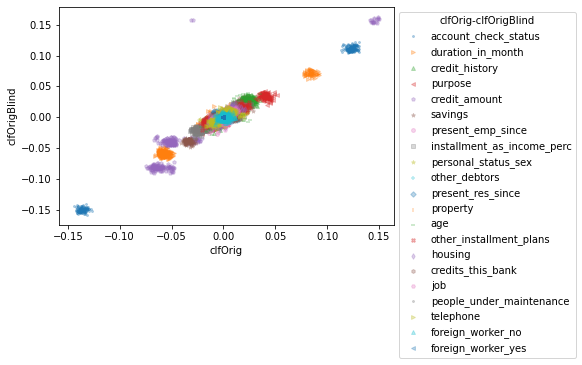

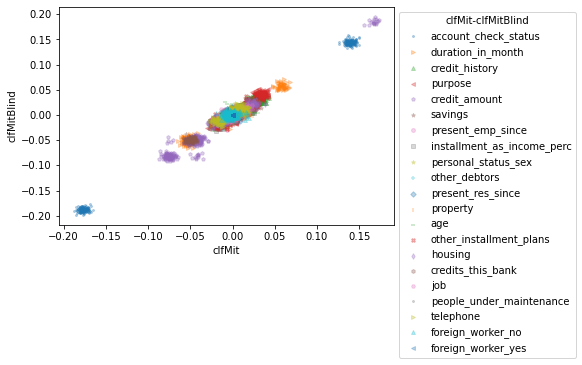

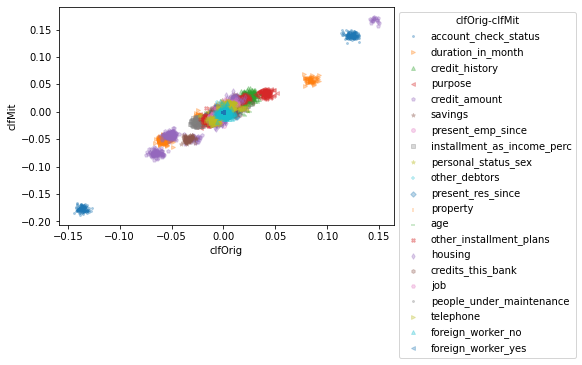

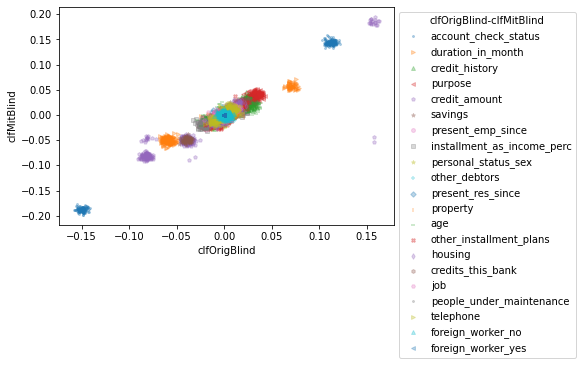

In [255]:
XAIPlots(lime_v,column_names,diffClfs=True)

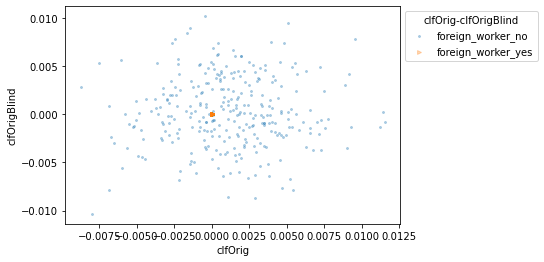

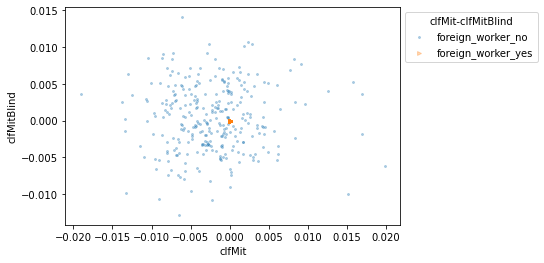

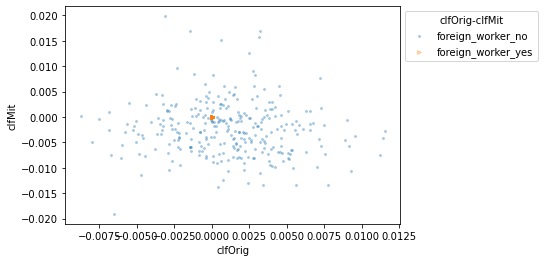

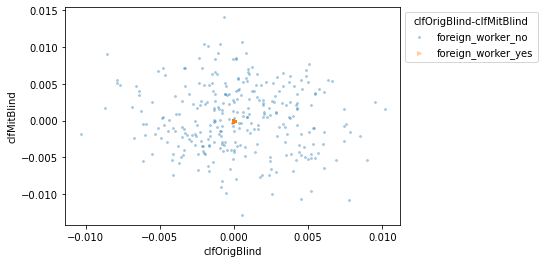

In [256]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [46]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [47]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [48]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -7.369476      -3.453945   
duration_in_month                -10.178275     -14.206840   
credit_history                     4.112905       5.320540   
purpose                            6.112068       5.643568   
credit_amount                    -18.540484     -19.816422   
savings                           -3.173149      -3.637128   
present_emp_since                 -1.331626      -3.115221   
installment_as_income_perc         0.765532       1.316733   
personal_status_sex                0.609097       0.335708   
other_debtors                      0.491878       0.846892   
present_res_since                 -1.083515      -1.340828   
property                           1.289413       1.419104   
age                                6.247189       4.039451   
other_installment_plans            2.234895       2.751102   
housing                            2.300077       3.544607   
credits_this_bank                 -0.111367      -0.157072   
job                                0.802933       0.504341   
people_under_maintenance           1.056510       1.411311   
telephone                         -0.089986      -0.107074   
foreign_worker_no                 -0.300162       0.346397   
foreign_worker_yes                -0.380198       0.141438   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -7.378977                -5.972218  
duration_in_month                          -12.157222               -14.410099  
credit_history                               4.230368                 5.577659  
purpose                                      5.579612                 6.409999  
credit_amount                              -20.578578               -23.486452  
savings                                     -2.895647                -3.645574  
present_emp_since                           -1.849764                -2.824132  
installment_as_income_perc                   1.675731                 0.689521  
personal_status_sex                          0.446016                 0.443741  
other_debtors                                0.737416                 0.771319  
present_res_since                           -0.823644                -0.937502  
property                                     1.477246                 1.067938  
age                                          5.312188                 3.839072  
other_installment_plans                      3.153222                 2.235103  
housing                                      2.634617                 3.378217  
credits_this_bank                           -0.059565                -0.159693  
job                                          0.743078                 0.549240  
people_under_maintenance                     1.117422                 1.572846  
telephone                                   -0.098522                -0.048673  
foreign_worker_no                            0.000000                -0.002309  
foreign_worker_yes                           0.000332                -0.000079

In [49]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.008618       0.013652   
duration_in_month                  0.000821       0.002710   
credit_history                     0.000485       0.000716   
purpose                            0.000908       0.000974   
credit_amount                      0.000634       0.002275   
savings                            0.000607       0.002204   
present_emp_since                  0.000353       0.001025   
installment_as_income_perc         0.000777       0.001275   
personal_status_sex                0.000331       0.000528   
other_debtors                      0.000206       0.000293   
present_res_since                  0.000414       0.000511   
property                           0.000405       0.000797   
age                                0.001024       0.000996   
other_installment_plans            0.000561       0.000591   
housing                            0.000692       0.001086   
credits_this_bank                  0.000564       0.000479   
job                                0.000481       0.000546   
people_under_maintenance           0.000159       0.000393   
telephone                          0.000397       0.000745   
foreign_worker_no                  0.000029       0.000103   
foreign_worker_yes                 0.000041       0.000055   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.000785                 0.002826  
duration_in_month                            0.000593                 0.001781  
credit_history                               0.000476                 0.001412  
purpose                                      0.000651                 0.000964  
credit_amount                                0.002384                 0.003334  
savings                                      0.000971                 0.000996  
present_emp_since                            0.000334                 0.000531  
installment_as_income_perc                   0.000525                 0.000987  
personal_status_sex                          0.000401                 0.000809  
other_debtors                                0.000147                 0.000491  
present_res_since                            0.000564                 0.000456  
property                                     0.000398                 0.001500  
age                                          0.001148                 0.000661  
other_installment_plans                      0.000362                 0.000621  
housing                                      0.000468                 0.000694  
credits_this_bank                            0.000270                 0.000456  
job                                          0.000371                 0.000934  
people_under_maintenance                     0.000066                 0.000125  
telephone                                    0.000343                 0.001010  
foreign_worker_no                            0.000000                 0.000008  
foreign_worker_yes                           0.000006                 0.000009

In [50]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.340          0.244                      0.000   
SA-Mean             0.000          0.000                      0.000   
NSA-Sum             3.574          3.840                      3.839   
NSA-Mean            0.001          0.002                      0.001   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.001  
SA-Mean                     0.000  
NSA-Sum                     4.106  
NSA-Mean                    0.001

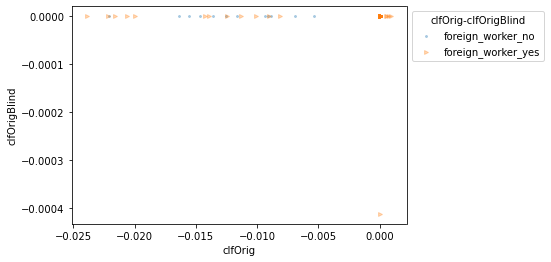

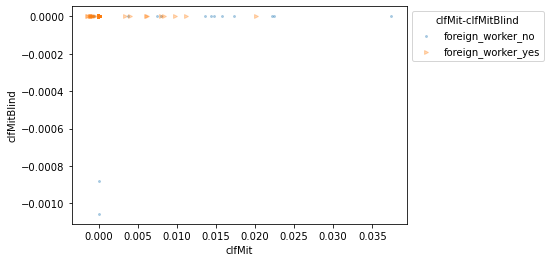

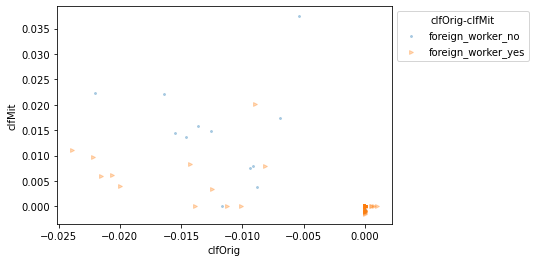

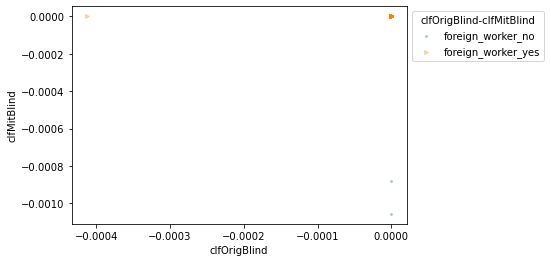

In [51]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [52]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [53]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [54]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -1.666165      -3.175048   
duration_in_month                 -0.531765      -3.063583   
credit_history                    -0.877138      -0.327650   
purpose                            0.823579       0.895252   
credit_amount                     -1.035341      -1.487039   
savings                            0.174839      -0.053504   
present_emp_since                  0.551727       0.949444   
installment_as_income_perc        -1.099763      -0.888090   
personal_status_sex                0.351822       0.289295   
other_debtors                     -0.132385      -0.098396   
present_res_since                 -0.300029      -0.182153   
property                           0.146645       0.248617   
age                                1.136738       1.644087   
other_installment_plans            1.072704       1.572220   
housing                            0.137224      -0.427839   
credits_this_bank                 -0.145634      -0.302976   
job                                0.499504       0.785835   
people_under_maintenance           0.287915      -0.078076   
telephone                          0.357975       0.485886   
foreign_worker_no                  0.066423      -0.008506   
foreign_worker_yes                 0.042840      -0.033013   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -1.487129                -3.706941  
duration_in_month                           -0.259905                -2.955509  
credit_history                              -0.577624                -0.665514  
purpose                                      0.468325                 0.909560  
credit_amount                               -1.147173                -1.678439  
savings                                      0.204508                -0.232657  
present_emp_since                            0.366608                 0.908543  
installment_as_income_perc                  -0.941365                -1.051216  
personal_status_sex                          0.234617                 0.423454  
other_debtors                                0.103350                -0.079513  
present_res_since                            0.059889                -0.176601  
property                                     0.216102                 0.187004  
age                                          1.321926                 1.454982  
other_installment_plans                      1.576806                 1.836042  
housing                                     -0.110621                -0.467644  
credits_this_bank                            0.240799                -0.151868  
job                                          0.436412                 0.586229  
people_under_maintenance                     0.128917                -0.027387  
telephone                                    0.520225                 0.593700  
foreign_worker_no                            0.000000                 0.000000  
foreign_worker_yes                           0.000000                 0.000000

In [55]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status                    0.0            0.0   
duration_in_month                       0.0            0.0   
credit_history                          0.0            0.0   
purpose                                 0.0            0.0   
credit_amount                           0.0            0.0   
savings                                 0.0            0.0   
present_emp_since                       0.0            0.0   
installment_as_income_perc              0.0            0.0   
personal_status_sex                     0.0            0.0   
other_debtors                           0.0            0.0   
present_res_since                       0.0            0.0   
property                                0.0            0.0   
age                                     0.0            0.0   
other_installment_plans                 0.0            0.0   
housing                                 0.0            0.0   
credits_this_bank                       0.0            0.0   
job                                     0.0            0.0   
people_under_maintenance                0.0            0.0   
telephone                               0.0            0.0   
foreign_worker_no                       0.0            0.0   
foreign_worker_yes                      0.0            0.0   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                              0.0                      0.0  
duration_in_month                                 0.0                      0.0  
credit_history                                    0.0                      0.0  
purpose                                           0.0                      0.0  
credit_amount                                     0.0                      0.0  
savings                                           0.0                      0.0  
present_emp_since                                 0.0                      0.0  
installment_as_income_perc                        0.0                      0.0  
personal_status_sex                               0.0                      0.0  
other_debtors                                     0.0                      0.0  
present_res_since                                 0.0                      0.0  
property                                          0.0                      0.0  
age                                               0.0                      0.0  
other_installment_plans                           0.0                      0.0  
housing                                           0.0                      0.0  
credits_this_bank                                 0.0                      0.0  
job                                               0.0                      0.0  
people_under_maintenance                          0.0                      0.0  
telephone                                         0.0                      0.0  
foreign_worker_no                                 0.0                      0.0  
foreign_worker_yes                                0.0                      0.0

In [56]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.055          0.021                      0.000   
SA-Mean             0.000          0.000                      0.000   
NSA-Sum             0.596          0.892                      0.547   
NSA-Mean            0.000          0.000                      0.000   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.000  
SA-Mean                     0.000  
NSA-Sum                     0.952  
NSA-Mean                    0.000

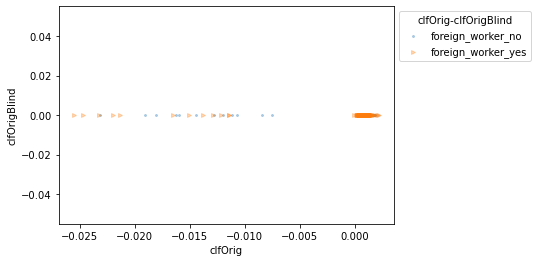

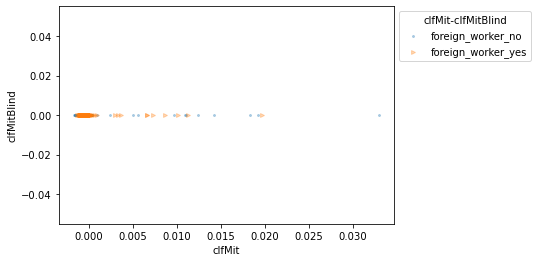

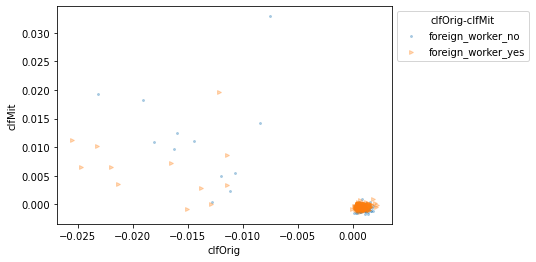

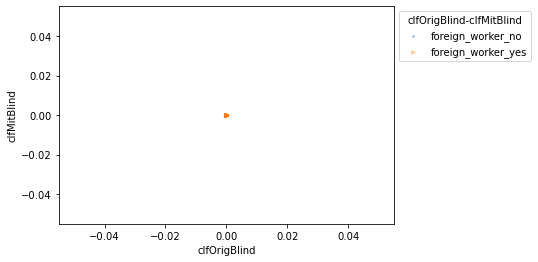

In [57]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [58]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [59]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [60]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               1.346083      -1.932734   
duration_in_month                -13.104063     -12.196491   
credit_history                     5.401839       6.650507   
purpose                            5.299326       5.027438   
credit_amount                    -24.894444     -24.989598   
savings                            1.917063       1.614315   
present_emp_since                 -0.231658      -0.446021   
installment_as_income_perc        -0.606720       0.051363   
personal_status_sex               -0.709760      -0.507169   
other_debtors                      0.615081       1.339928   
present_res_since                 -0.111459      -0.780426   
property                           2.063095       2.551653   
age                                4.081820       3.526633   
other_installment_plans           -4.224471      -5.585419   
housing                           -2.194542      -4.341419   
credits_this_bank                 -0.104884       0.005063   
job                               -0.673415      -1.355702   
people_under_maintenance          -0.075751      -0.535802   
telephone                          0.050457       0.629139   
foreign_worker_no                  0.636334      -1.643319   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -6.080493                 1.035261  
duration_in_month                          -14.204761               -10.547949  
credit_history                               5.908819                 7.323390  
purpose                                      4.775974                 5.725134  
credit_amount                              -25.286682               -29.030034  
savings                                      2.310665                 1.828831  
present_emp_since                           -0.378257                -0.649729  
installment_as_income_perc                  -0.131983                -0.531326  
personal_status_sex                          0.005670                -0.812679  
other_debtors                                1.146041                 0.954248  
present_res_since                           -0.228970                 0.008570  
property                                     2.072834                 1.814951  
age                                          5.114561                 2.839359  
other_installment_plans                     -2.029588                -5.656576  
housing                                     -2.484596                -3.867787  
credits_this_bank                           -0.009433                 0.010012  
job                                         -0.690298                -1.091312  
people_under_maintenance                     0.046090                -0.367848  
telephone                                    0.646936                 1.315391  
foreign_worker_no                            0.143999                 0.075966  
foreign_worker_yes                           0.000000                 0.000000

In [61]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status                    0.0       0.010084   
duration_in_month                       0.0       0.005161   
credit_history                          0.0       0.005070   
purpose                                 0.0       0.005222   
credit_amount                           0.0       0.005015   
savings                                 0.0       0.004833   
present_emp_since                       0.0       0.005298   
installment_as_income_perc              0.0       0.004794   
personal_status_sex                     0.0       0.004476   
other_debtors                           0.0       0.004483   
present_res_since                       0.0       0.004647   
property                                0.0       0.004541   
age                                     0.0       0.005690   
other_installment_plans                 0.0       0.005012   
housing                                 0.0       0.005647   
credits_this_bank                       0.0       0.004830   
job                                     0.0       0.004949   
people_under_maintenance                0.0       0.004297   
telephone                               0.0       0.005793   
foreign_worker_no                       0.0       0.004935   
foreign_worker_yes                      0.0       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.000018                 0.024798  
duration_in_month                            0.000022                 0.010707  
credit_history                               0.000021                 0.005496  
purpose                                      0.000021                 0.006378  
credit_amount                                0.000021                 0.006974  
savings                                      0.000021                 0.005211  
present_emp_since                            0.000021                 0.006214  
installment_as_income_perc                   0.000020                 0.005986  
personal_status_sex                          0.000022                 0.005622  
other_debtors                                0.000020                 0.005762  
present_res_since                            0.000021                 0.005641  
property                                     0.000019                 0.005688  
age                                          0.000021                 0.005850  
other_installment_plans                      0.000020                 0.005524  
housing                                      0.000019                 0.004963  
credits_this_bank                            0.000022                 0.005459  
job                                          0.000020                 0.005586  
people_under_maintenance                     0.000019                 0.005291  
telephone                                    0.000022                 0.005671  
foreign_worker_no                            0.000611                 0.004812  
foreign_worker_yes                           0.000000                 0.000000

In [62]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.318          0.822                      0.072   
SA-Mean             0.000          0.002                      0.000   
NSA-Sum             3.563          3.898                      3.871   
NSA-Mean            0.000          0.005                      0.000   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.038  
SA-Mean                     0.002  
NSA-Sum                     3.969  
NSA-Mean                    0.007

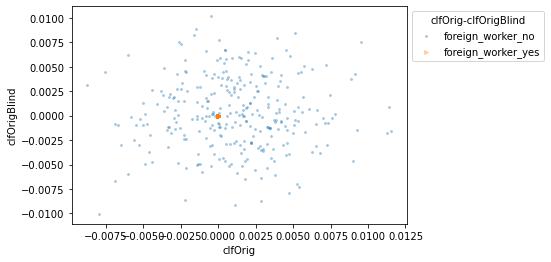

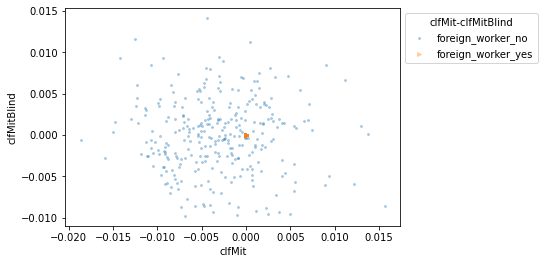

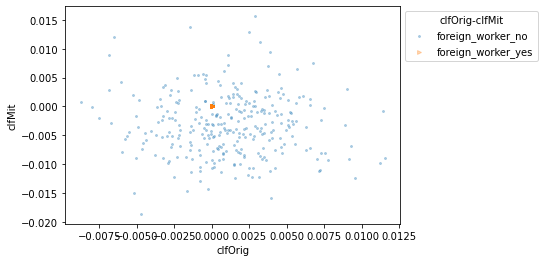

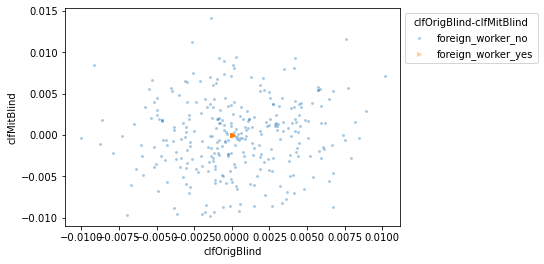

In [63]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)